In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

# SHAP for Categorical Features
### Adding up SHAP values of categorical features that have been transformed with one-hot encodings
- https://towardsdatascience.com/shap-for-categorical-features-7c63e6a554ea

In [13]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml(name='mushroom', return_X_y=True)
X
y

cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
0            x           s         n          t    p               f   
1            x           s         y          t    a               f   
2            b           s         w          t    l               f   
3            x           y         w          t    p               f   
4            x           s         g          f    n               f   
...        ...         ...       ...        ...  ...             ...   
8119         k           s         n          f    n               a   
8120         x           s         n          f    n               a   
8121         f           s         n          f    n               a   
8122         k           y         n          f    y               f   
8123         x           s         n          f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0               c         n          k           e  ...   
1               c         b          k           e  ...   
2               c         b          n           e  ...   
3               c         n          n           e  ...   
4               w         b          k           t  ...   
...           ...       ...        ...         ...  ...   
8119            c         b          y           e  ...   
8120            c         b          y           e  ...   
8121            c         b          n           e  ...   
8122            c         n          b           t  ...   
8123            c         b          y           e  ...   

     stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                           s                      w                      w   
1                           s                      w                      w   
2                           s                      w                      w   
3                           s                      w                      w   
4                           s                      w                      w   
...                       ...                    ...                    ...   
8119                        s                      o                      o   
8120                        s                      o                      o   
8121                        s                      o                      o   
8122                        k                      w                      w   
8123                        s                      o                      o   

     veil-type veil-color ring-number ring-type spore-print-color population  \
0            p          w           o         p                 k          s   
1            p          w           o         p                 n          n   
2            p          w           o         p                 n          n   
3            p          w           o         p                 k          s   
4            p          w           o         e                 n          a   
...        ...        ...         ...       ...               ...        ...   
8119         p          o           o         p                 b          c   
8120         p          n           o         p                 b          v   
8121         p          o           o         p                 b          c   
8122         p          w           o         e                 w          v   
8123         p          o           o         p                 o          c   

     habitat  
0          u  
1          g  
2          m  
3          u  
4          g  
...      ...  
8119       l  
8120       l  
8121       l  
8122       l  
8123       l  

[8124 rows x 22 columns]

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: category
Categories (2, object): ['e', 'p']

In [15]:
y = y.cat.codes

In [16]:
X_cat = X.copy()
X_cat

cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
0            x           s         n          t    p               f   
1            x           s         y          t    a               f   
2            b           s         w          t    l               f   
3            x           y         w          t    p               f   
4            x           s         g          f    n               f   
...        ...         ...       ...        ...  ...             ...   
8119         k           s         n          f    n               a   
8120         x           s         n          f    n               a   
8121         f           s         n          f    n               a   
8122         k           y         n          f    y               f   
8123         x           s         n          f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0               c         n          k           e  ...   
1               c         b          k           e  ...   
2               c         b          n           e  ...   
3               c         n          n           e  ...   
4               w         b          k           t  ...   
...           ...       ...        ...         ...  ...   
8119            c         b          y           e  ...   
8120            c         b          y           e  ...   
8121            c         b          n           e  ...   
8122            c         n          b           t  ...   
8123            c         b          y           e  ...   

     stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                           s                      w                      w   
1                           s                      w                      w   
2                           s                      w                      w   
3                           s                      w                      w   
4                           s                      w                      w   
...                       ...                    ...                    ...   
8119                        s                      o                      o   
8120                        s                      o                      o   
8121                        s                      o                      o   
8122                        k                      w                      w   
8123                        s                      o                      o   

     veil-type veil-color ring-number ring-type spore-print-color population  \
0            p          w           o         p                 k          s   
1            p          w           o         p                 n          n   
2            p          w           o         p                 n          n   
3            p          w           o         p                 k          s   
4            p          w           o         e                 n          a   
...        ...        ...         ...       ...               ...        ...   
8119         p          o           o         p                 b          c   
8120         p          n           o         p                 b          v   
8121         p          o           o         p                 b          c   
8122         p          w           o         e                 w          v   
8123         p          o           o         p                 o          c   

     habitat  
0          u  
1          g  
2          m  
3          u  
4          g  
...      ...  
8119       l  
8120       l  
8121       l  
8122       l  
8123       l  

[8124 rows x 22 columns]

In [98]:
from sklearn.preprocessing import OneHotEncoder
#fit encoder
enc = OneHotEncoder()
enc.fit(X_cat)

#transform categorical features
X_encoded = enc.transform(X_cat).toarray()

#create feature matrix
feature_names = X_cat.columns
new_feature_names = enc.get_feature_names(feature_names)

X = pd.DataFrame(X_encoded, columns= new_feature_names)

OneHotEncoder()

In [99]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix
#Train model
model = xgb.XGBClassifier(objective="binary:logistic", 
                         max_depth=2, 
                        n_estimators=10)
model.fit(X, y)

#Get predictions
y_pred = model.predict(X)

print(confusion_matrix(y, y_pred))
accuracy_score(y, y_pred)

[17:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[[4112   96]
 [  88 3828]]


0.9773510585918267

- You can see that each binary feature has its own SHAP value. Take odor for example. 
- It appears 4 times in the waterfall plot.(nunique는 9개)
- The fact that odor_n = 0 increases the probability that the mushroom is poisonous. 
- At the same time, odor_a = 1, odor_f = 0 and odor_I = 0 all decrease the probability. It is not clear what the overall contribution of the mushroom’s odor is. 

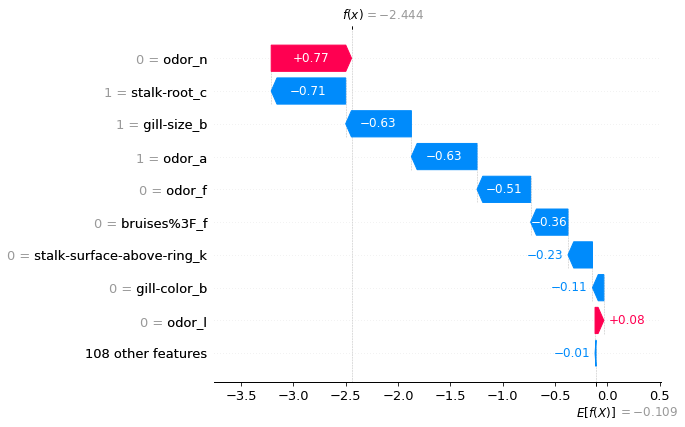

In [100]:
import shap
shap.initjs()
# get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# waterfall plot
shap.plots.waterfall(shap_values[1], show=False)

#plt.savefig(path.format('standard_shap.png'),dpi=100,bbox_inches='tight')

In [101]:
X_cat
X_cat['odor'].nunique()
X_cat['odor'].unique()

cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
0            x           s         n          t    p               f   
1            x           s         y          t    a               f   
2            b           s         w          t    l               f   
3            x           y         w          t    p               f   
4            x           s         g          f    n               f   
...        ...         ...       ...        ...  ...             ...   
8119         k           s         n          f    n               a   
8120         x           s         n          f    n               a   
8121         f           s         n          f    n               a   
8122         k           y         n          f    y               f   
8123         x           s         n          f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0               c         n          k           e  ...   
1               c         b          k           e  ...   
2               c         b          n           e  ...   
3               c         n          n           e  ...   
4               w         b          k           t  ...   
...           ...       ...        ...         ...  ...   
8119            c         b          y           e  ...   
8120            c         b          y           e  ...   
8121            c         b          n           e  ...   
8122            c         n          b           t  ...   
8123            c         b          y           e  ...   

     stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                           s                      w                      w   
1                           s                      w                      w   
2                           s                      w                      w   
3                           s                      w                      w   
4                           s                      w                      w   
...                       ...                    ...                    ...   
8119                        s                      o                      o   
8120                        s                      o                      o   
8121                        s                      o                      o   
8122                        k                      w                      w   
8123                        s                      o                      o   

     veil-type veil-color ring-number ring-type spore-print-color population  \
0            p          w           o         p                 k          s   
1            p          w           o         p                 n          n   
2            p          w           o         p                 n          n   
3            p          w           o         p                 k          s   
4            p          w           o         e                 n          a   
...        ...        ...         ...       ...               ...        ...   
8119         p          o           o         p                 b          c   
8120         p          n           o         p                 b          v   
8121         p          o           o         p                 b          c   
8122         p          w           o         e                 w          v   
8123         p          o           o         p                 o          c   

     habitat  
0          u  
1          g  
2          m  
3          u  
4          g  
...      ...  
8119       l  
8120       l  
8121       l  
8122       l  
8123       l  

[8124 rows x 22 columns]

9

['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']
Categories (9, object): ['a', 'c', 'f', 'l', ..., 'n', 'p', 's', 'y']

### SHAP for categorical features
- Let's start by exploring the shap_values object. We print the object in the code below. You can see in the output below that is made of 3 components. We have the SHAP values (values) for each of the predictions. data gives the values for the binary features. Each prediction will also have the same base value (base_values). This is the average predicted log odds.

.values =
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

.base_values =
array([-0.10899933, -0.10899933, -0.10899933, ..., -0.10899933,
       -0.10899933, -0.10899933], dtype=float32)

.data =
array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

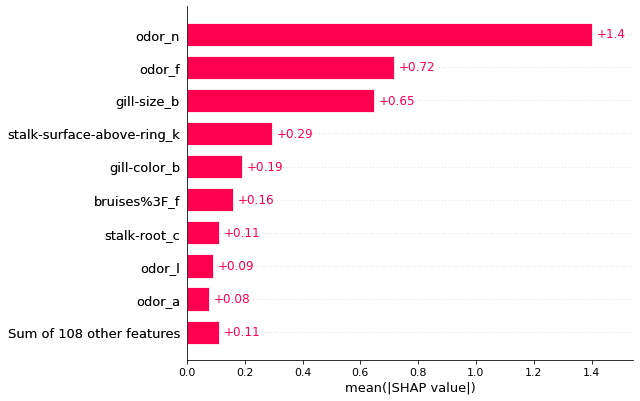

In [102]:
shap_values
#Mean SHAP
shap.plots.bar(shap_values)

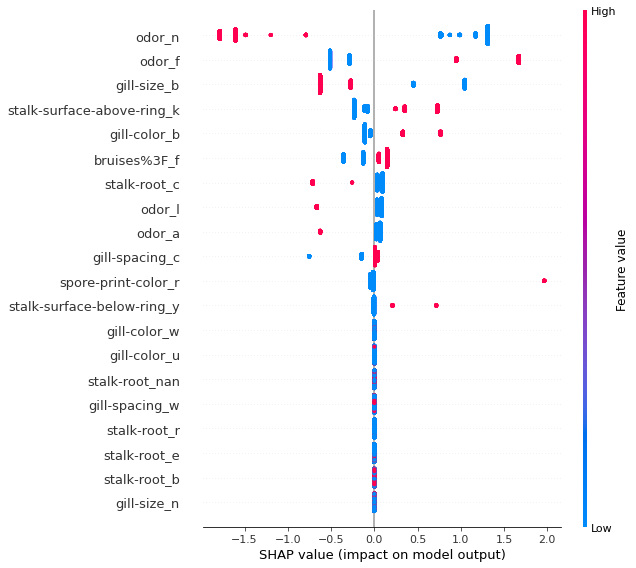

In [103]:
shap.summary_plot(shap_values, X)

In [36]:
shap_values.values[1]
shap_values.values[1].shape

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.35661033,  0.        , -0.6266489 ,  0.        , -0.51225036,
        0.08398499,  0.        ,  0.7672449 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00772181,  0.        ,
       -0.62764466,  0.        , -0.10836244,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.7112466 ,  0.        ,  0.        ,
        0.        ,  0.        , -0.2341366 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.00338919,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

(117,)

In [62]:
#get number of unique categories for each feature 
n_categories = []
for feat in feature_names:
    n = X_cat[feat].nunique()
    n_categories.append(n)
    
feature_names 
n_categories
len(n_categories)

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

[6, 4, 10, 2, 9, 2, 2, 2, 12, 2, 4, 4, 4, 9, 9, 1, 4, 3, 5, 9, 6, 7]

22

In [55]:
shap_values.values.shape
shap_values.values

(8124, 117)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [69]:
c = np.arange(100).reshape(2,50)
c
c.shape

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
        66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
        82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
        98, 99]])

(2, 50)

In [70]:
for values in c :
    values
    np.split(values, [2, 4, 10, 15])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

[array([0, 1]),
 array([2, 3]),
 array([4, 5, 6, 7, 8, 9]),
 array([10, 11, 12, 13, 14]),
 array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
        49])]

array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

[array([50, 51]),
 array([52, 53]),
 array([54, 55, 56, 57, 58, 59]),
 array([60, 61, 62, 63, 64]),
 array([65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
        82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,
        99])]

In [63]:
np.cumsum(n_categories)

array([  6,  10,  20,  22,  31,  33,  35,  37,  49,  51,  55,  59,  63,
        72,  81,  82,  86,  89,  94, 103, 109, 116])

In [73]:
new_shap_values = []

for values in shap_values.values:
    
    #split shap values into a list for each feature
    values_split = np.split(values , np.cumsum(n_categories)) # 각 변수의 범주형 구분에 따라 split

    #sum values within each list
    values_sum = [sum(l) for l in values_split]
    
    new_shap_values.append(values_sum)


len(new_shap_values)
sum(new_shap_values[1])
sum(shap_values.values[1])
new_shap_values[1]

8124

-2.334925272036344

-2.334925272036344

[0.0,
 0.0,
 0.0,
 -0.35661032795906067,
 -0.2876694053411484,
 0.0,
 0.007721807342022657,
 -0.6276446580886841,
 -0.10836244374513626,
 0.0,
 -0.7112466096878052,
 -0.23413659632205963,
 0.0,
 -0.003389185294508934,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.01358785293996334,
 0.0,
 0.0,
 0.0]

In [74]:
#replace shap values
shap_values.values = np.array(new_shap_values)

#replace data with categorical feature values 
new_data = np.array(X_cat)
shap_values.data = np.array(new_data)

#update feature names
shap_values.feature_names = list(X_cat.columns)

In [78]:
shap_values.feature_names 

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises%3F',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

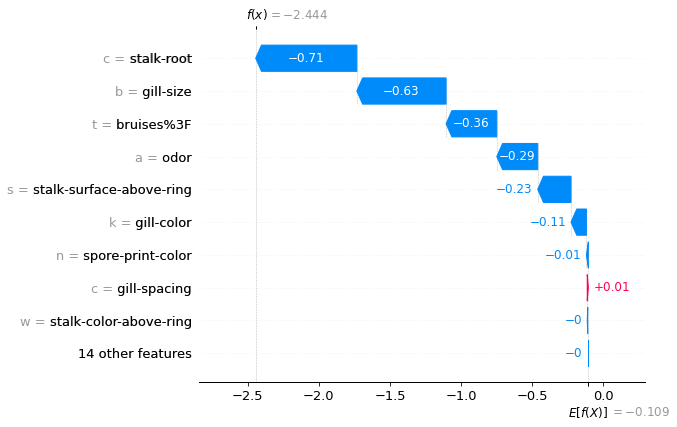

In [76]:
# waterfall plot
shap.plots.waterfall(shap_values[1], show=False)

#plt.savefig(path.format('category_shap.png'),dpi=100,bbox_inches='tight')

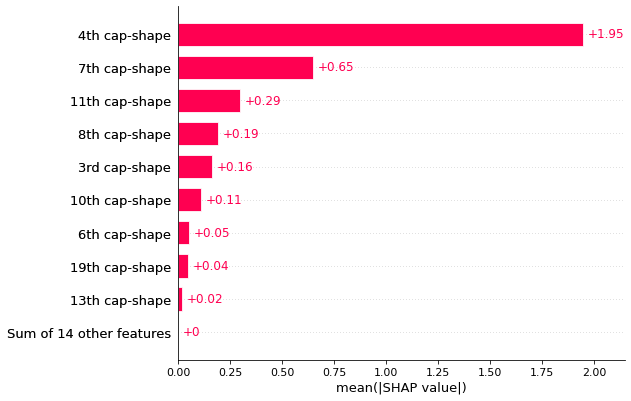

In [81]:
#Mean SHAP
shap.plots.bar(shap_values, show=False)

#plt.savefig(path.format('mean_shap.png'),dpi=100,bbox_inches='tight')

In [96]:
shap_values

.values =
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

.base_values =
array([-0.10899933, -0.10899933, -0.10899933, ..., -0.10899933,
       -0.10899933, -0.10899933], dtype=float32)

.data =
array([['x', 's', 'n', ..., 'k', 's', 'u'],
       ['x', 's', 'y', ..., 'n', 'n', 'g'],
       ['b', 's', 'w', ..., 'n', 'n', 'm'],
       ...,
       ['f', 's', 'n', ..., 'b', 'c', 'l'],
       ['k', 'y', 'n', ..., 'w', 'v', 'l'],
       ['x', 's', 'n', ..., 'o', 'c', 'l']], dtype=object)

In [95]:
#shap.plots(shap_values ,show=False)
shap.summary_plot(shap_values)
#plt.savefig(path.format('beeswarm.png'),dpi=100,bbox_inches='tight')

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix. Perhaps the extra column in the shap_values matrix is the constant offset? Of so just pass shap_values[:,:-1].

In [91]:
unique_odor = X_cat['odor'].unique().tolist()
X_cat['odor'].unique().tolist()

['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']

<Figure size 576x360 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x1daad147250>,
 'caps': [<matplotlib.lines.Line2D at 0x1daad13dc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1daad147af0>,
 'medians': [<matplotlib.lines.Line2D at 0x1daad13d5e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1daad13d820>,
 'means': []}

Text(0, 0.5, 'Shap values')

Text(0.5, 0, 'Odor')

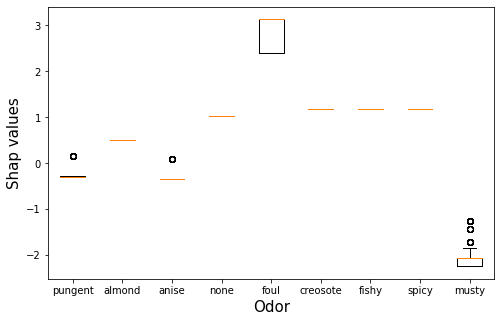

In [92]:
#get shaply values and data
odor_values = shap_values[:,"odor"].values
odor_data = shap_values[:,"odor"].data


#split odor shap values based on odor category
odor_categories = list(set(odor_data))

odor_groups = []
for o in odor_categories:
    relevant_values = odor_values[odor_data == o]
    odor_groups.append(relevant_values)
    
#replace categories with labels
odor_labels = {'a':'almond',
               'l':'anise', 
               'c':'creosote', 
               'y':'fishy', 
               'f':'foul', 
               'm':'musty', 
               'n':'none', 
               'p':'pungent', 
               's':'spicy'}

labels = [odor_labels[u] for u in unique_odor]

#plot boxplot
plt.figure(figsize=(8, 5))

plt.boxplot(odor_groups,labels=labels)

plt.ylabel('Shap values',size=15)
plt.xlabel('Odor',size=15)

#plt.savefig(path.format('boxplot.png'),dpi=100,bbox_inches='tight')

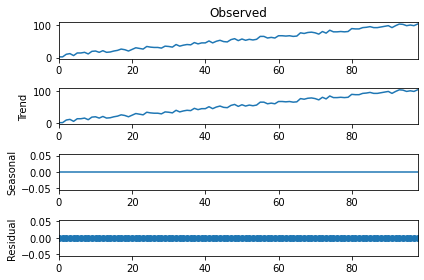

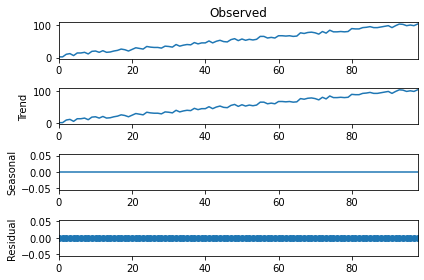

In [5]:
from random import randrange
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
plt.show()

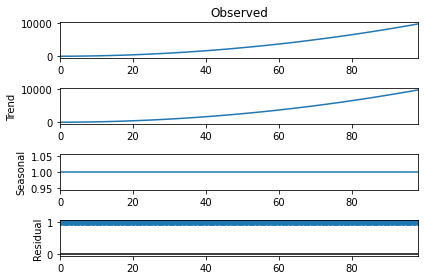

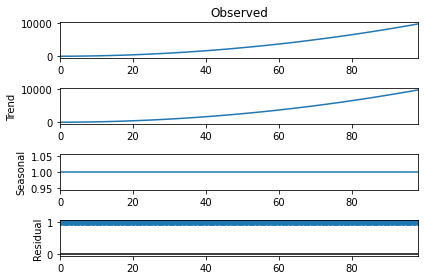

In [14]:
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
pyplot.show()

In [15]:
path = r'D:\python book\Jason Brownlee\time_series_forecasting_with_python\code\appendix_01'

<AxesSubplot:xlabel='Month'>

<AxesSubplot:xlabel='Month'>

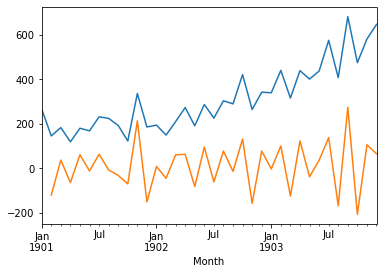

In [40]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv(path + '/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.plot()
series.diff(1).plot()

In [46]:
diff[0:10]
series.diff(1).head()

[-120.1,
 37.19999999999999,
 -63.8,
 61.000000000000014,
 -11.800000000000011,
 63.30000000000001,
 -7.300000000000011,
 -31.69999999999999,
 -69.9,
 213.6]

Month
1901-01-01      NaN
1901-02-01   -120.1
1901-03-01     37.2
1901-04-01    -63.8
1901-05-01     61.0
Name: Sales, dtype: float64

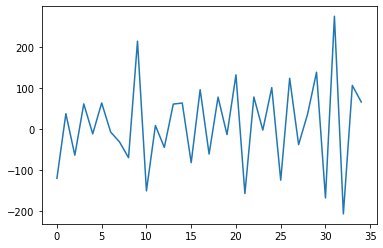

In [42]:
X = series.values
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

# Chapter 14 Use and Remove Seasonality

<AxesSubplot:xlabel='Date'>

(3650,)

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

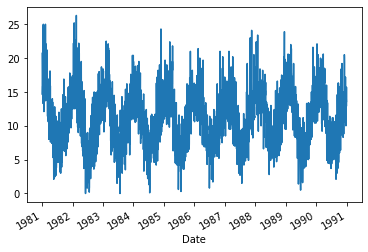

In [77]:
series = pd.read_csv(path + '/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
series.shape
series

3650

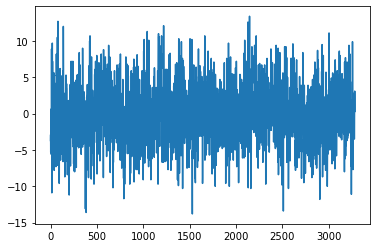

In [68]:
X = series.values
len(X)
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

<AxesSubplot:xlabel='Date'>

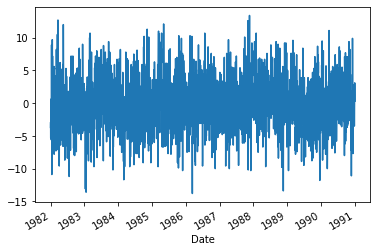

In [78]:
series.diff(365).plot()

<AxesSubplot:xlabel='Date'>

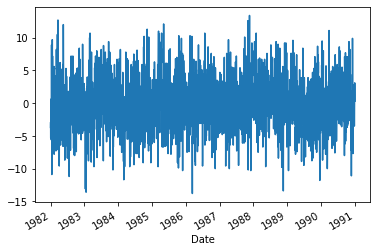

In [70]:
series.diff(365).plot()

Date
1981-01-31    17.712903
1981-02-28    17.678571
1981-03-31    13.500000
1981-04-30    12.356667
1981-05-31     9.490323
1981-06-30     7.306667
1981-07-31     7.577419
1981-08-31     7.238710
1981-09-30    10.143333
1981-10-31    10.087097
1981-11-30    11.890000
1981-12-31    13.680645
1982-01-31    16.567742
Freq: M, Name: Temp, dtype: float64


<AxesSubplot:xlabel='Date'>

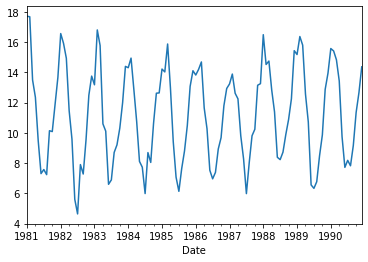

In [79]:
resample = series.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13))
monthly_mean.plot()
pyplot.show()

<AxesSubplot:xlabel='Date'>

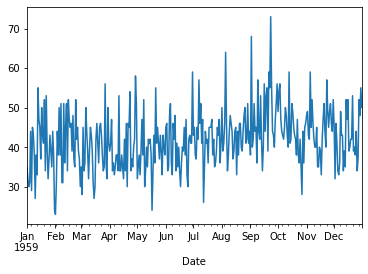

<AxesSubplot:>

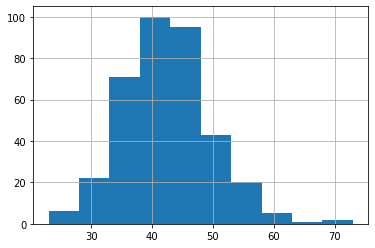

In [90]:
series = pd.read_csv(path + '/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
plt.show()
series.hist()

In [91]:
X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


<AxesSubplot:xlabel='Month'>

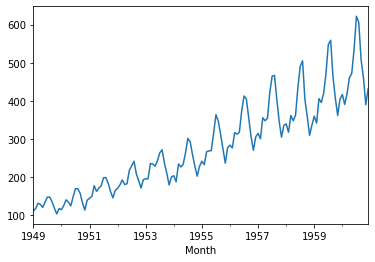

<AxesSubplot:>

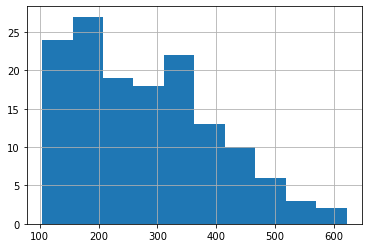

In [92]:
series = pd.read_csv(path + '/airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
plt.show()
series.hist()

In [93]:
X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


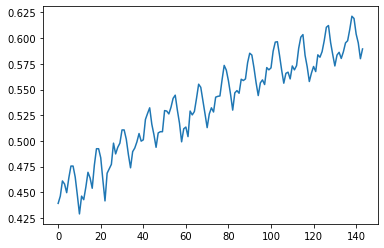

(array([ 7.,  9., 10., 15., 13., 22., 19., 21., 21.,  7.]),
 array([0.42896041, 0.44819896, 0.46743751, 0.48667606, 0.50591461,
        0.52515316, 0.54439171, 0.56363026, 0.58286881, 0.60210736,
        0.62134591]),
 <BarContainer object of 10 artists>)

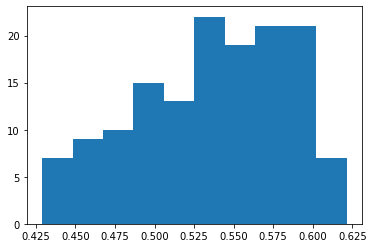

In [97]:
X = np.log(X)
plt.plot(X)
plt.show()
plt.hist(X)

In [99]:
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.495792, mean2=0.574032
variance1=0.000960, variance2=0.000446


# Chapter 11 A Gentle Introduction to the Random Walk

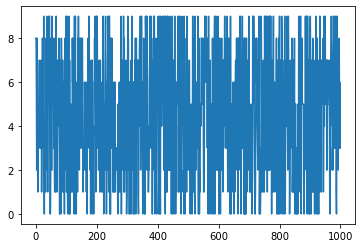

In [79]:
np.random.seed(2)
series = [np.random.choice(10) for i in range(1000)]
plt.plot(series)

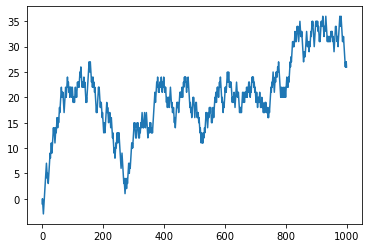

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

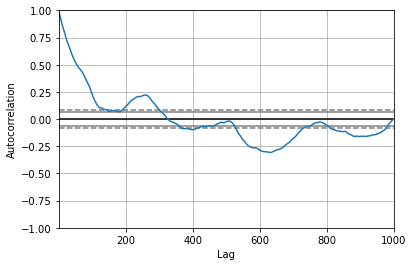

In [101]:
from random import random
from pandas.plotting import autocorrelation_plot

random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
plt.plot(random_walk)
plt.show()

autocorrelation_plot(random_walk)

### The null hypothesis of the test is that the time series is non-stationary.
### In fact, all random walk processes are non-stationary. 

In [98]:
from statsmodels.tsa.stattools import adfuller
# statistical test
result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.077051
p-value: 0.724137
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


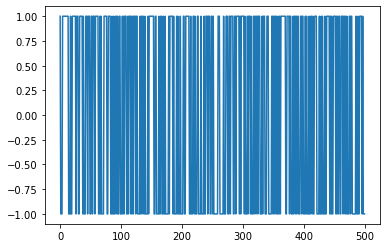

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

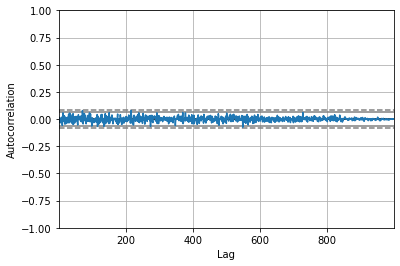

In [110]:
# take difference
diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i - 1]
    diff.append(value)
# line plot
plt.plot(diff[0:500])
plt.show()
autocorrelation_plot(diff)

In [134]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# prepare dataset
train_size = int(len(random_walk[0:10]) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
# persistence
predictions = list()
history = train[-1]
predictions
history
test[0:10]
history

[]

-2

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 6]

-2

In [135]:
for i in range(len(test)):
    yhat = history
    predictions.append(yhat)
    history = test[i]
rmse = sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)

Persistence RMSE: 1.000


In [136]:
test[0:10]
predictions[0:10]

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 6]

[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7]

In [139]:
predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history + (-1 if random() < 0.5 else 1)
    predictions.append(yhat)
    history = test[i]
rmse = sqrt(mean_squared_error(test, predictions))
print('Random RMSE: %.3f' % rmse)


Random RMSE: 1.434


In [140]:
test[0:10]
predictions[0:10]

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 6]

[-1, 0, -1, 2, 1, 4, 3, 4, 7, 8]

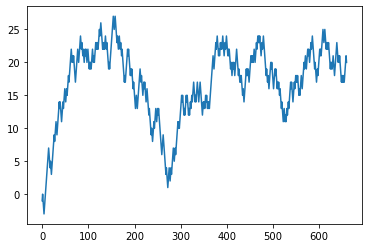

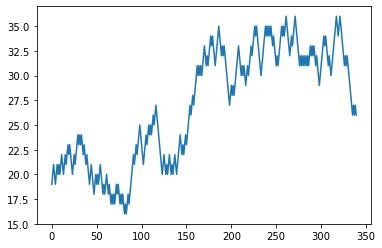

In [118]:
plt.plot(train); plt.show()
plt.plot(test)

# Level up your Pandas skills with query() and eval()
- https://medium.com/@dreamferus/level-up-your-pandas-skills-with-query-and-eval-f065951162df

In [25]:
data = []

for _ in range(100):
    data.append({
        "gender": "Male",
        "height": np.random.normal(178, 10),
        "age": np.random.uniform(20, 70)
    })
for _ in range(100):
    data.append({
        "gender": "Female",
        "height": np.random.normal(166, 8),
        "age": np.random.uniform(20, 70)
    })
    
df = (pd.DataFrame(data)
    # sample to mix order
    .sample(frac=1.0, replace=False)
    .reset_index(drop=True)
 )

In [26]:
df

gender      height        age
0    Female  175.470728  64.645225
1    Female  170.117526  42.454797
2      Male  182.291570  54.694812
3    Female  162.221727  35.187513
4    Female  168.139408  58.287763
..      ...         ...        ...
195  Female  174.442286  60.938662
196  Female  160.254430  52.245165
197    Male  164.341602  29.937948
198    Male  169.664467  25.752259
199    Male  189.555090  26.532663

[200 rows x 3 columns]

In [27]:
(
    df[(df["gender"] == "Female") & (df["age"] >= 20) & (df["age"] <= 30)]["height"]
    .pipe(lambda x: [x.max(), x.min()])
)

[175.86111913990933, 157.28925970143808]

In [29]:
(
    df.query("gender == 'Female' and 20 <= age <= 30")
    .eval("height.max(), height.min()")
)

array([175.86111913990933, 157.28925970143808], dtype=object)

In [34]:
## THE INCORRECT WAY
a = df[df["gender"] == "Male"].reset_index(drop=True).assign(age=df.age-10)
# > This is incorrect, because in the final assign df.age refers to the
# original df and not the df with only males and reset index!

# How we should do it
b = (df[df["gender"] == "Male"].reset_index(drop=True)
    .pipe(lambda x: x.assign(age=x.age-10)))
a
b

gender      height        age
0    Male  182.291570  54.645225
1    Male  177.025678  32.454797
2    Male  185.977328  44.694812
3    Male  174.094828  25.187513
4    Male  183.605293  48.287763
..    ...         ...        ...
95   Male  149.215618  57.989379
96   Male  171.324882  35.811276
97   Male  164.341602  56.623989
98   Male  169.664467  34.167082
99   Male  189.555090  19.328931

[100 rows x 3 columns]

gender      height        age
0    Male  182.291570  44.694812
1    Male  177.025678  29.984965
2    Male  185.977328  41.694801
3    Male  174.094828  19.811729
4    Male  183.605293  24.254312
..    ...         ...        ...
95   Male  149.215618  13.402231
96   Male  171.324882  58.429118
97   Male  164.341602  19.937948
98   Male  169.664467  15.752259
99   Male  189.555090  16.532663

[100 rows x 3 columns]

In [36]:
# not equal
assert not a.equals(b)

# let's add some filtering afterwards
b = (df[df["gender"] == "Male"].reset_index(drop=True)
    .pipe(lambda x: x.assign(age=x.age-10))
    .pipe(lambda x: x[x["age"] > 30]))

In [42]:
df[df["gender"] == "Male"].reset_index(drop=True).head()
df[df["gender"] == "Male"].reset_index(drop=True).pipe(lambda x: x.assign(age=x.age-10)).head()
df[df["gender"] == "Male"].reset_index(drop=True).pipe(lambda x: x.assign(age=x.age-10).pipe(lambda x: x[x["age"] > 30])).head()

gender      height        age
0   Male  182.291570  54.694812
1   Male  177.025678  39.984965
2   Male  185.977328  51.694801
3   Male  174.094828  29.811729
4   Male  183.605293  34.254312

gender      height        age
0   Male  182.291570  44.694812
1   Male  177.025678  29.984965
2   Male  185.977328  41.694801
3   Male  174.094828  19.811729
4   Male  183.605293  24.254312

gender      height        age
0    Male  182.291570  44.694812
2    Male  185.977328  41.694801
6    Male  177.270718  56.466256
10   Male  196.769479  46.654034
12   Male  182.794332  48.930456

In [55]:
from numpy import power
df.query("@power(age, 2) > 1000")
#df.query("@np.power(age, 2) > 1000")

gender      height        age
0    Female  175.470728  64.645225
1    Female  170.117526  42.454797
2      Male  182.291570  54.694812
3    Female  162.221727  35.187513
4    Female  168.139408  58.287763
..      ...         ...        ...
192    Male  171.324882  68.429118
193  Female  177.014321  60.340665
194  Female  171.694344  58.932242
195  Female  174.442286  60.938662
196  Female  160.254430  52.245165

[156 rows x 3 columns]

# 25 Advanced Pandas Functions People Are Using Without Telling You
- https://towardsdatascience.com/25-advanced-pandas-functions-people-are-using-without-telling-you-b65fa442f0f4

In [57]:
data = pd.Series([1, 6, 7, [46, 56, 49], 45, [15, 10, 12]]).to_frame("dirty")
data

dirty
0             1
1             6
2             7
3  [46, 56, 49]
4            45
5  [15, 10, 12]

In [59]:
data.explode('dirty', ignore_index=True)

dirty
0     1
1     6
2     7
3    46
4    56
5    49
6    45
7    15
8    10
9    12

In [ ]:
BOOSTRAP_SAMPLES = 1000
BOOTSTRAP_SAMPLE_SIZE = 200
bootstrap_sample_arr_means = []

s = [round(x,2) for x in np.random.normal(size = 20, loc = 175, scale = 20)]

for _ in range(BOOSTRAP_SAMPLES):
  bootstrap_sample_arr = []
  for _ in range(BOOTSTRAP_SAMPLE_SIZE):
    bootstrap_sample_arr.append(np.random.choice(s))
  bootstrap_sample_arr_means.append(np.mean(bootstrap_sample_arr))

# A Guide to Find the Best Boosting Model using Bayesian Hyperparameter Tuning but without Overfitting
- https://towardsdatascience.com/a-guide-to-find-the-best-boosting-model-using-bayesian-hyperparameter-tuning-but-without-c98b6a1ecac8

In [ ]:
# ! pip install hgboost

In [63]:
# Import the library
from hgboost import hgboost

# Initialize library.
hgb = hgboost(
    max_eval=250,      # Search space is based  on the number of evaluations.
    threshold=0.5,     # Classification threshold. In case of two-class model this is 0.5.
    cv=5,              # k-folds cross-validation.
    test_size=0.2,     # Percentage split for the testset.
    val_size=0.2,      # Percentage split for the validationset.
    top_cv_evals=10,   # Number of top best performing models that is evaluated.
    is_unbalance=True, # Control the balance of positive and negative weights, useful for unbalanced classes.
    random_state=None, # Fix the random state to create reproducible results.
    n_jobs=-1,         # The number of CPU jobs to run in parallel. -1 means using all processors.
    gpu=False,         # Compute using GPU in case of True.
    verbose=3,         # Print progress to screen.
)

In [64]:
# Import example and preprocessing
df = hgb.import_example()
y = df['Age'].values
df.drop(['Age', 'PassengerId', 'Name'], axis=1, inplace=True)

# Preprocessing
X = hgb.preprocessing(df)
I = ~np.isnan(y)
X = X.loc[I, :]
y = y[I]

[hgboost] >Downloading [titanic] dataset from github source..
100% [..............................................................................] 22510 / 22510[hgboost] >Import dataset [titanic]

[df2onehot] >Auto detecting dtypes.


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 258.03it/s]

[df2onehot] >Set dtypes in dataframe..



100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  5.61it/s]

[df2onehot] >Total onehot features: 203


In [69]:
# Fit model for a regression task.
hgb.xgboost_reg(X, y)
hgb.catboost_reg(X, y)
hgb.lightboost_reg(X, y)

# Fit ensemble model for regression task.
hgb.ensemble(X, y, methods=['xgb_reg', 'ctb_reg', 'lgb_reg'])

[hgboost] >Start hgboost regression.
[hgboost] >Collecting xgb_reg parameters.
[hgboost] >method: xgb_reg
[hgboost] >eval_metric: rmse
[hgboost] >greater_is_better: False
[hgboost] >*********************************************************************************
[hgboost] >Total dataset: (714, 203) 
[hgboost] >Validation set: (143, 203) 
[hgboost] >Test-set: (143, 203) 
[hgboost] >Train-set: (428, 203) 
[hgboost] >*********************************************************************************
[hgboost] >Searching across hyperparameter space for best performing parameters using maximum nr. evaluations: 250
100%|██████████████████████████████████████████████| 250/250 [01:47<00:00,  2.32trial/s, best loss: 13.755370556198631]
[hgboost]> Collecting the hyperparameters from the [250] trials.
[hgboost] >[rmse]: 13.76 Best performing model across 250 iterations using Bayesian Optimization with Hyperopt.
[hgboost] >****************************************************************************

{'params': {'gamma': 0.25,
  'learning_rate': 0.30000000000000004,
  'max_depth': 21,
  'min_child_weight': 8,
  'n_estimators': 95,
  'reg_lambda': 10.0,
  'subsample': 0.5233272332425574},
 'summary':     gamma gpu_id learning_rate max_depth min_child_weight n_estimators  \
 0       0      0          0.25        12                3          120   
 1     1.0      0           0.1        29                4           55   
 2     1.0      0          0.15        21                8          170   
 3     0.5      0           0.1        19                6           60   
 4       0      0           0.2        12                1          185   
 ..    ...    ...           ...       ...              ...          ...   
 246  0.25      0          0.05        13                5           20   
 247     0      0           0.1        19                8          115   
 248   0.5      0          0.25        29                8          160   
 249   1.0      0           0.1        14       

[hgboost] >Start hgboost regression.
[hgboost] >Collecting ctb_reg parameters.
[hgboost] >method: ctb_reg
[hgboost] >eval_metric: rmse
[hgboost] >greater_is_better: False
[hgboost] >*********************************************************************************
[hgboost] >Total dataset: (714, 203) 
[hgboost] >Validation set: (143, 203) 
[hgboost] >Test-set: (178, 203) 
[hgboost] >Train-set: (393, 203) 
[hgboost] >*********************************************************************************
[hgboost] >Searching across hyperparameter space for best performing parameters using maximum nr. evaluations: 250
100%|██████████████████████████████████████████████| 250/250 [04:14<00:00,  1.02s/trial, best loss: 11.507092685162256]
[hgboost]> Collecting the hyperparameters from the [250] trials.
[hgboost] >[rmse]: 11.51 Best performing model across 250 iterations using Bayesian Optimization with Hyperopt.
[hgboost] >****************************************************************************

{'params': {'colsample_bylevel': None,
  'learning_rate': 0.25,
  'max_depth': None,
  'n_estimators': None},
 'summary':     colsample_bylevel devices learning_rate max_depth n_estimators task_type  \
 0                None    None          0.15      None         None       CPU   
 1                None    None          0.25      None         None       CPU   
 2                None    None           0.1      None         None       CPU   
 3                None    None           0.1      None         None       CPU   
 4                None    None           0.2      None         None       CPU   
 ..                ...     ...           ...       ...          ...       ...   
 246              None    None           0.2      None         None       CPU   
 247              None    None           0.3      None         None       CPU   
 248              None    None          0.25      None         None       CPU   
 249              None    None          0.15      None         None  

[hgboost] >Start hgboost regression.
[hgboost] >Collecting lgb_reg parameters.
[hgboost] >method: lgb_reg
[hgboost] >eval_metric: rmse
[hgboost] >greater_is_better: False
[hgboost] >*********************************************************************************
[hgboost] >Total dataset: (714, 203) 
[hgboost] >Validation set: (143, 203) 
[hgboost] >Test-set: (223, 203) 
[hgboost] >Train-set: (348, 203) 
[hgboost] >*********************************************************************************
[hgboost] >Searching across hyperparameter space for best performing parameters using maximum nr. evaluations: 250
100%|███████████████████████████████████████████████| 250/250 [00:21<00:00, 11.60trial/s, best loss: 12.05472662149596]
[hgboost]> Collecting the hyperparameters from the [250] trials.
[hgboost] >[rmse]: 12.05 Best performing model across 250 iterations using Bayesian Optimization with Hyperopt.
[hgboost] >****************************************************************************

{'params': {'learning_rate': 0.30000000000000004,
  'max_depth': 5,
  'min_child_weight': 4,
  'n_estimators': 60,
  'subsample': 0.9928089057518904},
 'summary':     device gpu_device_id gpu_platform_id learning_rate max_depth  \
 0      cpu             0               0          0.25        29   
 1      cpu             0               0           0.2         7   
 2      cpu             0               0           0.2         9   
 3      cpu             0               0           0.3        17   
 4      cpu             0               0           0.1        21   
 ..     ...           ...             ...           ...       ...   
 246    cpu             0               0          0.25         5   
 247    cpu             0               0          0.05         5   
 248    cpu             0               0           0.1         5   
 249    cpu             0               0           0.3         5   
 250    NaN           NaN             NaN           0.1        -1   
 
     min

[hgboost] >Create ensemble regression model..
[hgboost] >Collecting xgb_reg parameters.
[hgboost] >method: xgb_reg
[hgboost] >eval_metric: rmse
[hgboost] >greater_is_better: False
[hgboost] >*********************************************************************************
[hgboost] >Total dataset: (571, 203) 
[hgboost] >Validation set: (115, 203) 
[hgboost] >Test-set: (224, 203) 
[hgboost] >Train-set: (232, 203) 
[hgboost] >*********************************************************************************
[hgboost] >Searching across hyperparameter space for best performing parameters using maximum nr. evaluations: 250
100%|██████████████████████████████████████████████| 250/250 [01:40<00:00,  2.48trial/s, best loss: 11.885026295691011]
[hgboost]> Collecting the hyperparameters from the [250] trials.
[hgboost] >[rmse]: 11.89 Best performing model across 250 iterations using Bayesian Optimization with Hyperopt.
[hgboost] >*******************************************************************

{'xgb_reg': {'model': <hgboost.hgboost.hgboost at 0x2a618b5b610>,
  'loss': 11.727043012456445,
  'val_results': None},
 'ctb_reg': {'model': <hgboost.hgboost.hgboost at 0x2a633cbe6a0>,
  'loss': 11.760849073234203,
  'val_results': None},
 'lgb_reg': {'model': <hgboost.hgboost.hgboost at 0x2a633c96fa0>,
  'loss': 11.343052639724348,
  'val_results': None},
 'val_results': None,
 'model': VotingRegressor(estimators=[('xgb_reg',
                              XGBRegressor(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0.5,
                                           gpu_id=0, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.1, max_delta_ste

# ❤️Heart disease 📊multiple correspondence analysis
- https://www.kaggle.com/code/jiagengchang/heart-disease-multiple-correspondence-analysis/notebook

In [102]:
df = pd.read_csv('./data/heart.csv')
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [103]:
date = np.datetime64('2020-01-01') + np.arange(len(df))
df['date'] = date

In [104]:
df.set_index('date', inplace=True)

In [105]:
temps = df['RestingBP']
dataframe = pd.concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-3', 't-2', 't-1', 't']
dataframe

t-3    t-2    t-1    t
date                                
2020-01-01    NaN    NaN    NaN  140
2020-01-02    NaN    NaN  140.0  160
2020-01-03    NaN  140.0  160.0  130
2020-01-04  140.0  160.0  130.0  138
2020-01-05  160.0  130.0  138.0  150
...           ...    ...    ...  ...
2022-07-02  120.0  164.0  140.0  110
2022-07-03  164.0  140.0  110.0  144
2022-07-04  140.0  110.0  144.0  130
2022-07-05  110.0  144.0  130.0  130
2022-07-06  144.0  130.0  130.0  138

[918 rows x 4 columns]

In [106]:
window = dataframe.rolling(window=2)
means = window.mean()
means

t-3    t-2    t-1      t
date                                  
2020-01-01    NaN    NaN    NaN    NaN
2020-01-02    NaN    NaN    NaN  150.0
2020-01-03    NaN    NaN  150.0  145.0
2020-01-04    NaN  150.0  145.0  134.0
2020-01-05  150.0  145.0  134.0  144.0
...           ...    ...    ...    ...
2022-07-02  122.0  142.0  152.0  125.0
2022-07-03  142.0  152.0  125.0  127.0
2022-07-04  152.0  125.0  127.0  137.0
2022-07-05  125.0  127.0  137.0  130.0
2022-07-06  127.0  137.0  130.0  134.0

[918 rows x 4 columns]

date
2020-01-01           NaN
2020-01-02           NaN
2020-01-03    143.333333
2020-01-04    142.666667
2020-01-05    139.333333
2020-01-06    136.000000
2020-01-07    133.333333
2020-01-08    120.000000
2020-01-09    126.666667
2020-01-10    123.333333
Name: t, dtype: float64


<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

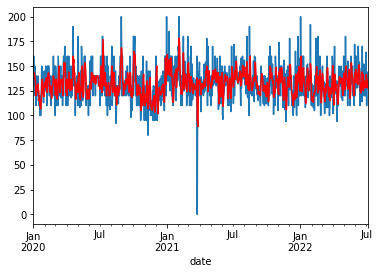

In [107]:
series = dataframe['t']
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
plt.show()

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

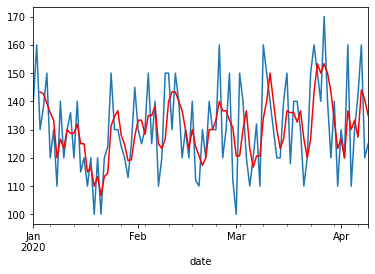

In [108]:
# zoomed plot original and transformed dataset
series[:100].plot()
rolling_mean[:100].plot(color='red')
plt.show()

In [109]:
df = pd.DataFrame(series.values)
width = 3

In [110]:
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=3)
lag3
means = window.mean()
means.head(10)

0
0      NaN
1      NaN
2    140.0
3    160.0
4    130.0
..     ...
913  164.0
914  140.0
915  110.0
916  144.0
917  130.0

[918 rows x 1 columns]

0
0         NaN
1         NaN
2         NaN
3         NaN
4  143.333333
5  142.666667
6  139.333333
7  136.000000
8  133.333333
9  120.000000

In [37]:
window = lag3.rolling(window=width)
means = window.mean()
dataframe = pd.concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't', 't+1']
dataframe.head(10)

mean      t  t+1
0         NaN    NaN  140
1         NaN  140.0  160
2         NaN  160.0  130
3         NaN  130.0  138
4  143.333333  138.0  150
5  142.666667  150.0  120
6  139.333333  120.0  130
7  136.000000  130.0  110
8  133.333333  110.0  140
9  120.000000  140.0  120

### Your time series is not white noise if any of the following conditions are true:
- Does your series have a non-zero mean?
- Does the variance change over time?
- Do values correlate with lag values?

In [117]:
from random import gauss
series = [np.random.normal(0.0, 1.0) for i in range(1000)]
series = pd.Series(series)

In [116]:
series.describe()

count    10000.000000
mean         0.015889
std          1.007605
min         -3.966724
25%         -0.664846
50%          0.013457
75%          0.690338
max          4.385855
dtype: float64

<AxesSubplot:>

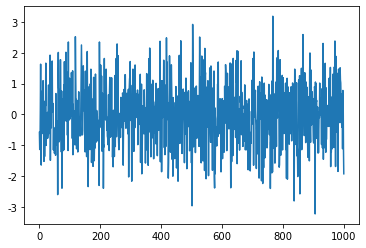

In [76]:
series.plot()

<AxesSubplot:>

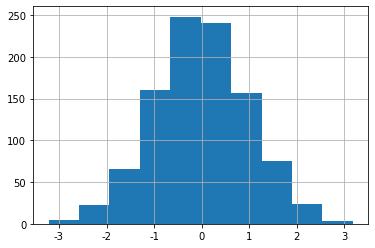

In [77]:
series.hist()

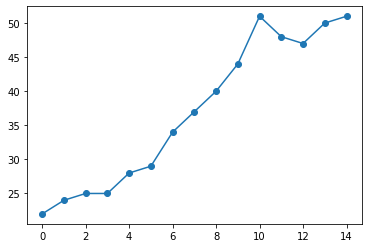

In [173]:
series = [12,11,15,14,14,18,16,19,19,25,22,27]
series = [22,24,25,25,28,29,34,37,40,44,51,48,47,50,51]
plt.scatter(np.arange(len(series)), series)
plt.plot(series)

array([ 1.        ,  0.83174224,  0.65632458,  0.49105012,  0.27863962,
        0.03102625, -0.16527446, -0.30369928, -0.40095465, -0.45823389,
       -0.45047733, -0.36933174, -0.29057279, -0.22494033, -0.12529833])

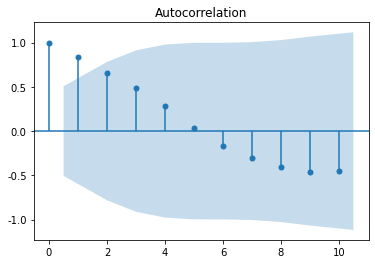

In [174]:
import statsmodels.api as sm
sm.tsa.acf(series)
from statsmodels.graphics import tsaplots

#plot autocorrelation function
fig = tsaplots.plot_acf(series, lags=10)
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

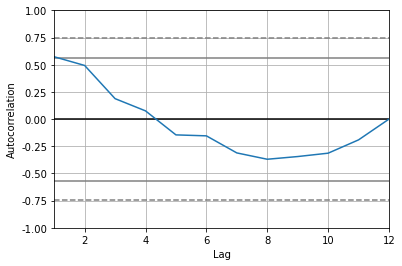

In [154]:
pd.plotting.autocorrelation_plot(series)

0  lag1  lag2
0   22  25.0  25.0
1   24  25.0  28.0
2   25  28.0  29.0
3   25  29.0  34.0
4   28  34.0  37.0
5   29  37.0  40.0
6   34  40.0  44.0
7   37  44.0  51.0
8   40  51.0  48.0
9   44  48.0  47.0
10  51  47.0  50.0
11  48  50.0  51.0
12  47  51.0   NaN
13  50   NaN   NaN
14  51   NaN   NaN

<AxesSubplot:>

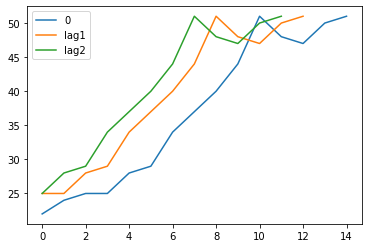

In [175]:
df= pd.DataFrame(series)
df['lag1'] = df[0].shift(-2)
df['lag2'] = df[0].shift(-3)
df
df.plot()

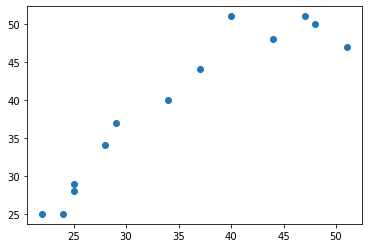

In [176]:
plt.scatter(df[0], df['lag1'])

In [177]:
df.corr()

0      lag1      lag2
0     1.000000  0.935356  0.901460
lag1  0.935356  1.000000  0.961102
lag2  0.901460  0.961102  1.000000

In [172]:
df[0:10]
df[0:10].corr()

0  lag1  lag2
0  12  11.0  15.0
1  11  15.0  14.0
2  15  14.0  14.0
3  14  14.0  18.0
4  14  18.0  16.0
5  18  16.0  19.0
6  16  19.0  19.0
7  19  19.0  25.0
8  19  25.0  22.0
9  25  22.0  27.0

0      lag1      lag2
0     1.000000  0.734001  0.914132
lag1  0.734001  1.000000  0.737533
lag2  0.914132  0.737533  1.000000

https://www.real-statistics.com/time-series-analysis/stochastic-processes/autocorrelation-function/

In [59]:
#!pip install pykrx
from pykrx import stock #from pykrx import bond
mydict={}
for ticker in stock.get_market_ticker_list():
  mydict.update({stock.get_market_ticker_name(ticker) : ticker})

In [60]:
search_key = "삼성"
values = [(key, value) for key, value in mydict.items() if search_key in key]
values

[('삼성SDI', '006400'),
 ('삼성SDI우', '006405'),
 ('삼성공조', '006660'),
 ('삼성물산', '028260'),
 ('삼성물산우B', '02826K'),
 ('삼성바이오로직스', '207940'),
 ('삼성생명', '032830'),
 ('삼성에스디에스', '018260'),
 ('삼성엔지니어링', '028050'),
 ('삼성전기', '009150'),
 ('삼성전기우', '009155'),
 ('삼성전자', '005930'),
 ('삼성전자우', '005935'),
 ('삼성제약', '001360'),
 ('삼성중공업', '010140'),
 ('삼성중공우', '010145'),
 ('삼성증권', '016360'),
 ('삼성출판사', '068290'),
 ('삼성카드', '029780'),
 ('삼성화재', '000810'),
 ('삼성화재우', '000815')]

In [62]:
start_date = '20210101'
end_date = '20220906'
df = stock.get_market_ohlcv(start_date, end_date, "005930")
df

시가     고가     저가     종가       거래량
날짜                                              
2021-01-04  81000  84400  80200  83000  38655276
2021-01-05  81600  83900  81600  83900  35335669
2021-01-06  83300  84500  82100  82200  42089013
2021-01-07  82800  84200  82700  82900  32644642
2021-01-08  83300  90000  83000  88800  59013307
...           ...    ...    ...    ...       ...
2022-08-31  58200  59900  58200  59700  14203512
2022-09-01  58700  58900  58300  58400  14905777
2022-09-02  58300  58600  57500  57500  15040310
2022-09-05  57400  57800  56800  57100  11425977
2022-09-06  57200  57600  56900  57100   7419198

[416 rows x 5 columns]

# STUDY

In [19]:
numcols = df.select_dtypes(['number']).columns
catcols = df.select_dtypes(['object']).columns

In [20]:
for col in catcols:
    print (col, df[col].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


### Prior probability of heart disease (cheating)

In [22]:
df['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

### Say farewell to target HeartDisease column

In [24]:
heartDisease = df['HeartDisease']
# goodbye target column
df = df.drop(['HeartDisease'],axis=1)

## Part 1: Exploratory data visualization

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>],
       [<AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'FastingBS'}>],
       [<AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>]], dtype=object)

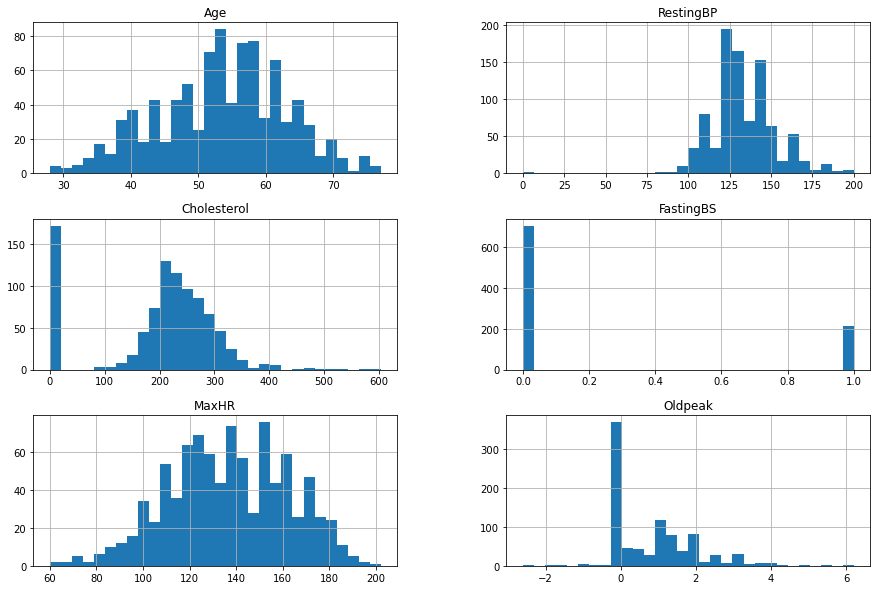

In [25]:
df.hist(bins=30, figsize=(15, 10))

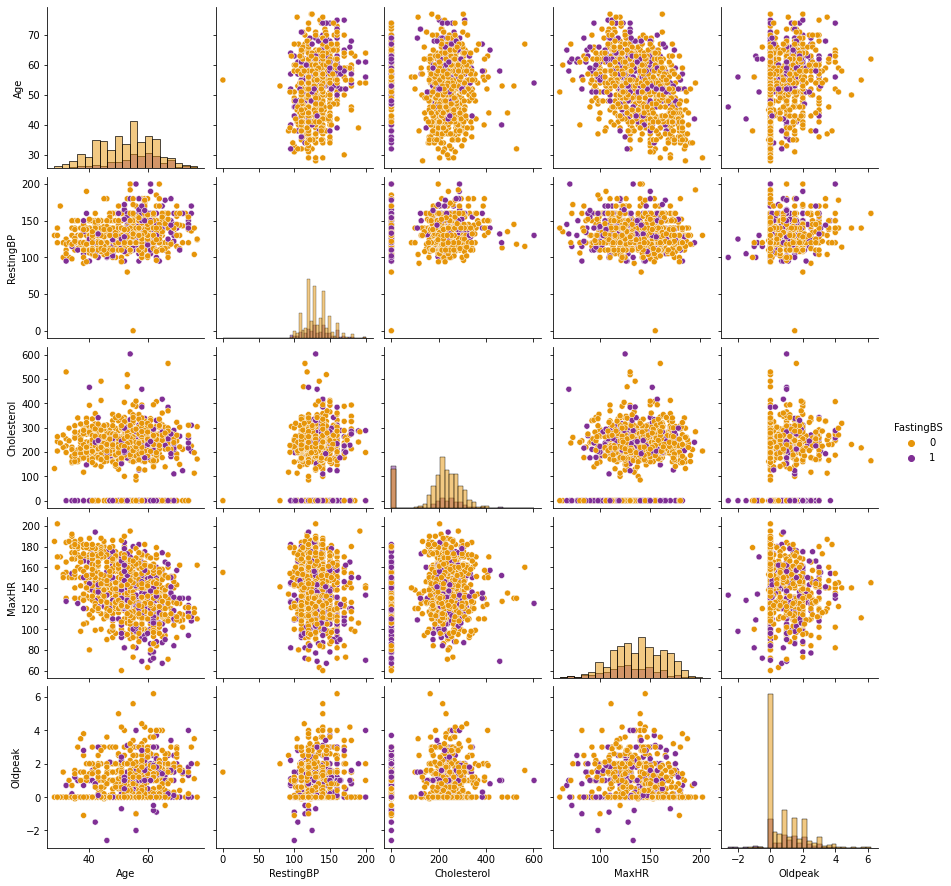

In [27]:
sns.pairplot(df, diag_kind='hist', hue='FastingBS', palette='CMRmap_r')

<AxesSubplot:>

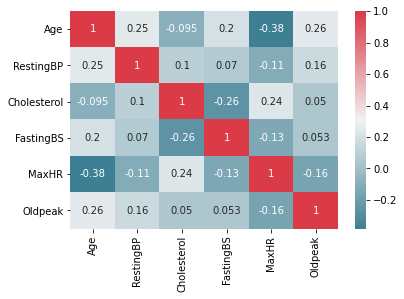

In [28]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

## Part 2: Preprocessing

In [29]:
# create new categorical col for FastingBS
df['FastingBSCategorical'] = df['FastingBS'].map({0: 'Low', 1: 'High'})
df['FastingBSCategorical'] = df['FastingBSCategorical']

# drop FastingBS
df.drop(['FastingBS'], axis=1, inplace=True)

In [30]:
# update catcols variable
catcols = df.select_dtypes(['object']).columns

# convert object columns to categorical columns
df[catcols] = df[catcols].astype('category')

In [31]:
# now all Dtypes are either numbers or category.
# about half the memory usage as well
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   918 non-null    int64   
 1   Sex                   918 non-null    category
 2   ChestPainType         918 non-null    category
 3   RestingBP             918 non-null    int64   
 4   Cholesterol           918 non-null    int64   
 5   RestingECG            918 non-null    category
 6   MaxHR                 918 non-null    int64   
 7   ExerciseAngina        918 non-null    category
 8   Oldpeak               918 non-null    float64 
 9   ST_Slope              918 non-null    category
 10  FastingBSCategorical  918 non-null    category
dtypes: category(6), float64(1), int64(4)
memory usage: 42.2 KB


In [32]:
df.replace(0, np.nan).isna().sum()

Age                       0
Sex                       0
ChestPainType             0
RestingBP                 1
Cholesterol             172
RestingECG                0
MaxHR                     0
ExerciseAngina            0
Oldpeak                 368
ST_Slope                  0
FastingBSCategorical      0
dtype: int64

In [34]:
df['Cholesterol'].mean()
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
df['Cholesterol'].mean()

198.7995642701525

244.6353887399464

<AxesSubplot:>

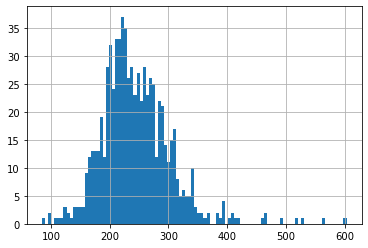

In [35]:
df['Cholesterol'].replace(0,np.nan).hist(bins=100)

In [36]:
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].median())

In [37]:
df['RestingBP'] = df['RestingBP'].replace(0, np.nan)

In [38]:
df['RestingBP'] = df['RestingBP'].replace(np.nan, 120)

## Part 3: MCA and PCA

In [39]:
# separate columns based on whether we are doing PCA or MCA
pca_cols = df.select_dtypes(['number']).columns
print(len(pca_cols), 'features used for PCA are', pca_cols.tolist())

mca_cols = df.select_dtypes(['category']).columns
print(len(mca_cols), 'features used for MCA are', mca_cols.tolist())

5 features used for PCA are ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
6 features used for MCA are ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBSCategorical']


In [40]:
df[mca_cols].head()

Sex ChestPainType RestingECG ExerciseAngina ST_Slope FastingBSCategorical
0   M           ATA     Normal              N       Up                  Low
1   F           NAP     Normal              N     Flat                  Low
2   M           ATA         ST              N       Up                  Low
3   F           ASY     Normal              Y     Flat                  Low
4   M           NAP     Normal              N       Up                  Low

In [42]:
import prince
mca = prince.MCA(n_components = 2)
mca = mca.fit(df[mca_cols])

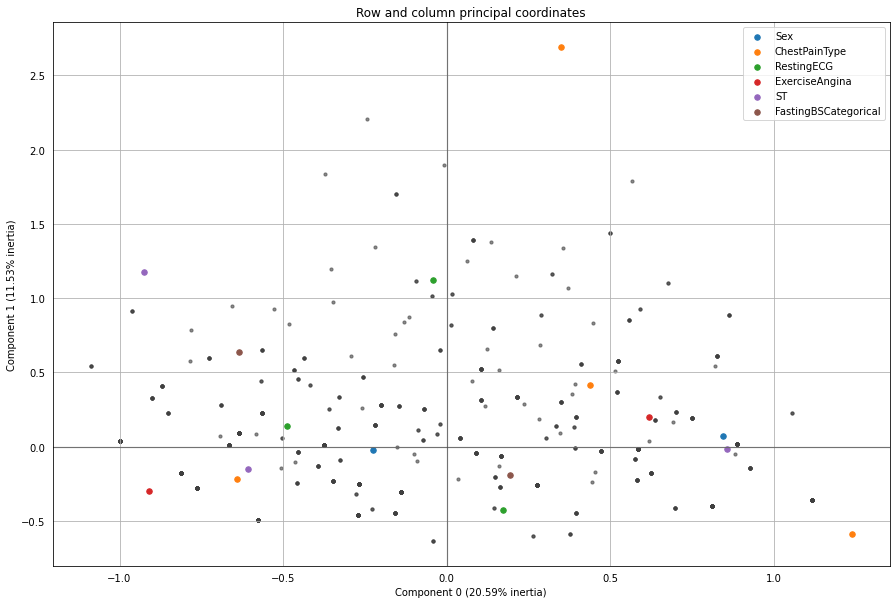

In [45]:
ax = mca.plot_coordinates(df[mca_cols], figsize=(15,10))

In [46]:
# instantiate PCA class
pca = prince.PCA(n_components = 2)

# get princical components
pca = pca.fit(df[pca_cols])

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (34.09% inertia)', ylabel='Component 1 (20.52% inertia)'>

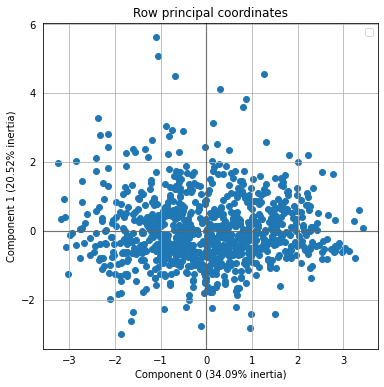

In [47]:
pca.plot_row_coordinates(df[pca_cols])

# scikit-optimize
Sequential model-based optimization in Python
https://scikit-optimize.github.io/stable/index.html

In [13]:
from skopt import BayesSearchCV
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X, y = load_digits(n_class=10, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=.25, random_state=0)

# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    SVC(),
    {
        'C': (1e-6, 1e+6, 'log-uniform'),
        'gamma': (1e-6, 1e+1, 'log-uniform'),
        'degree': (1, 8),  # integer valued parameter
        'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=32,
    #scoring='recall_macro',
    cv=3
)

opt.fit(X_train, y_train)

print('Best estimator', opt.best_params_)
print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))

BayesSearchCV(cv=3, estimator=SVC(), n_iter=32, scoring='recall_macro',
              search_spaces={'C': (1e-06, 1000000.0, 'log-uniform'),
                             'degree': (1, 8),
                             'gamma': (1e-06, 10.0, 'log-uniform'),
                             'kernel': ['linear', 'poly', 'rbf']})

Best estimator OrderedDict([('C', 21.396547470463677), ('degree', 4), ('gamma', 0.6854550212652804), ('kernel', 'poly')])
val. score: 0.9849664725601089
test score: 0.9828787326121567


In [14]:
# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    SVC(),
    {
        'C': (1e-6, 1e+6, 'log-uniform'),
        'gamma': (1e-6, 1e+1, 'log-uniform'),
        'degree': (1, 8),  # integer valued parameter
        'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=32,
    #scoring='recall_macro',
    cv=3
)

opt.fit(X_train, y_train)

print('Best estimator', opt.best_params_)
print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))

BayesSearchCV(cv=3, estimator=SVC(), n_iter=32,
              search_spaces={'C': (1e-06, 1000000.0, 'log-uniform'),
                             'degree': (1, 8),
                             'gamma': (1e-06, 10.0, 'log-uniform'),
                             'kernel': ['linear', 'poly', 'rbf']})

Best estimator OrderedDict([('C', 1507.7912314368662), ('degree', 2), ('gamma', 0.00010217408113747604), ('kernel', 'rbf')])
val. score: 0.9844097995545656
test score: 0.9822222222222222


# Is Your Model the Best One or the Luckiest One?
- How to avoid being fooled by randomness when selecting the best model
- https://towardsdatascience.com/is-your-model-the-best-one-or-the-luckiest-one-7cfd1f43ea6
<img src='https://miro.medium.com/max/770/1*ymAMG-SI7iLAdRewfoSrUA.png'>

### How can we be sure that a better metric on the test set means a better model and not just a luckier model?
### <font color='blue'> The best model is the model which performs best on unseen data.
## 1. Introducing the Universe
### For a given task, the best model is the model that performs best on all possible unseen data.

<img src='https://miro.medium.com/max/770/1*9r_uJEYG4H7lQGOlcgHA8A.png'>

### We never observe the universe, we only observe a single test dataset, which is a small, random fraction of it.

## 2. How to simulate the Universe?
- First of all, we need to set the desired number of individuals in the universe (usually a big number). 
- Then, we need to set the prevalence, i.e. the percentage of positives (we can leave it to 50 %, which is the default). 
- The third step is choosing the ROC score that we want to be in the universe.
- Finally, we can compute the predicted probability for each individual in the universe: negatives must be evenly spaced between 0 and 1, whereas positives must be evenly spaced between α and 1.

In [46]:
import numpy as np
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF
#import pingouin as pg
from sklearn.metrics import roc_auc_score, pairwise_distances
from scipy.stats import iqr
import matplotlib.pyplot as plt
from tqdm import tqdm

## Functions

In [131]:
def get_y_proba(roc, n=100000, prevalence=.5):
  '''Get two arrays, y and proba for a given roc (greater than .5)'''
  n_ones = int(round(n * prevalence))# positive
  n_zeros = n - n_ones # negative
  y = np.array([0] * n_zeros + [1] * n_ones)
  alpha = np.abs(roc - .5) * 2
  proba_zeros = np.linspace(0, 1, n_zeros)
  proba_ones = np.linspace(alpha, 1, n_ones)
  proba = np.concatenate([proba_zeros, proba_ones])
  return y, proba

In [132]:
def distance_quantile(x, q):
  dist = pairwise_distances(np.array(x).reshape(-1,1))
  dist = dist[np.triu_indices(len(dist), k=1)]
  return np.quantile(dist, q)

적합 8000, 부적합 2000


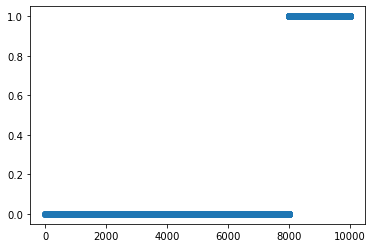

In [133]:
roc = 0.5
n=10000; prevalence=.2
n_ones = int(round(n * prevalence))# positive
n_zeros = n - n_ones # negative
print(f'적합 {n_zeros}, 부적합 {n_ones}')
y = np.array([0] * n_zeros + [1] * n_ones)
plt.scatter(np.arange(0, n), y)

0.6000000000000001

(array([800., 800., 800., 800., 800., 800., 800., 800., 800., 800.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([200., 200., 200., 200., 200., 200., 200., 200., 200., 200.]),
 array([0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84, 0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 10 artists>)

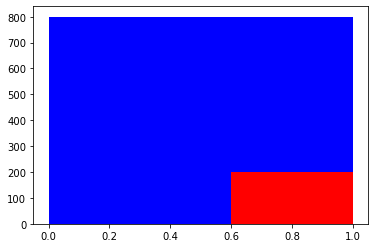

In [134]:
roc = 0.8
alpha = np.abs(roc - .5) * 2
alpha

proba_zeros = np.linspace(0, 1, n_zeros)
proba_ones = np.linspace(alpha, 1, n_ones)
plt.hist(proba_zeros, color='b') 
plt.hist(proba_ones, color='r')

(8000,)

(2000,)

(10000,)

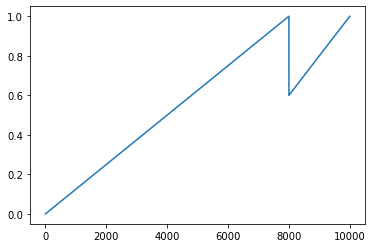

In [135]:
proba_zeros.shape
proba_ones.shape
proba = np.concatenate([proba_zeros, proba_ones])
proba.shape
plt.plot(np.arange(0, len(proba)), proba)

## Assert

In [136]:
for roc in np.linspace(.5,1,21):
  y, proba = get_y_proba(roc=roc, n=5000, prevalence=.2)
  assert np.abs(roc - roc_auc_score(y, proba)) < .001

In [127]:
assert distance_quantile([1,2,3,4,5,6,7,8,9,10], q=1) == 9

In [125]:
distance_quantile([1,2,3,4,5,6,7,8,9,10], q=1)

9.0

## Distributions for roc 75, 80 and 81

In [152]:
roc_auc_score(y_sample, proba_sample)

0.8094122495688603

In [156]:
rocs_true = [.75, .80, .81]
rocs_obs = []

for roc_true in tqdm(rocs_true):
  y_universe, proba_universe = get_y_proba(n=10000, prevalence=.2, roc=roc_true)
  rocs_obs.append([])
  for i in range(5000):
    index = np.random.choice(range(len(y_universe)), 1_000, replace=True)
    y_sample, proba_sample = y_universe[index], proba_universe[index]
    rocs_obs[-1].append(roc_auc_score(y_sample, proba_sample))

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:20<00:00,  6.75s/it]


3

5000

5000

5000

(array([1.000e+00, 2.000e+00, 1.600e+01, 1.390e+02, 5.490e+02, 1.347e+03,
        1.614e+03, 1.003e+03, 2.820e+02, 4.700e+01]),
 array([0.66876805, 0.68175475, 0.69474146, 0.70772816, 0.72071487,
        0.73370157, 0.74668828, 0.75967498, 0.77266169, 0.78564839,
        0.7986351 ]),
 <BarContainer object of 10 artists>)

(array([  15.,   92.,  328.,  730., 1196., 1334.,  858.,  334.,   98.,
          15.]),
 array([0.75317286, 0.76238694, 0.77160102, 0.78081511, 0.79002919,
        0.79924328, 0.80845736, 0.81767145, 0.82688553, 0.83609961,
        0.8453137 ]),
 <BarContainer object of 10 artists>)

(array([  38.,  123.,  409.,  846., 1307., 1260.,  715.,  242.,   53.,
           7.]),
 array([0.76722839, 0.77617293, 0.78511748, 0.79406202, 0.80300657,
        0.81195111, 0.82089566, 0.8298402 , 0.83878475, 0.84772929,
        0.85667384]),
 <BarContainer object of 10 artists>)

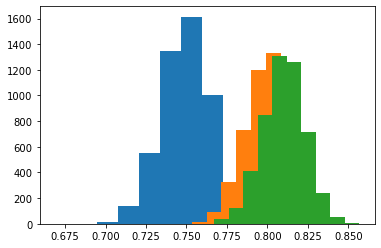

In [178]:
len(rocs_obs)
len(rocs_obs[0])
len(rocs_obs[1])
len(rocs_obs[2])
for i in np.arange(3):
    plt.hist(rocs_obs[i])

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   3.,   4.,   5.,   2.,   7.,  18.,  14.,   7.,  14.,  24.,
         32.,  35.,  55.,  57.,  66.,  83.,  79.,  96., 118., 133., 128.,
        164., 148., 184., 223., 244., 212., 192., 238., 216., 245., 237.,
        210., 230., 151., 196., 152., 112., 102., 117., 100.,  78.,  53.,
         54.,  31.,  37.,  22.,  17.,  14.,  11.,   8.,   4.,   8.,   4.,
          2.]),
 array([0.7   , 0.7015, 0.703 , 0.7045, 0.706 , 0.7075, 0.709 , 0.7105,
        0.712 , 0.7135, 0.715 , 0.7165, 0.718 , 0.7195, 0.721 , 0.7225,
        0.724 , 0.7255, 0.727 , 0.7285, 0.73  , 0.7315, 0.733 , 0.7345,
        0.736 , 0.7375, 0.739 , 0.7405, 0.742 , 0.7435, 0.745 , 0.7465,
        0.748 , 0.7495, 0.751 

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   1.,   3.,   3.,   2.,   5.,   7.,  14.,
          9.,  16.,  22.,  33.,  27.,  48.,  50.,  58.,  61.,  82.,  95.,
        100., 111., 134., 129., 153., 181., 177., 183., 204., 204., 214.,
        207., 235., 232., 216., 232., 191., 162., 170., 191., 137., 117.,
         98.,  73.,  77.,  58.,  57.,  50.,  35.,  31.,  33.,  21.,  11.,
          7.,   9.,  10.,   6.,   2.,   1.,   1.,   1.,   1.,   0.,   0.,
          0.]),
 array([0.7   , 0.7015, 0.703 , 0.7045, 0.706 , 0.7075, 0.709 , 0.7105,
        0.712 , 0.7135, 0.715 , 0.7165, 0.718 , 0.7195, 0.721 , 0.7225,
        0.724 , 0.7255, 0.727 , 0.7285, 0.73  , 0.7315, 0.733 , 0.7345,
        0.736 , 0.7375, 0.739 , 0.7405, 0.742 , 0.7435, 0.745 , 0.7465,
        0.748 , 0.7495, 0.751 

(array([  3.,   2.,   2.,   5.,   4.,   5.,  11.,  10.,  11.,  13.,  18.,
         18.,  24.,  36.,  23.,  44.,  43.,  65.,  76.,  77.,  80.,  84.,
        111., 136., 124., 151., 158., 187., 162., 163., 183., 194., 187.,
        202., 182., 209., 181., 194., 172., 157., 168., 150., 127., 125.,
        115.,  90.,  78.,  74.,  67.,  57.,  34.,  38.,  39.,  26.,  22.,
         19.,  14.,  11.,   6.,  11.,   7.,   3.,   2.,   3.,   3.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([0.7   , 0.7015, 0.703 , 0.7045, 0.706 , 0.7075, 0.709 , 0.7105,
        0.712 , 0.7135, 0.715 , 0.7165, 0.718 , 0.7195, 0.721 , 0.7225,
        0.724 , 0.7255, 0.727 , 0.7285, 0.73  , 0.7315, 0.733 , 0.7345,
        0.736 , 0.7375, 0.739 , 0.7405, 0.742 , 0.7435, 0.745 , 0.7465,
        0.748 , 0.7495, 0.751 

Text(0.5, 1.0, 'roc_auc_score (observed on different test sets)')

[]

[Text(0.7, 0, '0.7'),
 Text(0.725, 0, '0.725'),
 Text(0.75, 0, '0.75'),
 Text(0.775, 0, '0.775'),
 Text(0.8, 0, '0.8'),
 Text(0.825, 0, '0.825'),
 Text(0.85, 0, '0.85')]

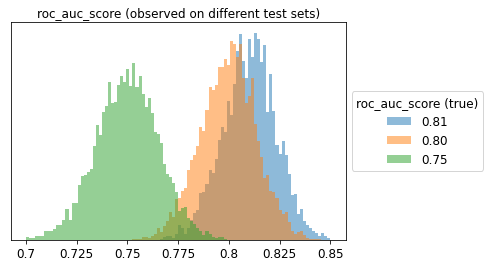

In [179]:
plt.rcParams['legend.title_fontsize'] = 12

fig, ax = plt.subplots()

for model in list(range(len(rocs_obs)))[::-1]:
    ax.hist(rocs_obs[model], bins=np.linspace(.7, .85, 101), alpha=0.5, label='{:.2f}'.format(rocs_true[model]))
    
ax.set_title('roc_auc_score (observed on different test sets)', fontsize=12)
ax.set_yticks([])
ax.set_xticks([.7, .725, .75, .775, .8, .825, .85])
ax.set_xticklabels([.7, .725, .75, .775, .8, .825, .85])
ax.xaxis.set_tick_params(labelsize=12)
ax.legend(title='roc_auc_score (true)', fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

#fig.savefig('three_hist.png', bbox_inches='tight', dpi=200)

(array([  0.,   0.,   0.,   1.,   1.,   0.,   1.,   2.,   2.,   2.,   1.,
          2.,   4.,   5.,   4.,  12.,   6.,   5.,  14.,  15.,  16.,  24.,
         16.,  24.,  35.,  31.,  27.,  50.,  45.,  49.,  49.,  59.,  66.,
         70.,  76.,  77.,  92.,  75.,  95., 112., 122., 115., 121., 117.,
        130., 140., 131., 150., 137., 132., 162., 148., 156., 149., 143.,
        160., 139., 124., 108., 116., 108., 134., 115.,  79.,  80.,  68.,
         67.,  54.,  33.,  63.,  38.,  39.,  38.,  42.,  27.,  16.,  24.,
         13.,  27.,  17.,  10.,   5.,   4.,   5.,   7.,   7.,   5.,   4.,
          2.,   1.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.]),
 array([0.75 , 0.751, 0.752, 0.753, 0.754, 0.755, 0.756, 0.757, 0.758,
        0.759, 0.76 , 0.761, 0.762, 0.763, 0.764, 0.765, 0.766, 0.767,
        0.768, 0.769, 0.77 , 0.771, 0.772, 0.773, 0.774, 0.775, 0.776,
        0.777, 0.778, 0.779, 0.78 , 0.781, 0.782, 0.783, 0.784, 0.785,
        0.786, 0.787, 0.788, 0.789

Text(0.5, 1.0, 'roc_auc_score (same model, different test sets)')

[]

95th percentile of distance between pairs of ROC: 0.03765362064073205


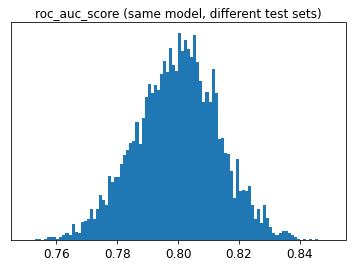

In [162]:
fig, ax = plt.subplots()
ax.hist(rocs_obs[1], bins=np.linspace(.75, .85, 101))
ax.set_title('roc_auc_score (same model, different test sets)', fontsize=12)
ax.set_yticks([])
ax.xaxis.set_tick_params(labelsize=12)
fig.savefig('single_hist.png', bbox_inches='tight', dpi=200)
print('95th percentile of distance between pairs of ROC:', distance_quantile(rocs_obs[1], .95))

In [165]:
len(rocs_obs[0])
len(rocs_obs[1])

5000

5000

## 파이썬으로 배우는 통계학
- https://partrita.github.io/posts/thinkstat2/

In [192]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

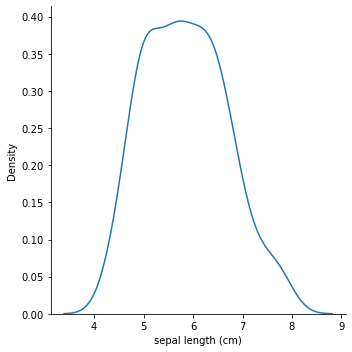

In [195]:
sns.displot(data, x="sepal length (cm)", kind='kde')

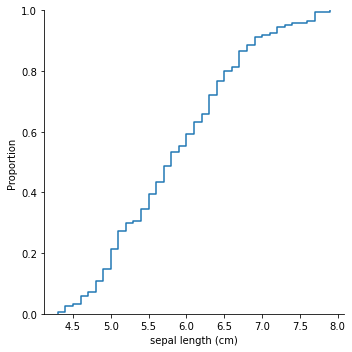

In [193]:
sns.displot(data, x="sepal length (cm)", kind="ecdf")

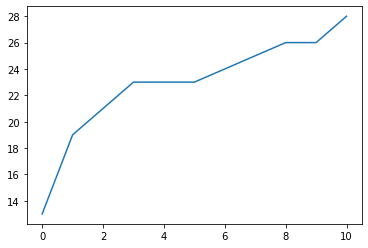

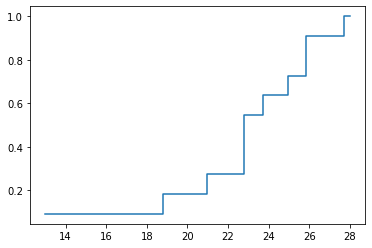

In [203]:
sample = np.array([13, 19, 21, 23, 23, 23, 24, 25, 26, 26, 28])
ecdf = ECDF(sample)
x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(sample); plt.show()
plt.step(x, y)

In [200]:
ecdf(x)

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.18181818, 0.18181818, 0.18181818, 0.18181818, 0.18181818,
       0.18181818, 0.18181818, 0.27272727, 0.27272727, 0.27272727,
       0.27272727, 0.27272727, 0.27272727, 0.54545455, 0.54545455,
       0.54545455, 0.63636364, 0.63636364, 0.63636364, 0.63636364,
       0.72727273, 0.72727273, 0.72727273, 0.90909091, 0.90909091,
       0.90909091, 0.90909091, 0.90909091, 0.90909091, 1.        ])

In [206]:
np.array(rocs_obs[1]).shape

(5000,)

In [208]:
a = np.array([[2, 3], [3, 5], [5, 8]])
b = np.array([[1, 0], [2, 1]])

pairwise_distances(a, b)
pairwise_distances(a, b, metric='manhattan')

array([[3.16227766, 2.        ],
       [5.38516481, 4.12310563],
       [8.94427191, 7.61577311]])

array([[ 4.,  2.],
       [ 7.,  5.],
       [12., 10.]])

<AxesSubplot:>

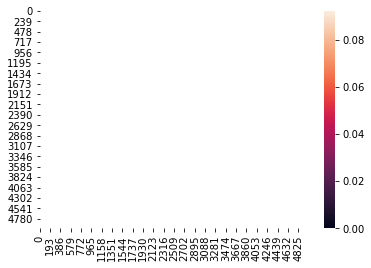

In [210]:
dist = pairwise_distances(np.array(rocs_obs[1]).reshape(-1,1))
sns.heatmap(dist)

In [221]:
a = np.arange(16).reshape(4, 4)
a
iu1 = np.triu_indices(4, k=2)
iu2 = np.triu_indices(4, 2)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [222]:
a[iu1]

array([2, 3, 7])

In [218]:
a[iu2]

array([2, 3, 7])

In [211]:
dist = dist[np.triu_indices(len(rocs_obs[1]), k=1)]
dist

array([0.01066192, 0.00073625, 0.00203433, ..., 0.00056195, 0.01818675,
       0.0176248 ])

Text(0.5, 1.0, 'ECDF')

Text(0.5, 0, 'distance between pairs of roc_auc_score')

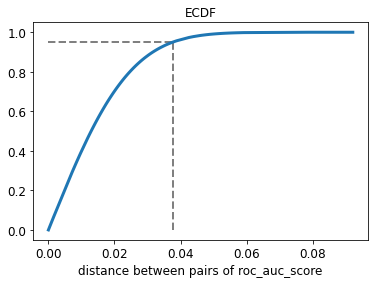

In [182]:
dist = dist[np.triu_indices(len(rocs_obs[1]), k=1)]
ecdf = ECDF(dist)

fig, ax = plt.subplots()
ax.hlines(.95, 0, np.quantile(dist,.95), ls="--", color="grey", lw = 2)
ax.vlines(np.quantile(dist,.95), 0, .95, ls="--", color="grey", lw = 2)
ax.plot(ecdf.x, ecdf.y, lw=3)
ax.set_title('ECDF', fontsize=12)
ax.set_xlabel('distance between pairs of roc_auc_score', fontsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#fig.savefig('ecdf.png', bbox_inches='tight', dpi=200)

0it [00:00, ?it/s]

(array([ 3.,  4.,  4.,  3.,  5., 10.,  3.,  5.,  6.,  5.,  8.,  5.,  7.,
         4.,  5.,  9.,  7.,  7.,  4.,  4., 12.,  4.,  7.,  6.,  5., 12.,
        11.,  7.,  7., 12., 17.,  4.,  8., 10.,  6., 10.,  5., 10., 10.,
        11.,  6., 14., 12., 13., 12.,  8., 10.,  9., 19., 12., 11.,  8.,
         9.,  6., 12., 15.,  8., 15., 15., 10.,  4., 11., 13.,  4., 12.,
        14.,  4.,  8.,  3.,  7., 12.,  7.,  8.,  6.,  8., 10., 13.,  9.,
         8.,  8., 10.,  7.,  7.,  5.,  9., 17.,  6.,  8.,  3.,  7., 10.,
         6.,  5.,  6.,  7.,  3.,  4.,  6.,  4.,  1.]),
 array([0.75 , 0.751, 0.752, 0.753, 0.754, 0.755, 0.756, 0.757, 0.758,
        0.759, 0.76 , 0.761, 0.762, 0.763, 0.764, 0.765, 0.766, 0.767,
        0.768, 0.769, 0.77 , 0.771, 0.772, 0.773, 0.774, 0.775, 0.776,
        0.777, 0.778, 0.779, 0.78 , 0.781, 0.782, 0.783, 0.784, 0.785,
        0.786, 0.787, 0.788, 0.789, 0.79 , 0.791, 0.792, 0.793, 0.794,
        0.795, 0.796, 0.797, 0.798, 0.799, 0.8  , 0.801, 0.802, 0.803,
        

No handles with labels found to put in legend.


[]

Text(0.5, 1.0, 'n: 1,000, prevalence: 0.01')

[]

1it [00:06,  6.23s/it]

True

(array([ 2.,  1.,  1.,  2.,  0.,  3.,  5.,  2.,  0.,  2.,  1.,  0.,  4.,
         6.,  3.,  7.,  4.,  4., 14.,  8.,  6.,  8., 10.,  6., 10., 10.,
         7., 13., 11.,  7.,  8., 14., 14.,  8., 16., 10., 16., 13., 21.,
        14., 20., 16., 21., 25., 12., 20., 28., 26., 16., 19., 30., 16.,
        17., 20., 29., 18., 16., 17., 17., 15., 14., 13., 16., 13., 21.,
        12., 13., 16., 16.,  9.,  7.,  9., 12.,  7.,  8., 21.,  7., 13.,
         6.,  5.,  5.,  5.,  4.,  3.,  4.,  2.,  7.,  5.,  4.,  4.,  5.,
         0.,  0.,  2.,  2.,  4.,  1.,  3.,  0.,  0.]),
 array([0.75 , 0.751, 0.752, 0.753, 0.754, 0.755, 0.756, 0.757, 0.758,
        0.759, 0.76 , 0.761, 0.762, 0.763, 0.764, 0.765, 0.766, 0.767,
        0.768, 0.769, 0.77 , 0.771, 0.772, 0.773, 0.774, 0.775, 0.776,
        0.777, 0.778, 0.779, 0.78 , 0.781, 0.782, 0.783, 0.784, 0.785,
        0.786, 0.787, 0.788, 0.789, 0.79 , 0.791, 0.792, 0.793, 0.794,
        0.795, 0.796, 0.797, 0.798, 0.799, 0.8  , 0.801, 0.802, 0.803,
        

No handles with labels found to put in legend.


[]

Text(0.5, 1.0, 'n: 1,000, prevalence: 0.05')

[]

2it [00:12,  6.53s/it]

True

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  2.,
         0.,  0.,  2.,  3.,  2.,  4.,  6.,  3.,  3.,  5.,  1.,  3.,  5.,
         8.,  6.,  3.,  8., 14.,  9.,  9., 10., 18., 22., 21., 15., 18.,
        17., 30., 21., 23., 28., 19., 23., 29., 33., 29., 26., 29., 38.,
        33., 21., 36., 21., 29., 33., 14., 18., 34., 22.,  9., 15., 23.,
        17., 17.,  9., 15., 22.,  8.,  5.,  8.,  7.,  9.,  2.,  8.,  6.,
         2.,  1.,  1.,  2.,  0.,  0.,  1.,  1.,  1.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([0.75 , 0.751, 0.752, 0.753, 0.754, 0.755, 0.756, 0.757, 0.758,
        0.759, 0.76 , 0.761, 0.762, 0.763, 0.764, 0.765, 0.766, 0.767,
        0.768, 0.769, 0.77 , 0.771, 0.772, 0.773, 0.774, 0.775, 0.776,
        0.777, 0.778, 0.779, 0.78 , 0.781, 0.782, 0.783, 0.784, 0.785,
        0.786, 0.787, 0.788, 0.789, 0.79 , 0.791, 0.792, 0.793, 0.794,
        0.795, 0.796, 0.797, 0.798, 0.799, 0.8  , 0.801, 0.802, 0.803,
        

No handles with labels found to put in legend.


[]

Text(0.5, 1.0, 'n: 1,000, prevalence: 0.20')

[]

3it [00:19,  6.42s/it]

True

(array([ 0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  2.,  1.,  2.,  1.,  4.,
         1.,  4.,  3.,  4.,  3.,  3.,  3.,  5.,  5.,  6., 12.,  8.,  7.,
        11., 13.,  8., 13., 13., 15., 13., 17., 13., 13., 12., 17., 17.,
        24., 24., 15., 25., 16., 25., 16., 25., 13., 23., 23., 19., 18.,
        22., 22., 25., 22., 18., 24., 24., 16., 21., 26., 13., 20., 22.,
        18., 21., 16., 17., 14., 15., 10., 14.,  2.,  5.,  5.,  6., 14.,
         5.,  7.,  8.,  3.,  3.,  4.,  2.,  4.,  1.,  0.,  0.,  1.,  2.,
         1.,  3.,  0.,  2.,  1.,  0.,  0.,  0.,  0.]),
 array([0.75 , 0.751, 0.752, 0.753, 0.754, 0.755, 0.756, 0.757, 0.758,
        0.759, 0.76 , 0.761, 0.762, 0.763, 0.764, 0.765, 0.766, 0.767,
        0.768, 0.769, 0.77 , 0.771, 0.772, 0.773, 0.774, 0.775, 0.776,
        0.777, 0.778, 0.779, 0.78 , 0.781, 0.782, 0.783, 0.784, 0.785,
        0.786, 0.787, 0.788, 0.789, 0.79 , 0.791, 0.792, 0.793, 0.794,
        0.795, 0.796, 0.797, 0.798, 0.799, 0.8  , 0.801, 0.802, 0.803,
        

No handles with labels found to put in legend.


[]

Text(0.5, 1.0, 'n: 5,000, prevalence: 0.01')

[]

4it [00:26,  6.63s/it]

True

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  2.,  2.,  0.,  3.,  5.,  5.,  7., 15., 14., 11., 21., 20.,
        20., 25., 28., 30., 32., 39., 47., 32., 45., 38., 35., 52., 45.,
        40., 49., 46., 41., 26., 36., 21., 28., 17., 22., 10., 20., 11.,
        20.,  3.,  8.,  6.,  5.,  8.,  1.,  2.,  3.,  1.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.75 , 0.751, 0.752, 0.753, 0.754, 0.755, 0.756, 0.757, 0.758,
        0.759, 0.76 , 0.761, 0.762, 0.763, 0.764, 0.765, 0.766, 0.767,
        0.768, 0.769, 0.77 , 0.771, 0.772, 0.773, 0.774, 0.775, 0.776,
        0.777, 0.778, 0.779, 0.78 , 0.781, 0.782, 0.783, 0.784, 0.785,
        0.786, 0.787, 0.788, 0.789, 0.79 , 0.791, 0.792, 0.793, 0.794,
        0.795, 0.796, 0.797, 0.798, 0.799, 0.8  , 0.801, 0.802, 0.803,
        

No handles with labels found to put in legend.


[]

Text(0.5, 1.0, 'n: 5,000, prevalence: 0.05')

[]

5it [00:33,  6.75s/it]

True

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,  2.,  4.,  9.,  5., 10.,
        26., 27., 16., 35., 42., 30., 45., 51., 63., 64., 62., 66., 73.,
        68., 50., 50., 48., 40., 27., 24., 14.,  8., 10., 11.,  4.,  3.,
         4.,  2.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.75 , 0.751, 0.752, 0.753, 0.754, 0.755, 0.756, 0.757, 0.758,
        0.759, 0.76 , 0.761, 0.762, 0.763, 0.764, 0.765, 0.766, 0.767,
        0.768, 0.769, 0.77 , 0.771, 0.772, 0.773, 0.774, 0.775, 0.776,
        0.777, 0.778, 0.779, 0.78 , 0.781, 0.782, 0.783, 0.784, 0.785,
        0.786, 0.787, 0.788, 0.789, 0.79 , 0.791, 0.792, 0.793, 0.794,
        0.795, 0.796, 0.797, 0.798, 0.799, 0.8  , 0.801, 0.802, 0.803,
        

No handles with labels found to put in legend.


[]

Text(0.5, 1.0, 'n: 5,000, prevalence: 0.20')

[]

6it [00:40,  6.82s/it]

True

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  1.,  1.,  1.,  0.,  5.,  1.,  3.,  2.,  1.,  3.,  3.,  1.,
         4.,  1.,  9.,  4., 11.,  7.,  8., 13., 19., 13., 20., 17., 19.,
        23., 27., 37., 23., 29., 33., 33., 39., 31., 38., 28., 37., 43.,
        39., 35., 30., 21., 25., 31., 29., 20., 23., 11., 13., 21., 15.,
        10.,  7., 11.,  9., 13.,  4.,  8., 10.,  6.,  5.,  2.,  1.,  1.,
         1.,  2.,  0.,  5.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.75 , 0.751, 0.752, 0.753, 0.754, 0.755, 0.756, 0.757, 0.758,
        0.759, 0.76 , 0.761, 0.762, 0.763, 0.764, 0.765, 0.766, 0.767,
        0.768, 0.769, 0.77 , 0.771, 0.772, 0.773, 0.774, 0.775, 0.776,
        0.777, 0.778, 0.779, 0.78 , 0.781, 0.782, 0.783, 0.784, 0.785,
        0.786, 0.787, 0.788, 0.789, 0.79 , 0.791, 0.792, 0.793, 0.794,
        0.795, 0.796, 0.797, 0.798, 0.799, 0.8  , 0.801, 0.802, 0.803,
        

No handles with labels found to put in legend.


[]

Text(0.5, 1.0, 'n: 10,000, prevalence: 0.01')

[Text(0.75, 0, '0.75'),
 Text(0.775, 0, '0.775'),
 Text(0.8, 0, '0.8'),
 Text(0.825, 0, '0.825'),
 Text(0.85, 0, '0.85')]

7it [00:47,  7.10s/it]

True

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,  2.,  4.,  5., 11.,
        17., 23., 29., 42., 41., 46., 43., 48., 66., 77., 68., 59., 61.,
        62., 47., 48., 38., 33., 30., 25., 20., 14.,  9.,  7., 12.,  2.,
         2.,  2.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.75 , 0.751, 0.752, 0.753, 0.754, 0.755, 0.756, 0.757, 0.758,
        0.759, 0.76 , 0.761, 0.762, 0.763, 0.764, 0.765, 0.766, 0.767,
        0.768, 0.769, 0.77 , 0.771, 0.772, 0.773, 0.774, 0.775, 0.776,
        0.777, 0.778, 0.779, 0.78 , 0.781, 0.782, 0.783, 0.784, 0.785,
        0.786, 0.787, 0.788, 0.789, 0.79 , 0.791, 0.792, 0.793, 0.794,
        0.795, 0.796, 0.797, 0.798, 0.799, 0.8  , 0.801, 0.802, 0.803,
        

No handles with labels found to put in legend.


[]

Text(0.5, 1.0, 'n: 10,000, prevalence: 0.05')

[Text(0.75, 0, '0.75'),
 Text(0.775, 0, '0.775'),
 Text(0.8, 0, '0.8'),
 Text(0.825, 0, '0.825'),
 Text(0.85, 0, '0.85')]

8it [00:55,  7.35s/it]

True

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   3.,   4.,   9.,  14.,  23.,  29.,
         43.,  62.,  57.,  95.,  80.,  83.,  87., 112.,  66.,  59.,  55.,
         42.,  26.,  22.,  14.,   3.,   3.,   4.,   1.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([0.75 , 0.751, 0.752, 0.753, 0.754, 0.755, 0.756, 0.757, 0.758,
        0.759, 0.76 , 0.761, 0.762, 0.763, 0.764, 0.765, 0.766, 0.767,
        0.768, 0.769, 0.77 , 0.771, 0.772, 0.773, 0.774, 0.775, 0.776,
        0.777, 0.778, 0.779, 0.78 , 0.781, 0.782, 0.783, 0.784, 0.785,
        0.786, 0.787, 0.788, 0.789

No handles with labels found to put in legend.


[]

Text(0.5, 1.0, 'n: 10,000, prevalence: 0.20')

[Text(0.75, 0, '0.75'),
 Text(0.775, 0, '0.775'),
 Text(0.8, 0, '0.8'),
 Text(0.825, 0, '0.825'),
 Text(0.85, 0, '0.85')]

9it [01:03,  7.51s/it]

True

10it [01:09,  7.13s/it]

True

11it [01:16,  6.86s/it]

True

12it [01:22,  6.70s/it]

True

13it [01:29,  6.80s/it]

True

14it [01:36,  6.84s/it]

True

15it [01:43,  6.85s/it]

True

16it [01:50,  7.08s/it]

True

17it [01:58,  7.26s/it]

True

18it [02:06,  7.44s/it]

True

19it [02:12,  7.11s/it]

True

20it [02:19,  6.91s/it]

True

21it [02:25,  6.82s/it]

True

22it [02:32,  6.87s/it]

True

23it [02:39,  6.89s/it]

True

24it [02:46,  6.88s/it]

True

25it [02:54,  7.09s/it]

True

26it [03:01,  7.27s/it]

True

27it [03:09,  7.38s/it]

True

27it [03:09,  7.02s/it]


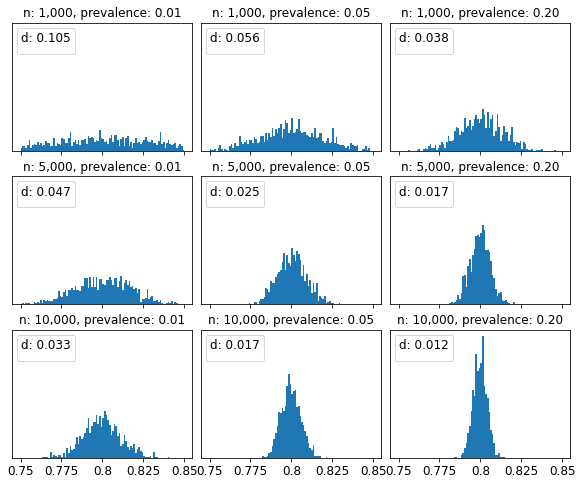

In [59]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10,8))
fig.subplots_adjust(wspace=.05)

out = pd.DataFrame(columns = ['roc', 'n', 'prevalence', 'dq'])

j = 0

with tqdm() as pbar:
  for roc_true in [.8, .7, .9]:
    y_universe, proba_universe = get_y_proba(n=100_000, prevalence=.5, roc=roc_true)
    for n in [1_000, 5_000, 10_000]:
      for prevalence in [.01, .05, .2]:
        rocs_sample = []
        n_ones = int(round(n * prevalence))
        n_zeros = n - n_ones
        for iter in range(1_000):
          index_zeros = np.random.choice(range(int(len(y_universe)/2)), n_zeros, replace=True)
          index_ones = np.random.choice(range(int(len(y_universe)/2), len(y_universe)), n_ones, replace=True)
          index = np.concatenate([index_zeros, index_ones])
          y_sample = y_universe[index]
          proba_sample = proba_universe[index]
          rocs_sample.append(roc_auc_score(y_sample, proba_sample))
        dq = distance_quantile(rocs_sample, .95)
        out.loc[j, :] = [roc_true, n, prevalence, dq]
        
        if roc_true == .8:
          axs[divmod(j, 3)].hist(rocs_sample, bins=np.linspace(.75,.85,101))
          axs[divmod(j, 3)].legend(title=f'd: {round(dq,3)}',loc='upper left') #, label=
          axs[divmod(j, 3)].set_yticks([])
          axs[divmod(j, 3)].set_title(f'n: {"{:,}".format(n)}, prevalence: {"{:.2f}".format(prevalence)}', fontsize=12)
          axs[divmod(j, 3)].xaxis.set_tick_params(labelsize=12)
          axs[divmod(j, 3)].set_xticks([.75, .775, .8, .825, .85])
          axs[divmod(j, 3)].set_xticklabels([.75, .775, .8, .825, .85])

        j += 1
        pbar.update(1)
    
#fig.savefig('nine_hist.png', bbox_inches='tight', dpi=200)
        
out = out.astype(float)

In [60]:
out.columns = ['roc', 'n', 'prevalence', 'd']
out.head()

roc       n  prevalence         d
0  0.8  1000.0        0.01  0.104646
1  0.8  1000.0        0.05  0.056379
2  0.8  1000.0        0.20  0.037625
3  0.8  5000.0        0.01  0.046923
4  0.8  5000.0        0.05  0.024547

In [61]:
pcorr = pd.DataFrame()

for var in ['roc', 'n', 'prevalence']:
  y_covar = sorted(set(['roc', 'n', 'prevalence']) - set([var]))
  pcorr_part = pg.partial_corr(data=out, x='roc', y='dq', y_covar=y_covar)
  pcorr_part.index = [var]
  pcorr = pd.concat([pcorr, pcorr_part])
    
pcorr

NameError: name 'pg' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(10,3))
ax.scatter(np.linspace(0,1,20), [1]*20, color='blue')
ax.scatter(np.linspace(.6,1,20), [0]*20, color='red')
ax.text(.8,0.3,'positives (evenly spaced between α and 1)', ha='center', va='center', fontsize=14)
ax.text(.5,1.3,'negatives (evenly spaced between 0 and 1)', ha='center', va='center', fontsize=14)
ax.set_ylim(-1,2)
ax.set_xlim(-.05,1.15)
ax.set_yticks([])
ax.xaxis.set_tick_params(labelsize=14)

#fig.savefig('y_proba_from_roc.png', bbox_inches='tight', dpi=200)

# Why You Should Use Scikit-Learn Pipelines

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# prepare training and testing sets
data = load_breast_cancer()
X, y = data['data'], data['target']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

## 1. Training the model without a pipeline

In [8]:
# perform scaling
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

# perform pca
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# train model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# generate predictions
y_pred = rfc.predict(X_test)

RandomForestClassifier(random_state=42)

In [9]:
score = f1_score(y_true=y_test, y_pred=y_pred)
print(f'F1-score: {score}')

F1-score: 0.9662921348314607


## 2. Training the model with a pipeline

In [10]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[('scaler', MinMaxScaler()),
                   ('pca', PCA(n_components=2)),
                   ('model', RandomForestClassifier(random_state=42))])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=2)),
                ('model', RandomForestClassifier(random_state=42))])

In [11]:
score = f1_score(y_true=y_test, y_pred=y_pred)
print(f'F1-score: {score}')

F1-score: 0.9662921348314607


## 3. Bonus: Optimizing the model with a pipeline

In [15]:
pipeline = Pipeline(steps=[('scaler', MinMaxScaler()),
                   ('pca', PCA(n_components=2)),
                   ('model', RandomForestClassifier(random_state=42))])

param_grid = {
    'pca__n_components':[2, 5],
    'model__n_estimators': [100, 1000]
}

In [16]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(pipeline,
                 param_grid=param_grid,
                cv=3,
                scoring='f1_micro',
                n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__n_estimators': [100, 1000],
                         'pca__n_components': [2, 5]},
             scoring='f1_micro')

In [17]:
model = gs.best_estimator_
y_pred = model.predict(X_test)
score = f1_score(y_pred=y_pred, y_true=y_test)
print(f'F1-score: {score}')

F1-score: 0.9662921348314607


# Variable Discretization in Machine Learning
### What is discretization?
In discretization, we convert continuous variables into discrete features by producing a collection of contiguous intervals that span the entire variable value range. These discrete values are then handled as categorical data.

The challenge in discretization is identifying the thresholds or limits that define the intervals into which the continuous values will be sorted. To this end, there are various discretization methods that we can use, each with advantages and shortcomings.

In [22]:
! pip install feature_engine

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from feature_engine.discretisation import EqualWidthDiscretiser

In [24]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

## 1. Equal–width discretization
Equal-width discretization consists of dividing the range of continuous values into k equally sized intervals.

In [26]:
variables = ['MedInc', 'HouseAge', 'AveRooms']
disc = EqualWidthDiscretiser(bins=8, variables=variables, return_boundaries=True)
disc.fit(X_train)
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

EqualWidthDiscretiser(bins=8, return_boundaries=True,
                      variables=['MedInc', 'HouseAge', 'AveRooms'])

In [29]:
test_t['MedInc'].value_counts()

(2.312, 4.125]      2757
(4.125, 5.937]      1508
(-inf, 2.312]       1182
(5.937, 7.75]        491
(7.75, 9.563]        145
(9.563, 11.375]       68
(13.188, inf]         29
(11.375, 13.188]      12
Name: MedInc, dtype: int64

## 2. Equal-frequency discretization
Equal-frequency discretization sorts the continuous variable into intervals with the same number of observations. 

In [31]:
from sklearn.preprocessing import KBinsDiscretizer
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
disc.fit(X_train[variables])
train_t = X_train.copy()
test_t = X_test.copy()
train_t[variables] = disc.transform(X_train[variables])
test_t[variables] = disc.transform(X_test[variables])

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [35]:
X_test.head()
test_t.head()
test_t['MedInc'].value_counts()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14740  4.1518      22.0  5.663073   1.075472      1551.0  4.180593     32.58   
10101  5.7796      32.0  6.107226   0.927739      1296.0  3.020979     33.92   
20566  4.3487      29.0  5.930712   1.026217      1554.0  2.910112     38.65   
2670   2.4511      37.0  4.992958   1.316901       390.0  2.746479     33.20   
15709  5.0049      25.0  4.319261   1.039578       649.0  1.712401     37.79   

       Longitude  
14740    -117.05  
10101    -117.97  
20566    -121.84  
2670     -115.60  
15709    -122.43

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14740     6.0       3.0       6.0   1.075472      1551.0  4.180593     32.58   
10101     8.0       5.0       7.0   0.927739      1296.0  3.020979     33.92   
20566     6.0       5.0       7.0   1.026217      1554.0  2.910112     38.65   
2670      2.0       7.0       4.0   1.316901       390.0  2.746479     33.20   
15709     7.0       4.0       2.0   1.039578       649.0  1.712401     37.79   

       Longitude  
14740    -117.05  
10101    -117.97  
20566    -121.84  
2670     -115.60  
15709    -122.43

4.0    648
9.0    647
0.0    646
7.0    645
3.0    613
2.0    611
5.0    604
8.0    602
1.0    600
6.0    576
Name: MedInc, dtype: int64

## Gibbs sampling
깁스 샘플 수를 늘려서 결합확률분포 direct_sample로부터 뽑은 결과와 비교하면 유사한 결과가 나오는걸 확인할 수 있습니다. 다시 말해 결합확률분포를 모를 때, 이미 알고 있는 일부 조건부 확률분포에 깁스 샘플링을 적용하여 해당 결합확률분포의 표본을 얻어낼 수 있다는 것입니다.

## 1. Direct_sample

In [2]:
import random

def roll_a_die():
    # 주사위 눈은 1~6
    # 각 눈이 선택될 확률은 동일(uniform)
    return random.choice(range(1,7))

def direct_sample():
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1+d2

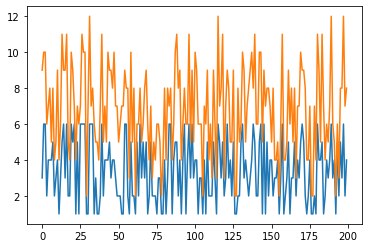

In [60]:
num_iters =200
trials = []
for _ in range(num_iters):
    trials.append(direct_sample())

plt.plot(trials)

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y= x+x2'}>]], dtype=object)

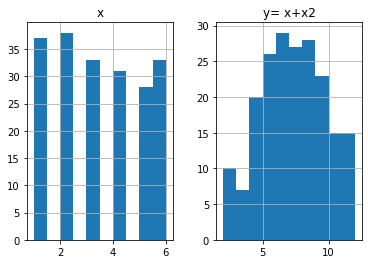

In [61]:
data = pd.DataFrame(trials, columns=['x', 'y= x+x2'])
data.hist()

## 2. 조건부 확률분포

In [62]:
def random_y_given_x(x):
    # x값을 알고 있다는 전제 하에
    # y값이 선택될 확률
    # y는 x+1, x+2, x+3
    # x+4, x+5, x+6 가운데 하나
    return x + roll_a_die()

def random_x_given_y(y):
    # y값을 알고 있다는 전제 하에
    # x값이 선택될 확률
    # 첫째 둘째 주사위 값의 합이 7이거나
    # 7보다 작다면
    if y <= 7:
        # 첫번째 주사위의 눈은 1~6
        # 각 눈이 선택될 확률은 동일
        return random.randrange(1, y)
    # 만약 총합이 7보다 크다면
    else:
        # 첫번째 주사위의 눈은
        # y-6, y-5,..., 6
        # 각 눈이 선택될 확률은 동일
        return random.randrange(y-6, 7)

In [63]:
def gibbs_sample(num_iters=100):
    # 초기값이 무엇이든 상관없음
    x, y = 1, 2
    for _ in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)
    return x, y

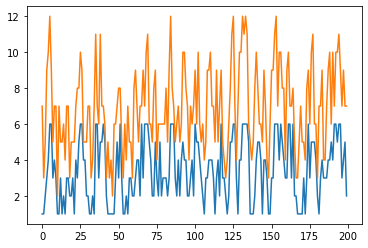

In [65]:
num_iters =200
x, y = 1, 2
trials = []
for _ in range(num_iters):
    x = random_x_given_y(y)
    y = random_y_given_x(x)
    trials.append([x,y])

plt.plot(trials)

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y= x+x2'}>]], dtype=object)

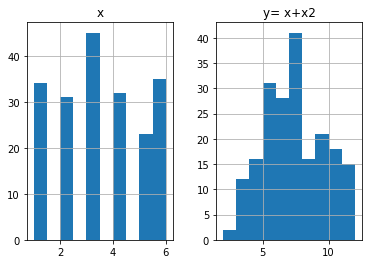

In [66]:
data = pd.DataFrame(trials, columns=['x', 'y= x+x2'])
data.hist()

### BBN: Bayesian Belief Networks — How to Build Them Effectively in Python
- https://towardsdatascience.com/bbn-bayesian-belief-networks-how-to-build-them-effectively-in-python-6b7f93435bba
- https://py-bbn.readthedocs.io/index.html

## Introduction to PyMC3: A Python package for probabilistic programming
https://towardsdatascience.com/introduction-to-pymc3-a-python-package-for-probabilistic-programming-5299278b428

In [12]:
# Our integral approximation function
def integral_approximation(f, a, b):
    return (b-a)*np.mean(f)

# Integrate f(x) = x^2
def f1(x):
    return x**2 - x**3

# Define bounds of integral
a = 0
b = 1

# Generate function values
x_range = np.arange(a,b+0.0001,.0001)
fx = f1(x_range)

# Approximate integral
approx = integral_approximation(fx,a,b)
approx

3* approx


0.08332499999999998

0.24997499999999995

In [13]:
# Scipy approximation
import scipy.integrate as integrate
integrate.quad(f1,a,b)

(0.08333333333333334, 9.251858538542972e-16)

In [ ]:
integrate.quad()

In [18]:
x = np.linspace(0,1, 100)
y = 12*x**2 - 12*x**3

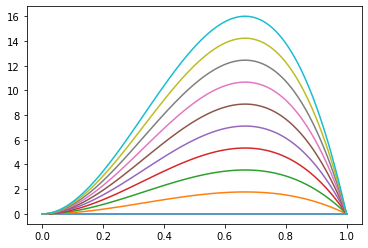

In [34]:
for i in np.arange(0, 10):
    ax = plt.plot(x, y*i)

In [3]:
x_beta_binomial = np.array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [7]:
#blue, green, red, purple, gold, teal = sns.color_palette()
SEED = 69972 # from random.org, for reproducibility
np.random.seed(SEED)


import pymc3 as pm

with pm.Model() as beta_binomial_model:
    p_beta_binomial = pm.Uniform('p', 0., 1.)

with beta_binomial_model:
    x_obs = pm.Bernoulli('y', p_beta_binomial,
                         observed=x_beta_binomial)

# plot the true beta-binomial posterior distribution
fig, ax = plt.subplots()

prior = sp.stats.uniform(0, 1)
posterior = sp.stats.beta(1 + x_beta_binomial.sum(), 1 + (1 - x_beta_binomial).sum())

plot_x = np.linspace(0, 1, 100)
ax.plot(plot_x, prior.pdf(plot_x),
        '--', c='k', label='Prior');

ax.plot(plot_x, posterior.pdf(plot_x),
        c=blue, label='Posterior');

ax.set_xticks(np.linspace(0, 1, 5));
ax.set_xlabel(r'p');

ax.set_yticklabels([]);

ax.legend(loc=1);


ModuleNotFoundError: No module named 'pymc3'

In [8]:
! pip install pymc3

  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529958 sha256=fbcd592aa612bb5a930bed3c438bb07d1676a83dea7ebcc5436a9ab2bafea5a4
  Stored in directory: c:\users\nfsi291\appdata\local\pip\cache\wheels\0e\41\d2\82c7b771236f987def7fe2e51855cce22b270327f3fedec57c
Successfully built theano-pymc
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.2
    Uninstalling numpy-1.22.2:


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy-1.22.2.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.



In [87]:
path = r'D:\deep learning\data'
import glob
glob.glob(path + './*')

['D:\\deep learning\\data.\\daily-minimum-temperatures.csv',
 'D:\\deep learning\\data.\\netflix-signups.csv',
 'D:\\deep learning\\data.\\test.csv',
 'D:\\deep learning\\data.\\train.csv',
 'D:\\deep learning\\data.\\weatherAUS.csv',
 'D:\\deep learning\\data.\\거래내역조회20220704 (1).xls',
 'D:\\deep learning\\data.\\거래내역조회20220704 (2).xls',
 'D:\\deep learning\\data.\\거래내역조회20220704 (3).xls',
 'D:\\deep learning\\data.\\거래내역조회20220704 (4).xls',
 'D:\\deep learning\\data.\\거래내역조회20220704 (5).xls',
 'D:\\deep learning\\data.\\거래내역조회20220704 (6).xls',
 'D:\\deep learning\\data.\\거래내역조회20220704 (7).xls',
 'D:\\deep learning\\data.\\거래내역조회20220704.xls',
 'D:\\deep learning\\data.\\입금내역.xlsx']

In [88]:
list = ['D:\\deep learning\\data.\\거래내역조회20220704 (6).xls',
 'D:\\deep learning\\data.\\거래내역조회20220704 (7).xls',]

In [89]:
df = pd.DataFrame()
for file in list :
    data = pd.read_excel(file, skiprows=3)
    data.shape
    df = df.append(data)

(362, 9)

(398, 9)

In [90]:
df.shape

(760, 9)

In [92]:
df = df[df['기재내용'] != 'AMA 입금스윙']
df = df[df['기재내용'] != '신한이수정']
df = df[df['기재내용'] != '신한 이수정']

df = df[df['적요'] != 'AUTOSWNG']

df = df[df['적요'] != '타행자동']


df = df[df['적요'] != 'BACKSWNG']

df = df[df['적요'] != '예금결산']



In [95]:
df = df.sort_values('거래일시')
df

No.              거래일시    적요              기재내용   찾으신금액   맡기신금액   거래후 잔액  \
397  398  2015.01.03 13:59  타행ＣＤ  4902208199341728  300700       0   636471   
396  397  2015.01.05 11:47  ＣＤ지급     #208980001146   50000       0   586471   
395  396  2015.01.06 12:10   펌뱅킹            단대천안산단       0  250000   836471   
394  395  2015.01.07 10:08  ＣＤ이체         한택진    국민   50000       0   786471   
393  394  2015.01.07 17:06   펌뱅킹            미래에셋생명  100000       0   686471   
..   ...               ...   ...               ...     ...     ...      ...   
4      5  2016.12.27 20:42  타행대량              연구수당       0  597975 -3618257   
3      4  2016.12.28 11:46  ＣＤ이체         조근하    국민  550000       0 -4168257   
2      3  2016.12.29 11:26  ＣＤ지급     #203790001132   30000       0 -4198257   
1      2  2016.12.31 09:24  타행대량      12 월 - 중간물류추       0   73700 -4124557   
0      1  2016.12.31 09:25  타행대량       12 월 - 중간물류       0  245280 -3879277   

          취급점  메모  
397      신한은행 NaN  
396     원남동지점 NaN  
395     지역농축협 NaN  
394     원남동지점 NaN  
393  분당중앙금융센터 NaN  
..        ...  ..  
4        기업은행 NaN  
3       원남동지점 NaN  
2      강동구청지점 NaN  
1        기업은행 NaN  
0        기업은행 NaN  

[621 rows x 9 columns]

In [96]:
df['출금액'] = df.apply(lambda x: "{:,}".format(x['찾으신금액']), axis=1)
df['입금액'] = df.apply(lambda x: "{:,}".format(x['맡기신금액']), axis=1)

In [97]:
df = df.fillna('missing')
df.to_excel(path + './입금내역.xlsx')

In [63]:
df['거래일시'].min()

'2015.01.03 13:59'

In [64]:
df = df[df['기재내용'] != 'AMA 입금스윙']
df = df[df['기재내용'] != '신한이수정']
df = df[df['기재내용'] != '신한 이수정']

df = df[df['적요'] != 'AUTOSWNG']

df = df[df['적요'] != '타행자동']

In [50]:
pd.set_option("display.precision", 3)

In [72]:
df['출금액'] = df.apply(lambda x: "{:,}".format(x['찾으신금액']), axis=1)
pd.options.display.float_format = '{:,}'.format

In [73]:
df.columns

Index(['No.', '거래일시', '적요', '기재내용', '찾으신금액', '맡기신금액', '거래후 잔액', '취급점', '메모',
       '입금액', '출금액'],
      dtype='object')

In [70]:
df[df['찾으신금액'] > 2000000].sort_values('거래일시').round(decimals=3)

No.              거래일시      적요       기재내용      찾으신금액  맡기신금액     거래후 잔액  \
268  269  2015.01.26 17:38  F/B 출금       현대카드   35910000      0   -2924050   
267  268  2015.01.27 17:05      카드  우리카드결제-00    2655026      0   -5579076   
263  264  2015.02.10 14:27    대체지급      국민이수정  240000000      0   -6089076   
247  248  2015.02.25 21:46     인터넷      신한등록금    2514000      0   -2546719   
245  246  2015.02.25 21:50     인터넷      국민이수정    2500000      0   -7646719   
239  240  2015.03.02 13:11    대체지급    missing   50000000      0     192594   
235  236  2015.03.17 14:30     인터넷      국민이수정   50000000      0  353554881   
234  235  2015.03.17 14:31     인터넷      국민이수정   50000000      0  303554881   
231  232  2015.03.18 22:48     인터넷      국민조상구   25000000      0     499300   
230  231  2015.03.18 23:14     인터넷      삼성조상구   50000000      0     499300   
229  230  2015.03.18 23:46     인터넷        조정택    4940000      0   45559300   
226  227  2015.03.19 14:47    대체지급    missing   49000000      0     109300   
225  226  2015.03.20 13:20     인터넷      국민조상구   49055000      0     213900   
224  225  2015.03.20 13:24     인터넷      국민조상구   49000000      0     213900   
212  213  2015.03.30 11:14     인터넷      대신조상구   50000000      0     902677   
211  212  2015.03.30 11:16     인터넷      대신조상구   50000000      0     902677   
113  114  2015.08.13 17:03     인터넷      국민이수정   15000000      0     880000   
112  113  2015.08.13 17:09     인터넷       추가입금    2700000      0     180000   
106  107  2015.08.21 09:01     인터넷   신한한양대등로금    2514000      0     820024   
96    97  2015.08.25 11:03     모바일    하나원일계약금   17300000      0     252974   
88    89  2015.09.07 19:25     인터넷     삼성삼성증권   10000000      0   -4874377   
63    64  2015.10.08 13:51     모바일      하나김태진   41000000      0   -6782641   
44    45  2015.10.26 17:27  F/B 출금       현대카드    2094260      0   -7814515   
204  205  2016.03.30 15:39    대체지급    농협농협황철하   50000000      0   -7329282   
200  201  2016.04.05 14:00    대체지급    missing   50000000      0   -7479282   
167  168  2016.05.25 17:29  F/B 출금       현대카드    2251390      0    3849829   
111  112  2016.07.27 17:05      카드  우리카드결제-00    2041098      0   -2067007   
64    65  2016.09.27 17:05      카드  우리카드결제-00    2392653      0   -3753274   
256  257  2017.01.17 13:02    대체지급        최종수   58000000      0     100000   
237  238  2017.02.08 09:18     모바일       국민백석    4040000      0     413270   
213  214  2017.03.03 10:51    대체지급    missing  540000000      0     500000   
212  213  2017.03.03 11:20    현금지급    missing    3650000      0     850000   
173  174  2017.04.25 17:26  F/B 출금       현대카드    2066370      0     964928   
153  154  2017.05.24 11:21     모바일    하나한신중도금   50000000      0          0   
152  153  2017.05.24 11:23     모바일    하나한신중도금   38000000      0   -4940806   
141  142  2017.05.31 13:19     모바일      상호SBI   50000000      0   29000000   
140  141  2017.05.31 13:20     모바일      상호조상구   48000000      0          0   
98    99  2017.07.28 15:09     모바일      신한문태선    2548140      0   96595402   
97    98  2017.07.28 15:47     모바일      하나박정은    8800000      0  352253467   
93    94  2017.07.31 11:30    대체지급    missing  700000000      0     930000   
91    92  2017.07.31 12:45     모바일      국민유승석   43779600      0     970400   
90    91  2017.07.31 13:27     모바일      신한박형순    9500000      0     470400   
85    86  2017.08.10 14:36    대체지급    신한신한이명승  100000000      0          0   
76    77  2017.08.24 07:00     모바일  농협LEEDOND   30000000      0     802600   
75    76  2017.08.24 21:03     모바일  농협LEEDOND   10000000      0     802600   
71    72  2017.08.25 17:26     모바일  농협LEEDOND   30000000      0     213610   
67    68  2017.08.26 18:35     모바일  농협LEEDOND   30000000      0   -8945930   
164  165  2018.05.24 15:11     인터넷      국민증여세    9000000      0   -7814758   
130  131  2018.06.26 17:21     인터넷      신한재산세    3500000      0   -8332348   
122  123  2018.07.20 13:06     인터넷  농협구리화장실공사    2600000      0   -8960267   
59    60  2018.10.18 14:21 

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 273
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No.     903 non-null    int64 
 1   거래일시    903 non-null    object
 2   적요      903 non-null    object
 3   기재내용    903 non-null    object
 4   찾으신금액   903 non-null    int64 
 5   맡기신금액   903 non-null    int64 
 6   거래후 잔액  903 non-null    int64 
 7   취급점     903 non-null    object
 8   메모      903 non-null    object
 9   입금액     903 non-null    object
 10  출금액     903 non-null    object
dtypes: int64(4), object(7)
memory usage: 84.7+ KB


In [19]:
df[df['기재내용'].str.contains('조상')]

No.              거래일시   적요   기재내용     찾으신금액  맡기신금액   거래후 잔액       취급점  \
140  141  2017.05.31 13:20  모바일  상호조상구  48000000      0        0  분당중앙금융센터   
215  216  2018.03.05 09:10  인터넷  신한조상구   1200000      0 -7394996  분당중앙금융센터   
211  212  2015.03.30 11:16  인터넷  대신조상구  50000000      0   902677  분당중앙금융센터   
212  213  2015.03.30 11:14  인터넷  대신조상구  50000000      0   902677  분당중앙금융센터   
224  225  2015.03.20 13:24  인터넷  국민조상구  49000000      0   213900  분당중앙금융센터   
225  226  2015.03.20 13:20  인터넷  국민조상구  49055000      0   213900  분당중앙금융센터   
230  231  2015.03.18 23:14  인터넷  삼성조상구  50000000      0   499300  분당중앙금융센터   
231  232  2015.03.18 22:48  인터넷  국민조상구  25000000      0   499300  분당중앙금융센터   
238  239  2015.03.03 16:51  인터넷  국민조상구    200000      0    -7406  분당중앙금융센터   

          메모  
140  missing  
215  missing  
211  missing  
212  missing  
224  missing  
225  missing  
230  missing  
231  missing  
238  missing

### Bayesian network- Wikipedia
<img src= 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/SimpleBayesNet.svg/600px-SimpleBayesNet.svg.png'>

In [4]:
! pip install pybbn

  Created wheel for pybbn: filename=pybbn-3.2.1-py3-none-any.whl size=39725 sha256=8c3576708dbaab1a798efb01f75f2bc5b93b62ebcca4639ecfe93b44dbf1865b
  Stored in directory: c:\users\nfsi291\appdata\local\pip\cache\wheels\06\80\2f\0e63fe5497b2917af3b7bdcbb142985ba4e5e5ef9a2c0b14b9
Successfully built pybbn


In [5]:
import pandas as pd # for data manipulation 
import networkx as nx # for drawing graphs
import matplotlib.pyplot as plt # for drawing graphs

# for creating Bayesian Belief Networks (BBN)
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

In [12]:
# Set Pandas options to display more columns
pd.options.display.max_columns=50

# Read in the weather data csv
df=pd.read_csv('./data/weatherAUS.csv') # , encoding='utf-8')

# Drop records where target RainTomorrow=NaN
df=df[pd.isnull(df['RainTomorrow'])==False]

# For other columns with missing values, fill them in with column mean
df=df.fillna(df.mean())

# Create bands for variables that we want to use in the model
df['WindGustSpeedCat']=df['WindGustSpeed'].apply(lambda x: '0.<=40'   if x<=40 else
                                                            '1.40-50' if 40<x<=50 else '2.>50')
df['Humidity9amCat']=df['Humidity9am'].apply(lambda x: '1.>60' if x>60 else '0.<=60')
df['Humidity3pmCat']=df['Humidity3pm'].apply(lambda x: '1.>60' if x>60 else '0.<=60')

# Show a snaphsot of data
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6     5.469824   
1       2008-12-02   Albury      7.4     25.1       0.0     5.469824   
2       2008-12-03   Albury     12.9     25.7       0.0     5.469824   
3       2008-12-04   Albury      9.2     28.0       0.0     5.469824   
4       2008-12-05   Albury     17.5     32.3       1.0     5.469824   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0     5.469824   
145455  2017-06-21    Uluru      2.8     23.4       0.0     5.469824   
145456  2017-06-22    Uluru      3.6     25.3       0.0     5.469824   
145457  2017-06-23    Uluru      5.4     26.9       0.0     5.469824   
145458  2017-06-24    Uluru      7.8     27.0       0.0     5.469824   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0       7.624853           W           44.0          W        WNW   
1       7.624853         WNW           44.0        NNW        WSW   
2       7.624853         WSW           46.0          W        WSW   
3       7.624853          NE           24.0         SE          E   
4       7.624853           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145454  7.624853           E           31.0        ESE          E   
145455  7.624853           E           31.0         SE        ENE   
145456  7.624853         NNW           22.0         SE          N   
145457  7.624853           N           37.0         SE        WNW   
145458  7.624853          SE           28.0        SSE          N   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145454          15.0          13.0         59.0         27.0       1024.7   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1  8.000000  4.503167     16.9     21.8        No   
1            1007.8  4.437189  4.503167     17.2     24.3        No   
2            1008.7  4.437189  2.000000     21.0     23.2        No   
3            1012.8  4.437189  4.503167     18.1     26.5        No   
4            1006.0  7.000000  8.000000     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145454       1021.2  4.437189  4.503167      9.4     20.9        No   
145455       1020.3  4.437189  4.503167     10.1     22.4        No   
145456       1019.1  4.437189  4.503167     10.9     24.5        No   
145457       1016.8  4.437189  4.503167     12.5     26.1        No   
145458       1016.5  3.000000  2.000000     15.1     26.0        No   

       RainTomorrow WindGustSpeedCat Humidity9amCat Humidity3pmCat  
0                No          1.40-50          1.>60         0.<=60  
1                No          1.40-50         0.<=60         0.<=60  
2                No          1.40-50         0.<=60         0.<=60  
3                No           0.<=40         0.<=60         0.<=60  
4                No          1.40-50          1.>60         0.<=60  
...             ...              ...            ...            ...  
145454           No           0.<=40         0.<=60        

In [15]:
df['Humidity9amCat'].value_counts(normalize=True).sort_index()

0.<=60    0.306583
1.>60     0.693417
Name: Humidity9amCat, dtype: float64

## Bayesian Belief Networks (BBN) and Directed Acyclic Graphs (DAG)
<img src = 'https://miro.medium.com/max/875/1*bDfiBVnFaPeQzumj1mZN0w.png' width=300 height=300>
<img src='https://miro.medium.com/max/875/1*rzutIc-oHgiOc4pIsYU6HQ.png'>

In [16]:
# This function helps to calculate probability distribution, which goes into BBN (note, can handle up to 2 parents)
def probs(data, child, parent1=None, parent2=None):
    if parent1==None:
        # Calculate probabilities
        prob=pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
    elif parent1!=None:
            # Check if child node has 1 parent or 2 parents
            if parent2==None:
                # Caclucate probabilities
                prob=pd.crosstab(data[parent1],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
            else:    
                # Caclucate probabilities
                prob=pd.crosstab([data[parent1],data[parent2]],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else: print("Error in Probability Frequency Calculations")
    return prob  

In [24]:
probs(df, child='Humidity9amCat')
probs(df, child='Humidity3pmCat', parent1='Humidity9amCat')
probs(df, child='WindGustSpeedCat')
probs(df, child='RainTomorrow', parent1='Humidity3pmCat', parent2='WindGustSpeedCat')

[0.30658330578861126, 0.6934166942113887]

[0.928269945405331, 0.071730054594669, 0.5576020040771205, 0.44239799592287954]

[0.5865970898708094, 0.24039861315254618, 0.1730042969766444]

[0.9231423408100351,
 0.07685765918996491,
 0.8907156673114119,
 0.109284332688588,
 0.7600840888188148,
 0.23991591118118513,
 0.6425022248590923,
 0.35749777514090775,
 0.4916834919719258,
 0.5083165080280743,
 0.3218170185540627,
 0.6781829814459372]

In [21]:
# Create nodes by manually typing in probabilities
H9am = BbnNode(Variable(0, 'H9am', ['<=60', '>60']), [0.30658, 0.69342])
H3pm = BbnNode(Variable(1, 'H3pm', ['<=60', '>60']), [0.92827, 0.07173, 0.55760, 0.44240])
W = BbnNode(Variable(2, 'W', ['<=40', '40-50', '>50']), [0.58660, 0.24040, 0.17300])
RT = BbnNode(Variable(3, 'RT', ['No', 'Yes']), [0.92314, 0.07686, 
                                                0.89072, 0.10928, 
                                                0.76008, 0.23992, 
                                                0.64250, 0.35750, 
                                                0.49168, 0.50832, 
                                                0.32182, 0.67818])

In [22]:
# Create nodes by using our earlier function to automatically calculate probabilities
H9am = BbnNode(Variable(0, 'H9am', ['<=60', '>60']), probs(df, child='Humidity9amCat'))
H3pm = BbnNode(Variable(1, 'H3pm', ['<=60', '>60']), probs(df, child='Humidity3pmCat', parent1='Humidity9amCat'))
W = BbnNode(Variable(2, 'W', ['<=40', '40-50', '>50']), probs(df, child='WindGustSpeedCat'))
RT = BbnNode(Variable(3, 'RT', ['No', 'Yes']), probs(df, child='RainTomorrow', parent1='Humidity3pmCat', parent2='WindGustSpeedCat'))

In [25]:
# Create Network
bbn = Bbn() \
    .add_node(H9am) \
    .add_node(H3pm) \
    .add_node(W) \
    .add_node(RT) \
    .add_edge(Edge(H9am, H3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(H3pm, RT, EdgeType.DIRECTED)) \
    .add_edge(Edge(W, RT, EdgeType.DIRECTED))

# Convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)

(-1.32, 1.32, -1.48, 2.48)

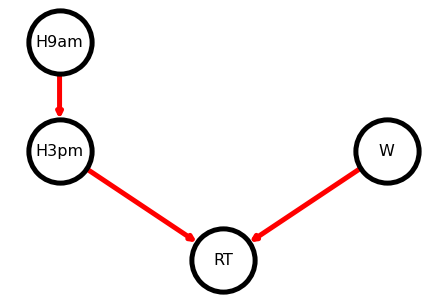

In [27]:
# Set node positions
pos = {0: (-1, 2), 1: (-1, 0.5), 2: (1, 0.5), 3: (0, -1)}

# Set options for graph looks
options = {
    "font_size": 16,
    "node_size": 4000,
    "node_color": "white",
    "edgecolors": "black",
    "edge_color": "red",
    "linewidths": 5,
    "width": 5,}
    
# Generate graph
n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, pos=pos, **options)

# Update margins and print the graph
ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()

# Using BBN for predictions

In [28]:
# Define a function for printing marginal probabilities
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)
        print("Node:", node)
        print("Values:")
        print(potential)
        print('----------------')
        
# Use the above function to print marginal probabilities
print_probs()

Node: 1|H3pm|<=60,>60
Values:
1=<=60|0.67124
1=>60|0.32876
----------------
Node: 0|H9am|<=60,>60
Values:
0=<=60|0.30658
0=>60|0.69342
----------------
Node: 2|W|<=40,40-50,>50
Values:
2=<=40|0.58660
2=40-50|0.24040
2=>50|0.17300
----------------
Node: 3|RT|No,Yes
Values:
3=No|0.77655
3=Yes|0.22345
----------------


In [29]:
# To add evidence of events that happened so probability distribution can be recalculated
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)
    
# Use above function to add evidence
evidence('ev1', 'H9am', '>60', 1.0)

# Print marginal probabilities
print_probs()

Node: 1|H3pm|<=60,>60
Values:
1=<=60|0.55760
1=>60|0.44240
----------------
Node: 0|H9am|<=60,>60
Values:
0=<=60|0.00000
0=>60|1.00000
----------------
Node: 2|W|<=40,40-50,>50
Values:
2=<=40|0.58660
2=40-50|0.24040
2=>50|0.17300
----------------
Node: 3|RT|No,Yes
Values:
3=No|0.73833
3=Yes|0.26167
----------------


In [30]:
# Add more evidence
evidence('ev1', 'H3pm', '>60', 1.0)
evidence('ev2', 'W', '>50', 1.0)
# Print marginal probabilities
print_probs()

Node: 1|H3pm|<=60,>60
Values:
1=<=60|0.00000
1=>60|1.00000
----------------
Node: 0|H9am|<=60,>60
Values:
0=<=60|0.00000
0=>60|1.00000
----------------
Node: 2|W|<=40,40-50,>50
Values:
2=<=40|0.00000
2=40-50|0.00000
2=>50|1.00000
----------------
Node: 3|RT|No,Yes
Values:
3=No|0.32182
3=Yes|0.67818
----------------


# Introduction to CNN Keras - 0.997 (top 6%)

In [4]:
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
#from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [4]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mlxtend.data import boston_housing_data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore') 

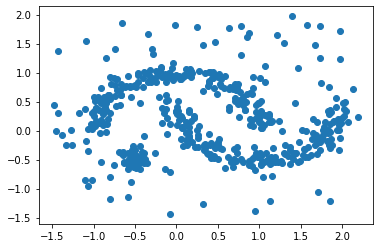

In [13]:
from sklearn.datasets import make_moons, make_circles, make_blobs
np.random.seed(214)
X_moons, _ = make_moons(n_samples=350, noise=0.1, random_state=214)
X_blobs, _ = make_blobs(n_samples=50, centers=[[-0.5,-0.5]], cluster_std=[0.1], random_state=214)
X_noise = np.random.uniform(low=-1.5, high=2.0, size=(100,2))

X_vectors = np.vstack([X_moons, X_blobs, X_noise])
plt.scatter(X_vectors[:, 0], X_vectors[:, 1])

In [15]:
from sklearn.cluster import MiniBatchKMeans

NUM_KMEANS = 32
MIN_PROBABILITY = 0.6

# Generating a "Cluster Forest"
clustering_models = NUM_KMEANS*[
    # Note: Do not set a random_state, as the variability is crucial
    # This is a extreme simple K-Means
    MiniBatchKMeans(n_clusters=16, batch_size=64, n_init=1, max_iter=20)
]

clt_sim_matrix = ClusterSimilarityMatrix()
for model in clustering_models:
    clt_sim_matrix.fit( model.fit_predict(X=X_vectors) ) 

sim_matrix = clt_sim_matrix.similarity
norm_sim_matrix = sim_matrix/sim_matrix.diagonal()

# Transforming the probabilities into graph edges
# This is very similar to DBSCAN
graph = (norm_sim_matrix>MIN_PROBABILITY).astype(int)

# Extractin the connected components
n_clusters, y_ensamble = connected_components( graph, directed=False, return_labels=True )

# Default K-Means
y_kmeans = KMeans(n_clusters=3).fit_predict(X_vectors)

NameError: name 'ClusterSimilarityMatrix' is not defined

matrix([[1. , 0.1, 0.6, 0.4],
        [0.1, 1. , 0.1, 0.2],
        [0.6, 0.1, 1. , 0.7],
        [0.4, 0.2, 0.7, 1. ]])

array([0, 1, 0, 0])

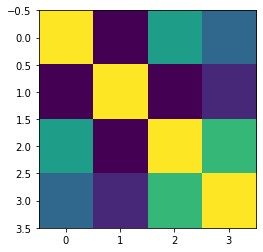

In [19]:
import numpy as np
from sklearn.cluster import SpectralClustering
mat = np.matrix([[1.,.1,.6,.4],[.1,1.,.1,.2],[.6,.1,1.,.7],[.4,.2,.7,1.]])
mat
plt.imshow(mat)
SpectralClustering(2).fit_predict(mat)

In [7]:
from src.utils import *
from src.dgp import dgp_marketplace

df = dgp_marketplace().generate_data(N=10_000)
df.head()

ModuleNotFoundError: No module named 'src'

In [5]:
def get_bias_var(tree, X_train, y_train, X_test, y_test, loss_type):
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(tree, X_train, y_train, X_test, y_test, loss=loss_type, random_seed=123)

    print('Average expected loss: %.3f' % avg_expected_loss)
    print('Average bias: %.3f' % avg_bias)
    print('Average variance: %.3f' % avg_var)
    return

In [6]:
X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True)
tree = DecisionTreeRegressor(random_state=123)
error_dt, bias_dt, var_dt = bias_variance_decomp(tree, X_train, y_train, X_test, y_test,'mse', random_seed=123)

tree_pruned = DecisionTreeRegressor(random_state=123, max_depth=2)
error_dt_pruned, bias_dt_pruned, var_dt_pruned = bias_variance_decomp(tree_pruned, X_train, y_train, X_test, y_test,'mse', random_seed=123)

print("variance Reduction:", str(np.round((var_dt_pruned/var_dt-1)*100,2)) + '%')
print("At the expense of introducing bias:", str(np.round((bias_dt_pruned/bias_dt-1)*100, 2)) + '%')

variance Reduction: -61.1%
At the expense of introducing bias: 112.98%


In [4]:
! pip install hyperopt

  Using cached hyperopt-0.2.7-py2.py3-none-any.whl (1.6 MB)
  Using cached py4j-0.10.9.5-py2.py3-none-any.whl (199 kB)


In [6]:
! pip install shap-hypetune

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\sklearn\\__init__.py'
Consider using the `--user` option or check the permissions.



  Using cached scikit_learn-1.1.1-cp38-cp38-win_amd64.whl (7.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
  Rolling back uninstall of scikit-learn
  Moving to c:\users\nfsi291\appdata\roaming\python\python38\site-packages\scikit_learn-0.23.2.dist-info\
   from C:\Users\NFSI291\AppData\Roaming\Python\Python38\site-packages\~cikit_learn-0.23.2.dist-info
  Moving to c:\users\nfsi291\appdata\roaming\python\python38\site-packages\sklearn\
   from C:\Users\NFSI291\AppData\Roaming\Python\Python38\site-packages\~klearn


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, TimeSeriesSplit

from hyperopt import hp
from hyperopt import Trials

from lightgbm import LGBMClassifier, early_stopping

from shap import TreeExplainer
from shaphypetune import BoostSearch

import warnings
warnings.simplefilter('ignore')

ModuleNotFoundError: No module named 'shaphypetune'

In [3]:
from scipy import sparse

def sparse_corrcoef(A, B=None):

    if B is not None:
        A = sparse.vstack((A, B), format='csr')

    A = A.astype(np.float64)
    n = A.shape[1]

    # Compute the covariance matrix
    rowsum = A.sum(1)
    centering = rowsum.dot(rowsum.T.conjugate()) / n
    C = (A.dot(A.T.conjugate()) - centering) / (n - 1)

    # The correlation coefficients are given by
    # C_{i,j} / sqrt(C_{i} * C_{j})
    d = np.diag(C)
    coeffs = C / np.sqrt(np.outer(d, d))

    return coeffs

In [4]:
# some smallish sparse random matrices
a = sparse.rand(100, 100000, density=0.1, format='csr')
b = sparse.rand(100, 100000, density=0.1, format='csr')
pd.DataFrame(a.toarray())

0      1         2         3      4         5      6         7      \
0   0.000000    0.0  0.000000  0.000000    0.0  0.000000    0.0  0.517140   
1   0.000000    0.0  0.000000  0.000000    0.0  0.000000    0.0  0.000000   
2   0.108452    0.0  0.386858  0.000000    0.0  0.000000    0.0  0.000000   
3   0.000000    0.0  0.000000  0.000000    0.0  0.000000    0.0  0.092207   
4   0.000000    0.0  0.835144  0.826977    0.0  0.226934    0.0  0.000000   
..       ...    ...       ...       ...    ...       ...    ...       ...   
95  0.000000    0.0  0.000000  0.000000    0.0  0.000000    0.0  0.000000   
96  0.000000    0.0  0.000000  0.786723    0.0  0.000000    0.0  0.000000   
97  0.000000    0.0  0.000000  0.000000    0.0  0.000000    0.0  0.000000   
98  0.000000    0.0  0.000000  0.000000    0.0  0.000000    0.0  0.000000   
99  0.000000    0.0  0.000000  0.000000    0.0  0.000000    0.0  0.000000   

       8         9      ...     99990  99991     99992     99993     99994  \
0   0.000000  0.213663  ...  0.000000    0.0  0.000000  0.000000  0.000000   
1   0.000000  0.000000  ...  0.725712    0.0  0.807312  0.000000  0.000000   
2   0.000000  0.000000  ...  0.000000    0.0  0.000000  0.000000  0.000000   
3   0.000000  0.000000  ...  0.000000    0.0  0.000000  0.949721  0.000000   
4   0.000000  0.000000  ...  0.000000    0.0  0.000000  0.000000  0.663952   
..       ...       ...  ...       ...    ...       ...       ...       ...   
95  0.000000  0.000000  ...  0.000000    0.0  0.000000  0.843456  0.000000   
96  0.000000  0.000000  ...  0.000000    0.0  0.000000  0.000000  0.000000   
97  0.706454  0.000000  ...  0.000000    0.0  0.000000  0.000000  0.000000   
98  0.000000  0.000000  ...  0.000000    0.0  0.935649  0.068705  0.000000   
99  0.626160  0.000000  ...  0.000000    0.0  0.000000  0.000000  0.000000   

      99995     99996     99997     99998     99999  
0   0.00000  0.000000  0.000000  0.000000  0.000000  
1   0.00000  0.000000  0.000000  0.000000  0.000000  
2   0.00000  0.000000  0.000000  0.000000  0.000000  
3   0.00000  0.000000  0.000000  0.000000  0.000000  
4   0.76694  0.000000  0.000000  0.910673  0.000000  
..      ...       ...       ...       ...       ...  
95  0.00000  0.000000  0.057909  0.000000  0.000000  
96  0.00000  0.626215  0.000000  0.000000  0.000000  
97  0.00000  0.000000  0.000000  0.000000  0.000000  
98  0.00000  0.000000  0.000000  0.000000  0.793852  
99  0.00000  0.000000  0.000000  0.000000  0.000000  

[100 rows x 100000 columns]

<AxesSubplot:>

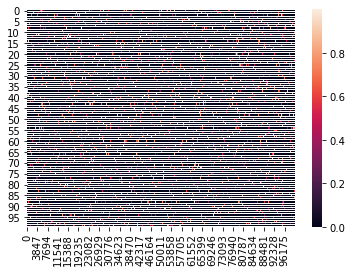

In [9]:
sns.heatmap(a.toarray())

<AxesSubplot:>

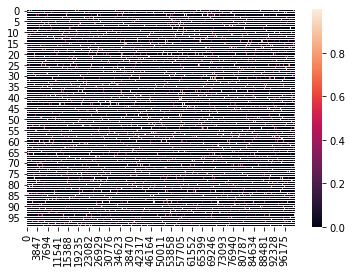

In [10]:
sns.heatmap(b.toarray())

In [30]:
c = a[:10,:10].toarray()
d = b[:10,:10].toarray()
c
d

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.51714008, 0.        , 0.21366345],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.10845198, 0.        , 0.38685807, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.09220728, 0.        , 0.        ],
       [0.        , 0.        , 0.83514439, 0.82697668, 0.        ,
        0.2269338 , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.99779819, 0.        , 0.        ],
       [0.        , 0.        , 0.       

array([[0.        , 0.        , 0.53416206, 0.83189893, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00353186, 0.88850923, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.1866028 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.95707351, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.12320562, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [33]:
pd.DataFrame(np.corrcoef(c, d)).fillna(0)

0    1         2         3         4    5         6    7    8    9   \
0   1.000000  0.0 -0.191989  0.918549 -0.261168  0.0  0.918549  0.0  0.0  0.0   
1   0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0   
2  -0.191989  0.0  1.000000 -0.141115  0.598030  0.0 -0.141115  0.0  0.0  0.0   
3   0.918549  0.0 -0.141115  1.000000 -0.191963  0.0  1.000000  0.0  0.0  0.0   
4  -0.261168  0.0  0.598030 -0.191963  1.000000  0.0 -0.191963  0.0  0.0  0.0   
5   0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0   
6   0.918549  0.0 -0.141115  1.000000 -0.191963  0.0  1.000000  0.0  0.0  0.0   
7   0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0   
8   0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0   
9   0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0   
10 -0.220306  0.0  0.422427 -0.161928  0.949675  0.0 -0.161928  0.0  0.0  0.0   
11  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0   
12  0.918346  0.0 -0.141738  0.999992 -0.192809  0.0  0.999992  0.0  0.0  0.0   
13 -0.151169  0.0 -0.141115 -0.111111 -0.191963  0.0 -0.111111  0.0  0.0  0.0   
14  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0   
15 -0.151169  0.0  0.167867 -0.111111 -0.191963  0.0 -0.111111  0.0  0.0  0.0   
16 -0.151169  0.0  0.961054 -0.111111  0.656697  0.0 -0.111111  0.0  0.0  0.0   
17 -0.151169  0.0 -0.141115 -0.111111 -0.191963  0.0 -0.111111  0.0  0.0  0.0   
18  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0   
19  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0   

          10   11        12        13   14        15        16        17   18  \
0  -0.220306  0.0  0.918346 -0.151169  0.0 -0.151169 -0.151169 -0.151169  0.0   
1   0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
2   0.422427  0.0 -0.141738 -0.141115  0.0  0.167867  0.961054 -0.141115  0.0   
3  -0.161928  0.0  0.999992 -0.111111  0.0 -0.111111 -0.111111 -0.111111  0.0   
4   0.949675  0.0 -0.192809 -0.191963  0.0 -0.191963  0.656697 -0.191963  0.0   
5   0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
6  -0.161928  0.0  0.999992 -0.111111  0.0 -0.111111 -0.111111 -0.111111  0.0   
7   0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
8   0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
9   0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
10  1.000000  0.0 -0.162643 -0.161928  0.0 -0.161928  0.471250 -0.161928  0.0   
11  0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
12 -0.162643  0.0  1.000000 -0.107183  0.0 -0.111601 -0.111601 -0.111601  0.0   
13 -0.161928  0.0 -0.107183  1.000000  0.0 -0.111111 -0.111111 -0.111111  0.0   
14  0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
15 -0.161928  0.0 -0.111601 -0.111111  0.0  1.000000 -0.111111 -0.111111  0.0   
16  0.471250  0.0 -0.111601 -0.111111  0.0 -0.111111  1.000000 -0.111111  0.0   
17 -0.161928  0.0 -0.111601 -0.111111  0.0 -0.111111 -0.111111  1.000000  0.0   
18  0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
19  0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0   

     19  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  
5   0.0  
6   0.0  
7   0.0  
8   0.0  
9   0.0  
10  0.0  
11  0.0  
12  0.0  
13  0.0  
14  0.0  
15  0.0  
16  0.0  
17  0.0  
18  0.0  
19  0.0

In [11]:
coeffs1 = sparse_corrcoef(a, b)
coeffs2 = np.corrcoef(a.todense(), b.todense())
coeffs1
coeffs2

matrix([[ 1.00000000e+00, -2.75214642e-03, -3.76741334e-03, ...,
         -3.60213380e-03, -1.51999337e-03,  2.81950517e-03],
        [-2.75214642e-03,  1.00000000e+00,  7.46461914e-04, ...,
         -3.52343579e-03, -2.21641008e-04, -1.97561576e-04],
        [-3.76741334e-03,  7.46461914e-04,  1.00000000e+00, ...,
         -6.36896059e-04, -1.59655758e-03, -3.77055336e-05],
        ...,
        [-3.60213380e-03, -3.52343579e-03, -6.36896059e-04, ...,
          1.00000000e+00, -2.05762443e-03, -2.09039354e-03],
        [-1.51999337e-03, -2.21641008e-04, -1.59655758e-03, ...,
         -2.05762443e-03,  1.00000000e+00,  3.44621295e-03],
        [ 2.81950517e-03, -1.97561576e-04, -3.77055336e-05, ...,
         -2.09039354e-03,  3.44621295e-03,  1.00000000e+00]])

array([[ 1.00000000e+00, -2.75214642e-03, -3.76741334e-03, ...,
        -3.60213380e-03, -1.51999337e-03,  2.81950517e-03],
       [-2.75214642e-03,  1.00000000e+00,  7.46461914e-04, ...,
        -3.52343579e-03, -2.21641008e-04, -1.97561576e-04],
       [-3.76741334e-03,  7.46461914e-04,  1.00000000e+00, ...,
        -6.36896059e-04, -1.59655758e-03, -3.77055336e-05],
       ...,
       [-3.60213380e-03, -3.52343579e-03, -6.36896059e-04, ...,
         1.00000000e+00, -2.05762443e-03, -2.09039354e-03],
       [-1.51999337e-03, -2.21641008e-04, -1.59655758e-03, ...,
        -2.05762443e-03,  1.00000000e+00,  3.44621295e-03],
       [ 2.81950517e-03, -1.97561576e-04, -3.77055336e-05, ...,
        -2.09039354e-03,  3.44621295e-03,  1.00000000e+00]])

In [4]:
print(np.allclose(coeffs1, coeffs2))

True


In [36]:
! pip install dtw-python

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



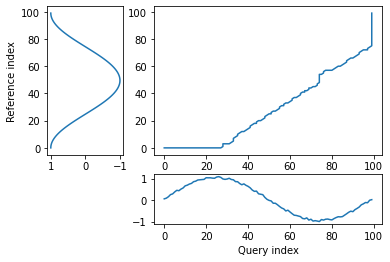

<AxesSubplot:>

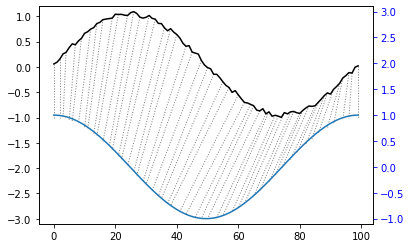

<AxesSubplot:>

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



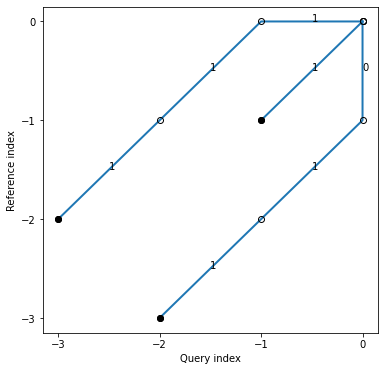

<AxesSubplot:xlabel='Query index', ylabel='Reference index'>

In [37]:
import numpy as np
from dtw import *
## A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)

## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()


In [57]:
import numpy
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

from tslearn import metrics

numpy.random.seed(0)

s_x = numpy.array(
    [-0.790, -0.765, -0.734, -0.700, -0.668, -0.639, -0.612, -0.587, -0.564,
     -0.544, -0.529, -0.518, -0.509, -0.502, -0.494, -0.488, -0.482, -0.475,
     -0.472, -0.470, -0.465, -0.464, -0.461, -0.458, -0.459, -0.460, -0.459,
     -0.458, -0.448, -0.431, -0.408, -0.375, -0.333, -0.277, -0.196, -0.090,
     0.047, 0.220, 0.426, 0.671, 0.962, 1.300, 1.683, 2.096, 2.510, 2.895,
     3.219, 3.463, 3.621, 3.700, 3.713, 3.677, 3.606, 3.510, 3.400, 3.280,
     3.158, 3.038, 2.919, 2.801, 2.676, 2.538, 2.382, 2.206, 2.016, 1.821,
     1.627, 1.439, 1.260, 1.085, 0.917, 0.758, 0.608, 0.476, 0.361, 0.259,
     0.173, 0.096, 0.027, -0.032, -0.087, -0.137, -0.179, -0.221, -0.260,
     -0.293, -0.328, -0.359, -0.385, -0.413, -0.437, -0.458, -0.480, -0.498,
     -0.512, -0.526, -0.536, -0.544, -0.552, -0.556, -0.561, -0.565, -0.568,
     -0.570, -0.570, -0.566, -0.560, -0.549, -0.532, -0.510, -0.480, -0.443,
     -0.402, -0.357, -0.308, -0.256, -0.200, -0.139, -0.073, -0.003, 0.066,
     0.131, 0.186, 0.229, 0.259, 0.276, 0.280, 0.272, 0.256, 0.234, 0.209,
     0.186, 0.162, 0.139, 0.112, 0.081, 0.046, 0.008, -0.032, -0.071, -0.110,
     -0.147, -0.180, -0.210, -0.235, -0.256, -0.275, -0.292, -0.307, -0.320,
     -0.332, -0.344, -0.355, -0.363, -0.367, -0.364, -0.351, -0.330, -0.299,
     -0.260, -0.217, -0.172, -0.128, -0.091, -0.060, -0.036, -0.022, -0.016,
     -0.020, -0.037, -0.065, -0.104, -0.151, -0.201, -0.253, -0.302, -0.347,
     -0.388, -0.426, -0.460, -0.491, -0.517, -0.539, -0.558, -0.575, -0.588,
     -0.600, -0.606, -0.607, -0.604, -0.598, -0.589, -0.577, -0.558, -0.531,
     -0.496, -0.454, -0.410, -0.364, -0.318, -0.276, -0.237, -0.203, -0.176,
     -0.157, -0.145, -0.142, -0.145, -0.154, -0.168, -0.185, -0.206, -0.230,
     -0.256, -0.286, -0.318, -0.351, -0.383, -0.414, -0.442, -0.467, -0.489,
     -0.508, -0.523, -0.535, -0.544, -0.552, -0.557, -0.560, -0.560, -0.557,
     -0.551, -0.542, -0.531, -0.519, -0.507, -0.494, -0.484, -0.476, -0.469,
     -0.463, -0.456, -0.449, -0.442, -0.435, -0.431, -0.429, -0.430, -0.435,
     -0.442, -0.452, -0.465, -0.479, -0.493, -0.506, -0.517, -0.526, -0.535,
     -0.548, -0.567, -0.592, -0.622, -0.655, -0.690, -0.728, -0.764, -0.795,
     -0.815, -0.823, -0.821])

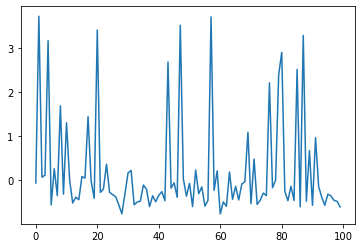

In [70]:
a = np.random.choice(s_x, size=100, replace=False, p=None)
plt.plot(np.random.choice(a, size=100, replace=False, p=None))

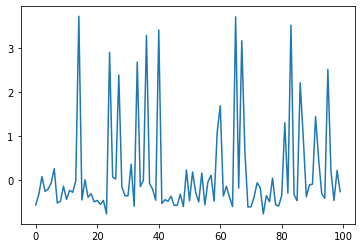

In [71]:
b = np.random.choice(a, size=100, replace=False, p=None)
plt.plot(np.random.choice(b, size=100, replace=False, p=None))

In [72]:
path, sim = metrics.dtw_path(a, b)
sim

6.358094997717478

(36,)

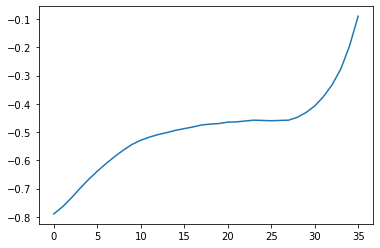

In [56]:
plt.plot(s_x)
s_x.shape

(540,)

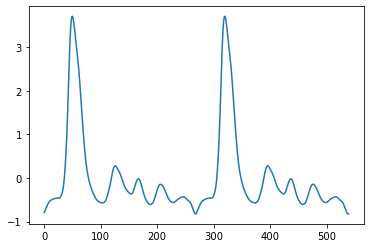

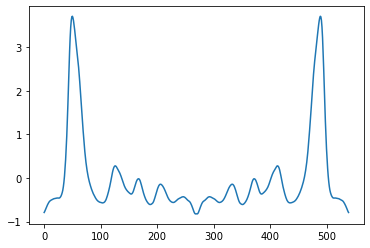

In [68]:
numpy.concatenate((s_x, s_x)).shape
plt.plot(numpy.concatenate((s_x, s_x)))
plt.show()
plt.plot(numpy.concatenate((s_x, s_x[::-1])))

In [69]:
s_y1 = numpy.concatenate((s_x, s_x)).reshape((-1, 1))
s_y2 = numpy.concatenate((s_x, s_x[::-1])).reshape((-1, 1))
sz = s_y1.shape[0]

path, sim = metrics.dtw_path(s_y1, s_y2)
sim

3.6372845640669906

<Figure size 432x432 with 0 Axes>

(-0.5, 539.5, -0.5, 539.5)

(-26.950000000000003, 565.95, -1.0497999999999998, 3.9398)

(0.0, 539.0)

(-3.9398, 1.0497999999999998, -26.950000000000003, 565.95)

(0.0, 539.0)

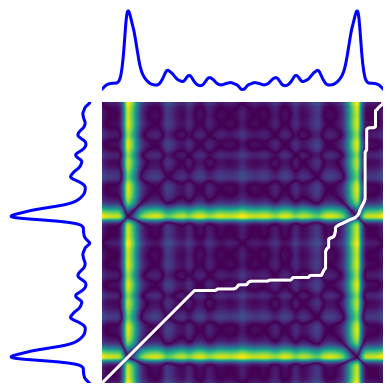

In [53]:
plt.figure(1, figsize=(6, 6))

# definitions for the axes
left, bottom = 0.01, 0.1
w_ts = h_ts = 0.2
left_h = left + w_ts + 0.02
width = height = 0.65
bottom_h = bottom + height + 0.02

rect_s_y = [left, bottom, w_ts, height]
rect_gram = [left_h, bottom, width, height]
rect_s_x = [left_h, bottom_h, width, h_ts]

ax_gram = plt.axes(rect_gram)
ax_s_x = plt.axes(rect_s_x)
ax_s_y = plt.axes(rect_s_y)

mat = cdist(s_y1, s_y2)

ax_gram.imshow(mat, origin='lower')
ax_gram.axis("off")
ax_gram.autoscale(False)
ax_gram.plot([j for (i, j) in path], [i for (i, j) in path], "w-",
             linewidth=3.)

ax_s_x.plot(numpy.arange(sz), s_y2, "b-", linewidth=3.)
ax_s_x.axis("off")
ax_s_x.set_xlim((0, sz - 1))

ax_s_y.plot(- s_y1, numpy.arange(sz), "b-", linewidth=3.)
ax_s_y.axis("off")
ax_s_y.set_ylim((0, sz - 1))

plt.tight_layout()
plt.show()

In [127]:
from tslearn.clustering import KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train.shape
X_train = X_train.reshape(100, 275)
X_test.shape
X_test = X_test.reshape(100, 275)

(100, 275, 1)

(100, 275, 1)

In [ ]:
# Keep first 3 classes and 50 first time series
X_train = X_train[y_train < 4]
X_train = X_train[:50]
#numpy.random.shuffle(X_train)

In [114]:
# For this method to operate properly, prior scaling is required
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
sz = X_train.shape[1]
X_train.shape

(100, 275, 1)

In [109]:
y_train[y_train < 4]
y_train[y_train < 4].shape
#X_train = X_train[:50]

array([1, 2, 3, 1, 1, 1, 3, 1, 3, 2, 3, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 3, 3, 3, 3, 3, 1, 2, 3, 2, 1, 2, 2, 2, 2, 1, 3, 2, 3, 3, 2, 2,
       1, 2, 3, 2, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 2, 1, 1, 3, 1,
       2, 1, 2], dtype=int64)

(69,)

In [128]:
y_train

array([1, 2, 4, 3, 1, 4, 4, 1, 1, 4, 4, 4, 4, 3, 4, 1, 3, 2, 4, 4, 4, 4,
       3, 2, 1, 2, 4, 4, 2, 4, 1, 1, 4, 4, 2, 1, 1, 2, 1, 1, 3, 3, 3, 3,
       3, 1, 4, 4, 4, 2, 4, 3, 2, 1, 4, 2, 2, 2, 2, 1, 3, 2, 4, 3, 3, 2,
       2, 1, 4, 4, 2, 3, 2, 1, 3, 4, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 4, 1,
       2, 1, 4, 4, 4, 1, 3, 1, 2, 4, 1, 2], dtype=int64)

In [145]:
n_clusters = 4
ks = KShape(n_clusters=n_clusters, verbose=True, random_state=seed)
y_pred = ks.fit_predict(X_train)
y_pred

0.001 --> 0.001 --> 0.001 --> 


array([3, 3, 1, 0, 3, 2, 2, 3, 3, 2, 1, 0, 1, 0, 1, 3, 2, 3, 0, 0, 2, 2,
       1, 3, 3, 3, 0, 0, 3, 2, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2, 0,
       0, 3, 0, 1, 2, 3, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 0, 0, 2, 3,
       3, 3, 1, 1, 3, 2, 3, 3, 1, 2, 3, 3, 0, 2, 3, 0, 3, 2, 2, 2, 2, 3,
       3, 3, 0, 0, 0, 3, 1, 3, 3, 2, 3, 3], dtype=int64)

In [151]:
y_prediction = np.where(y_pred == 3, 2,
         np.where(y_pred== 1, 2,
                  np.where(y_pred== 2, 1,
                           np.where(y_pred== 0, 3,
                           100)
                 )))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_prediction)

array([[ 0, 26,  0,  0],
       [ 0, 21,  0,  0],
       [10,  4,  8,  0],
       [11, 10, 10,  0]], dtype=int64)

0.001 --> 0.001 --> 0.001 --> 


<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

(0.0, 275.0)

(-4.0, 4.0)

Text(0.5, 1.0, 'Cluster 1')

<AxesSubplot:>

(0.0, 275.0)

(-4.0, 4.0)

Text(0.5, 1.0, 'Cluster 2')

<AxesSubplot:>

(0.0, 275.0)

(-4.0, 4.0)

Text(0.5, 1.0, 'Cluster 3')

<AxesSubplot:>

(0.0, 275.0)

(-4.0, 4.0)

Text(0.5, 1.0, 'Cluster 4')

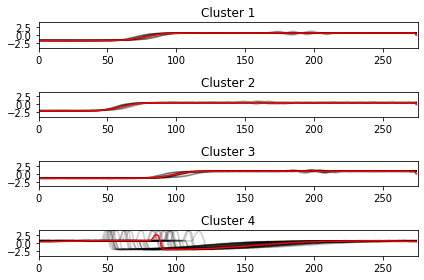

In [115]:
# kShape clustering
n_clusters = 4
ks = KShape(n_clusters=n_clusters, verbose=True, random_state=seed)
y_pred = ks.fit_predict(X_train)

plt.figure()
for yi in range(n_clusters):
    plt.subplot(4, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()

In [5]:
!pip install -q dtreeviz

In [6]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [7]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [8]:
regr = tree.DecisionTreeRegressor(max_depth=3)
boston = load_boston()

X_train = boston.data
y_train = boston.target
regr.fit(X_train, y_train)

viz = dtreeviz(regr,
               X_train,
               y_train,
               target_name='price',  # this name will be displayed at the leaf node
               feature_names=boston.feature_names,
               title="Boston data set regression",
               fontname="Arial",
               title_fontsize=16,
               colors = {"title":"purple"}
              )
viz
# viz.view() will give give a popup with graph in pdf

DecisionTreeRegressor(max_depth=3)

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [5]:
data = pd.Series(np.random.rand(10),
                index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],
                      [1,2,3,1,2,3,1,2,2,3]])
data

a  1    0.561362
   2    0.975570
   3    0.725362
b  1    0.269480
   2    0.715996
   3    0.278513
c  1    0.138965
   2    0.608355
d  2    0.244191
   3    0.603384
dtype: float64

In [6]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [7]:
data.reset_index()

level_0  level_1         0
0       a        1  0.561362
1       a        2  0.975570
2       a        3  0.725362
3       b        1  0.269480
4       b        2  0.715996
5       b        3  0.278513
6       c        1  0.138965
7       c        2  0.608355
8       d        2  0.244191
9       d        3  0.603384

In [10]:
data['b']
data[:, 2]
data[:, 3]

1    0.269480
2    0.715996
3    0.278513
dtype: float64

a    0.975570
b    0.715996
c    0.608355
d    0.244191
dtype: float64

a    0.725362
b    0.278513
d    0.603384
dtype: float64

In [12]:
data
data.unstack()

a  1    0.561362
   2    0.975570
   3    0.725362
b  1    0.269480
   2    0.715996
   3    0.278513
c  1    0.138965
   2    0.608355
d  2    0.244191
   3    0.603384
dtype: float64

1         2         3
a  0.561362  0.975570  0.725362
b  0.269480  0.715996  0.278513
c  0.138965  0.608355       NaN
d       NaN  0.244191  0.603384

In [16]:
data.index.names
data.index.names =['key1', 'key2']

FrozenList([None, None])

In [17]:
data.swaplevel('key1', 'key2')

key2  key1
1     a       0.561362
2     a       0.975570
3     a       0.725362
1     b       0.269480
2     b       0.715996
3     b       0.278513
1     c       0.138965
2     c       0.608355
      d       0.244191
3     d       0.603384
dtype: float64

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
iris = load_iris()
X = iris.data[:, :2]
classifier = LogisticRegression().fit(X, iris.target)
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")

plt.show()


ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (C:\Users\NFSI291\AppData\Roaming\Python\Python38\site-packages\sklearn\inspection\__init__.py)

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (C:\Users\NFSI291\AppData\Roaming\Python\Python38\site-packages\sklearn\inspection\__init__.py)

In [8]:
from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical

from keras.datasets import cifar10

In [10]:
NUM_CLASSES = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)

170508288/170498071 [==============================] - 208s 1us/step


In [11]:
x_train[54, 12, 13, 1] 

0.36862746

In [12]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [14]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [15]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8515 - accuracy: 0.3332
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6664 - accuracy: 0.4016
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5915 - accuracy: 0.4306
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5371 - accuracy: 0.4527
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4977 - accuracy: 0.4661
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4631 - accuracy: 0.4808
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4324 - accuracy: 0.4915
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4113 - accuracy: 0.4979
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3885 - accuracy: 0.5031
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.363

In [16]:
model.evaluate(x_test, y_test)

ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1525, in test_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1514, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1507, in run_step  **
        outputs = model.test_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1473, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [17]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred = horse')

Text(0.5, -0.7, 'act = airplane')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred = frog')

Text(0.5, -0.7, 'act = airplane')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred = deer')

Text(0.5, -0.7, 'act = airplane')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred = horse')

Text(0.5, -0.7, 'act = airplane')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred = bird')

Text(0.5, -0.7, 'act = airplane')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred = horse')

Text(0.5, -0.7, 'act = airplane')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred = truck')

Text(0.5, -0.7, 'act = airplane')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred = ship')

Text(0.5, -0.7, 'act = airplane')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred = cat')

Text(0.5, -0.7, 'act = airplane')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred = truck')

Text(0.5, -0.7, 'act = airplane')

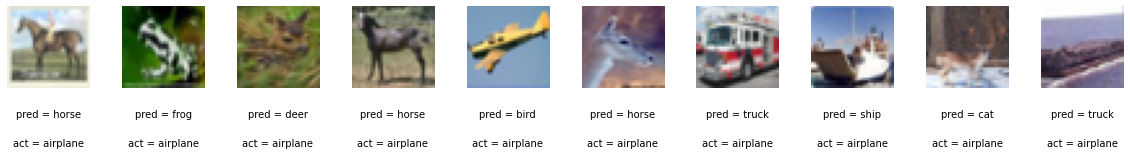

In [20]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

In [77]:
def product(p):
   return (p)*(1 - (p))

def product(p):
   return (p)*(1 - (p))

def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def cross_entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

<Figure size 864x360 with 0 Axes>

(0.0, 1.1)

Text(0.5, 0, 'p(i=1)')

Text(0, 0.5, 'The Impurity of Information ')

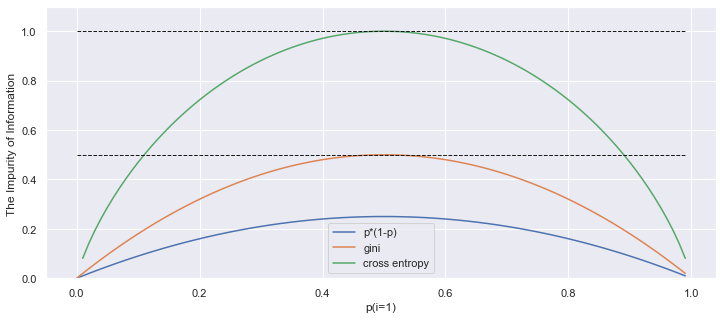

In [80]:
plt.figure(figsize=(12, 5)); plt.rc('legend', fontsize=16)
x = np.arange(0.0, 1, 0.01)

sns.set()
#plt.plot(x, x, label='p(y=positive)'); plt.legend() 
plt.plot(x, product(x), label='p*(1-p)'); plt.legend() 
plt.plot(x, gini(x), label='gini'); plt.legend() # pq*2(이진분류)
plt.plot(x, [cross_entropy(p) if p != 0 else None for p in x],  label='cross entropy')
plt.legend()
plt.plot(x, [0.5]*x.shape[0], linewidth=1, color='k', linestyle='--')
plt.plot(x, [1.0]*x.shape[0], linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1]); plt.xlabel('p(i=1)'); plt.ylabel('The Impurity of Information ')

In [73]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

DecisionTreeClassifier()

DecisionTree with features [0, 1] has a score of 0.9266666666666666


<AxesSubplot:>

Text(0.5, 1.0, 'DecisionTree')

RandomForestClassifier(n_estimators=30)

RandomForest with 30 estimators with features [0, 1] has a score of 0.9266666666666666


<AxesSubplot:>

Text(0.5, 1.0, 'RandomForest')

ExtraTreesClassifier(n_estimators=30)

ExtraTrees with 30 estimators with features [0, 1] has a score of 0.9266666666666666


<AxesSubplot:>

Text(0.5, 1.0, 'ExtraTrees')

DecisionTreeClassifier()

DecisionTree with features [0, 2] has a score of 0.9933333333333333


<AxesSubplot:>

RandomForestClassifier(n_estimators=30)

RandomForest with 30 estimators with features [0, 2] has a score of 0.9933333333333333


<AxesSubplot:>

ExtraTreesClassifier(n_estimators=30)

ExtraTrees with 30 estimators with features [0, 2] has a score of 0.9933333333333333


<AxesSubplot:>

DecisionTreeClassifier()

DecisionTree with features [2, 3] has a score of 0.9933333333333333


<AxesSubplot:>

RandomForestClassifier(n_estimators=30)

RandomForest with 30 estimators with features [2, 3] has a score of 0.9933333333333333


<AxesSubplot:>

ExtraTreesClassifier(n_estimators=30)

ExtraTrees with 30 estimators with features [2, 3] has a score of 0.9933333333333333


<AxesSubplot:>

Text(0.5, 0.98, 'Classifiers on feature subsets of the Iris dataset')

(-2.5675762342771735,
 2.7724237657228317,
 -2.447076479298041,
 2.6929235207019633)

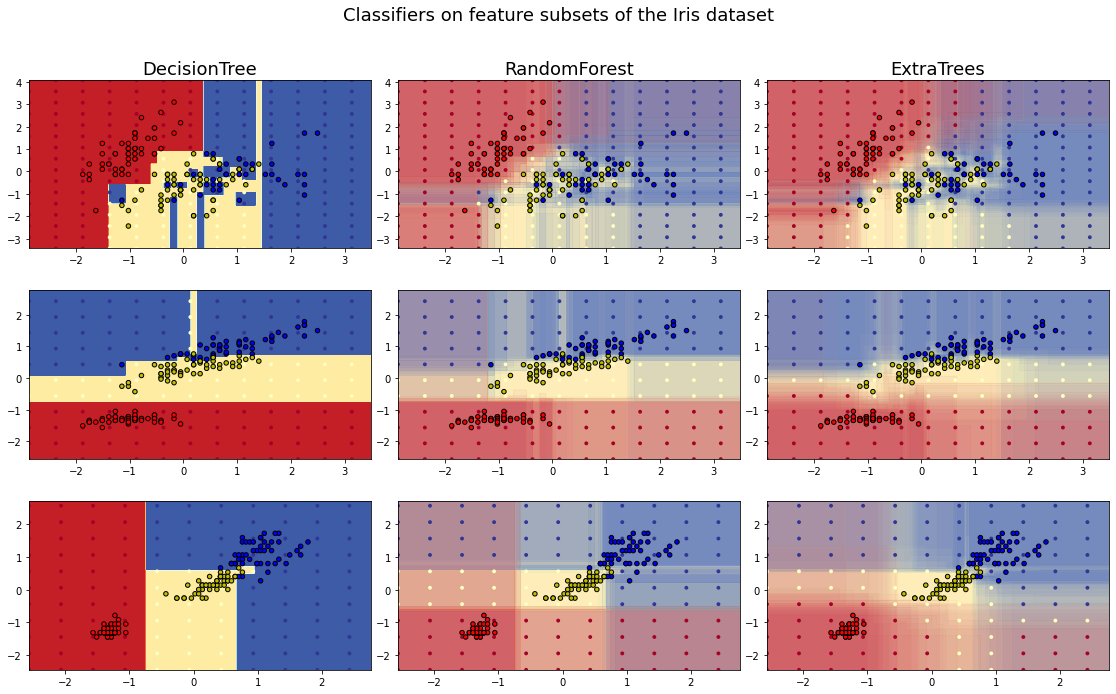

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
)
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1

models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators),
    #AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=n_estimators),
]

fig = plt.figure(figsize=(16, 10))


for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        model.fit(X, y)

        scores = model.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2][: -len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print(model_details + " with features", pair, "has a score of", scores)

        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=18)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
        )

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser),
        )
        Z_points_coarser = model.predict(
            np.c_[xx_coarser.ravel(), yy_coarser.ravel()]
        ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(
            xx_coarser,
            yy_coarser,
            s=15,
            c=Z_points_coarser,
            cmap=cmap,
            edgecolors="none",
        )

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(
            X[:, 0],
            X[:, 1],
            c=y,
            cmap=ListedColormap(["r", "y", "b"]),
            edgecolor="k",
            s=20,
        )
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=18)
plt.axis("tight")
plt.tight_layout(h_pad=2.5, w_pad=0.5, pad=2.5)
plt.show()

In [9]:
names = np.array(['Alex', 'Joe', 'Alex', 'Alex', 'Joe', 'Alex', 'Bill'])
names == 'Alex'

array([ True, False,  True,  True, False,  True, False])

In [10]:
np.random.seed(10)
data = np.random.randn(7,4)
data

array([[ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385],
       [ 0.62133597, -0.72008556,  0.26551159,  0.10854853],
       [ 0.00429143, -0.17460021,  0.43302619,  1.20303737],
       [-0.96506567,  1.02827408,  0.22863013,  0.44513761],
       [-1.13660221,  0.13513688,  1.484537  , -1.07980489],
       [-1.97772828, -1.7433723 ,  0.26607016,  2.38496733],
       [ 1.12369125,  1.67262221,  0.09914922,  1.39799638]])

In [11]:
data[names == 'Alex']

array([[ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385],
       [ 0.00429143, -0.17460021,  0.43302619,  1.20303737],
       [-0.96506567,  1.02827408,  0.22863013,  0.44513761],
       [-1.97772828, -1.7433723 ,  0.26607016,  2.38496733]])

In [20]:
points = np.arange(1, 6, 1)
points
np.meshgrid(points, points)

array([1, 2, 3, 4, 5])

[array([[1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5]]),
 array([[1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5]])]

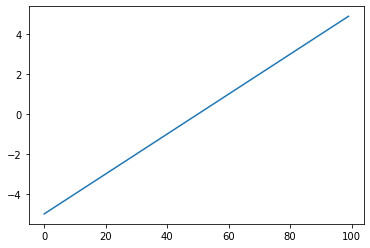

In [32]:
points = np.arange(-5, 5, 0.1)
plt.plot(points)

In [33]:
xs, ys = np.meshgrid(points, points)
xs
ys

array([[-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       ...,
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9]])

array([[-5. , -5. , -5. , ..., -5. , -5. , -5. ],
       [-4.9, -4.9, -4.9, ..., -4.9, -4.9, -4.9],
       [-4.8, -4.8, -4.8, ..., -4.8, -4.8, -4.8],
       ...,
       [ 4.7,  4.7,  4.7, ...,  4.7,  4.7,  4.7],
       [ 4.8,  4.8,  4.8, ...,  4.8,  4.8,  4.8],
       [ 4.9,  4.9,  4.9, ...,  4.9,  4.9,  4.9]])

In [34]:
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.00071425, 6.93108938, ..., 6.86221539, 6.93108938,
        7.00071425],
       [7.00071425, 6.92964646, 6.85930026, ..., 6.78969808, 6.85930026,
        6.92964646],
       [6.93108938, 6.85930026, 6.7882251 , ..., 6.71788657, 6.7882251 ,
        6.85930026],
       ...,
       [6.86221539, 6.78969808, 6.71788657, ..., 6.64680374, 6.71788657,
        6.78969808],
       [6.93108938, 6.85930026, 6.7882251 , ..., 6.71788657, 6.7882251 ,
        6.85930026],
       [7.00071425, 6.92964646, 6.85930026, ..., 6.78969808, 6.85930026,
        6.92964646]])

In [36]:
pd.DataFrame(z)

0         1         2         3         4         5         6   \
0   7.071068  7.000714  6.931089  6.862215  6.794115  6.726812  6.660330   
1   7.000714  6.929646  6.859300  6.789698  6.720863  6.652819  6.585590   
2   6.931089  6.859300  6.788225  6.717887  6.648308  6.579514  6.511528   
3   6.862215  6.789698  6.717887  6.646804  6.576473  6.506919  6.438167   
4   6.794115  6.720863  6.648308  6.576473  6.505382  6.435060  6.365532   
..       ...       ...       ...       ...       ...       ...       ...   
95  6.726812  6.652819  6.579514  6.506919  6.435060  6.363961  6.293648   
96  6.794115  6.720863  6.648308  6.576473  6.505382  6.435060  6.365532   
97  6.862215  6.789698  6.717887  6.646804  6.576473  6.506919  6.438167   
98  6.931089  6.859300  6.788225  6.717887  6.648308  6.579514  6.511528   
99  7.000714  6.929646  6.859300  6.789698  6.720863  6.652819  6.585590   

          7         8         9   ...        90        91        92        93  \
0   6.594695  6.529931  6.466065  ...  6.403124  6.466065  6.529931  6.594695   
1   6.519202  6.453681  6.389053  ...  6.325346  6.389053  6.453681  6.519202   
2   6.444377  6.378087  6.312686  ...  6.248200  6.312686  6.378087  6.444377   
3   6.370243  6.303174  6.236986  ...  6.171710  6.236986  6.303174  6.370243   
4   6.296825  6.228965  6.161980  ...  6.095900  6.161980  6.228965  6.296825   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95  6.224147  6.155485  6.087693  ...  6.020797  6.087693  6.155485  6.224147   
96  6.296825  6.228965  6.161980  ...  6.095900  6.161980  6.228965  6.296825   
97  6.370243  6.303174  6.236986  ...  6.171710  6.236986  6.303174  6.370243   
98  6.444377  6.378087  6.312686  ...  6.248200  6.312686  6.378087  6.444377   
99  6.519202  6.453681  6.389053  ...  6.325346  6.389053  6.453681  6.519202   

          94        95        96        97        98        99  
0   6.660330  6.726812  6.794115  6.862215  6.931089  7.000714  
1   6.585590  6.652819  6.720863  6.789698  6.859300  6.929646  
2   6.511528  6.579514  6.648308  6.717887  6.788225  6.859300  
3   6.438167  6.506919  6.576473  6.646804  6.717887  6.789698  
4   6.365532  6.435060  6.505382  6.576473  6.648308  6.720863  
..       ...       ...       ...       ...       ...       ...  
95  6.293648  6.363961  6.435060  6.506919  6.579514  6.652819  
96  6.365532  6.435060  6.505382  6.576473  6.648308  6.720863  
97  6.438167  6.506919  6.576473  6.646804  6.717887  6.789698  
98  6.511528  6.579514  6.648308  6.717887  6.788225  6.859300  
99  6.585590  6.652819  6.720863  6.789698  6.859300  6.929646  

[100 rows x 100 columns]

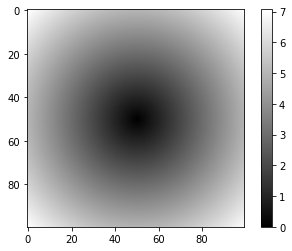

In [35]:
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()

In [38]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [49]:
for i in zip(xarr, yarr, cond):
    i

(1.1, 2.1, True)

(1.2, 2.2, False)

(1.3, 2.3, True)

(1.4, 2.4, True)

(1.5, 2.5, False)

In [54]:
for x, y, c in zip(xarr, yarr, cond):
    x
    y
    c

1.1

2.1

True

1.2

2.2

False

1.3

2.3

True

1.4

2.4

True

1.5

2.5

False

In [53]:
for x, y, c in zip(xarr, yarr, cond):
    if c :
        x
    else :
        y

1.1

2.2

1.3

1.4

2.5

In [39]:
result =[(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [61]:
arr = np.arange(1,11).reshape(2,5)
arr

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [65]:
arr.cumsum()
arr.cumsum(0)
arr.cumsum(1)
arr.cumprod(1)

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45, 55])

array([[ 1,  2,  3,  4,  5],
       [ 7,  9, 11, 13, 15]])

array([[ 1,  3,  6, 10, 15],
       [ 6, 13, 21, 30, 40]])

array([[    1,     2,     6,    24,   120],
       [    6,    42,   336,  3024, 30240]])

LogisticRegression()

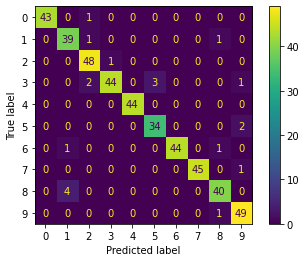

In [117]:
from sklearn import datasets
X = datasets.load_digits().data
y = datasets.load_digits().target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)

In [104]:
data = sns.load_dataset('penguins')
data

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

# DEEP LEARNING with PYTHON
## Generative Deep Learning
### https://github.com/fchollet/deep-learning-with-python-notebooks

<img src='https://images.manning.com/book/a/2a49d38-96e5-4bf7-8555-57f689c52ebf/Chollet-2ed-HI.png' width=500 height=50>

array([8.28715322, 3.75255025, 6.80139798, 5.77945782, 6.47657363,
       6.97253689, 9.04767564, 8.77450007, 5.70573411, 0.70569795])

6.23032775471769

<AxesSubplot:>

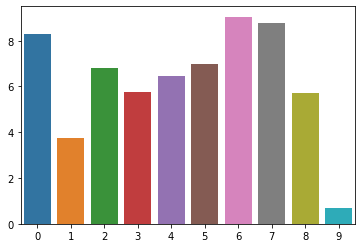

In [82]:
original_distribution = np.random.uniform(0,10,10)
original_distribution
original_distribution.mean()
sns.barplot(np.arange(0,10), original_distribution)

In [96]:
[1, np.e, np.e**2, 0]
np.log([1, np.e, np.e**2, 0])
np.exp(np.log([1, np.e, np.e**2, 0]))

[1, 2.718281828459045, 7.3890560989306495, 0]

array([  0.,   1.,   2., -inf])

array([1.        , 2.71828183, 7.3890561 , 0.        ])

In [99]:
n = [0.1, 0.2, 0.4, 0.3]
np.log(n)
np.exp(n)
np.exp(n)/np.exp(n).sum()

array([-2.30258509, -1.60943791, -0.91629073, -1.2039728 ])

array([1.10517092, 1.22140276, 1.4918247 , 1.34985881])

array([0.21383822, 0.23632778, 0.28865141, 0.26118259])

array([ 2.11470651,  1.32243568,  1.91712818,  1.75430987,  1.86819161,
        1.94197913,  2.20250789,  2.1718498 ,  1.74147165, -0.34856797])

array([  0.,   1.,   2., -inf])

array([1.        , 2.71828183, 7.3890561 , 0.        ])

<AxesSubplot:>

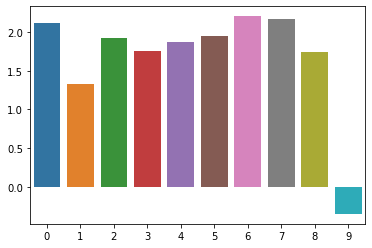

In [95]:
np.log(original_distribution)
sns.barplot(np.arange(0,10), np.log(original_distribution))

# High Entropy, low temperatue
## Surprise

array([211.47065106, 132.24356756, 191.71281759, 175.43098748,
       186.81916099, 194.19791311, 220.25078895, 217.18497953,
       174.1471654 , -34.85679728])

<AxesSubplot:>

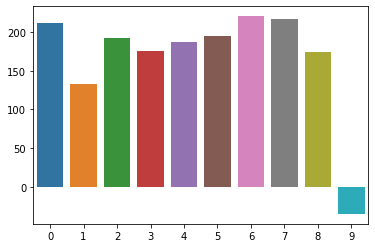

<AxesSubplot:>

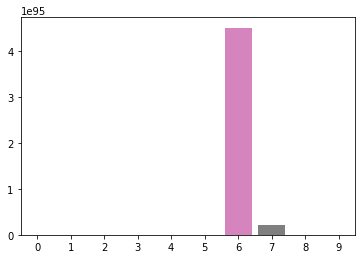

In [92]:
temperature=0.01 # or 1.0
np.log(original_distribution) / temperature
sns.barplot(np.arange(0,10), np.log(original_distribution) / temperature)
plt.show()
sns.barplot(np.arange(0,10), np.exp(np.log(original_distribution) / temperature))

# Low Entropy, High temperatue
## Not Surprise

array([ 2.11470651,  1.32243568,  1.91712818,  1.75430987,  1.86819161,
        1.94197913,  2.20250789,  2.1718498 ,  1.74147165, -0.34856797])

<AxesSubplot:>

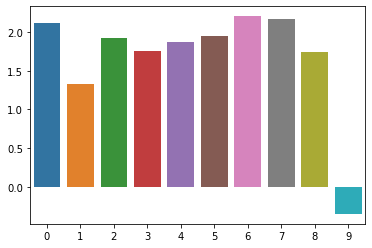

<AxesSubplot:>

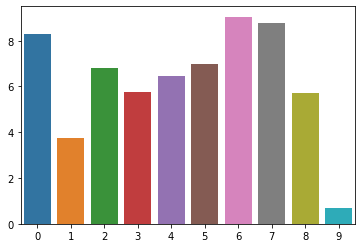

In [93]:
temperature=1 # or 1.0
np.log(original_distribution) / temperature
sns.barplot(np.arange(0,10), np.log(original_distribution) / temperature)
plt.show()
sns.barplot(np.arange(0,10), np.exp(np.log(original_distribution) / temperature))

In [44]:
def reweight_distribution(original_distribution, temperature=0.5):
    distribution = np.log(original_distribution) / temperature
    distribution = np.exp(distribution)
    return distribution / np.sum(distribution)

<AxesSubplot:>

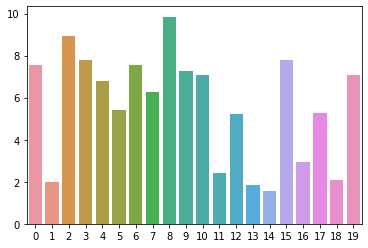

In [47]:
#original_distribution = np.arange(1, 11)/np.arange(1, 11).sum()
original_distribution = np.random.uniform(1,10,20)
sns.barplot(np.arange(0, len(original_distribution)), original_distribution)

<AxesSubplot:>

Text(0.5, 1.0, 'Temperature =0.01')

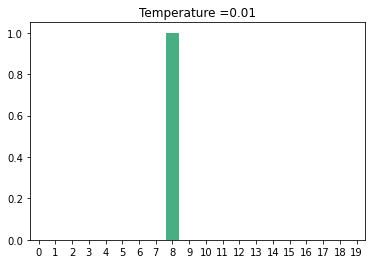

<AxesSubplot:>

Text(0.5, 1.0, 'Temperature =0.2')

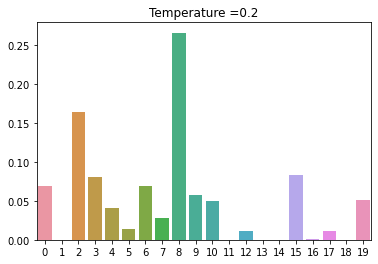

<AxesSubplot:>

Text(0.5, 1.0, 'Temperature =0.4')

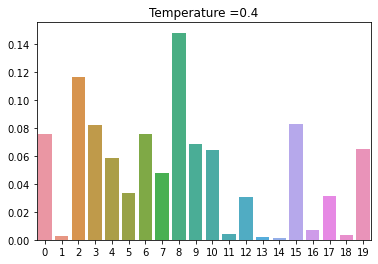

<AxesSubplot:>

Text(0.5, 1.0, 'Temperature =0.6')

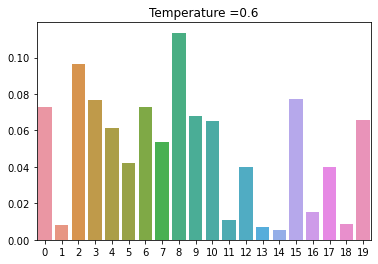

<AxesSubplot:>

Text(0.5, 1.0, 'Temperature =0.8')

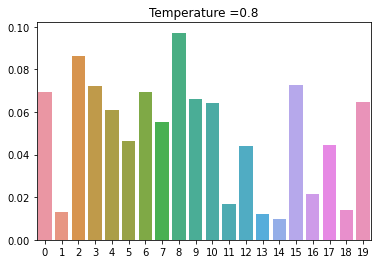

<AxesSubplot:>

Text(0.5, 1.0, 'Temperature =1.0')

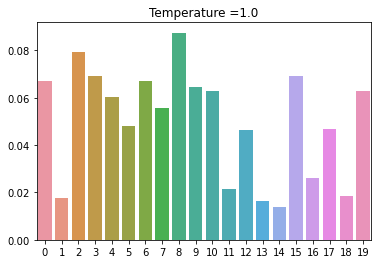

In [54]:
for temperature in [0.01, 0.2, 0.4, 0.6, 0.8, 1.]:
    sns.barplot(np.arange(0, len(original_distribution)), reweight_distribution(original_distribution,temperature= temperature))
    plt.title('Temperature =' + str(temperature))
    plt.show()

In [21]:
np.arange(1, 11)/np.arange(1,11).sum()
(np.arange(1,11)/np.arange(1,11).sum()).sum()

array([0.01818182, 0.03636364, 0.05454545, 0.07272727, 0.09090909,
       0.10909091, 0.12727273, 0.14545455, 0.16363636, 0.18181818])

1.0

In [36]:
from collections import namedtuple
Direction = namedtuple('Direction','N,S,E,W')
dt = Direction(4,74,0,0)
print(dt)

Direction(N=4, S=74, E=0, W=0)


In [41]:
for i in dt:
    i

4

74

0

0

In [43]:
type(dt)

__main__.Direction

## A Super-Fast Way to Loop in Python

In [20]:
import time
start = time.time()
start

1652408207.2962966

In [21]:
time.time()

1652408214.348565

### The average loop

In [22]:
start = time.time()

total_sum = 0
for i in range(100000000):
    total_sum += i

print(f'Sum:{total_sum}')
print(f'For loop : {time.time()- start} seconds')

Sum:4999999950000000
For loop : 11.202152967453003 seconds


### A faster way to loop using built-in functions

In [14]:
start = time.time()
start

total_sum = sum(range(100000000))
print(f'Sum:{total_sum}')
print(f'For loop : {time.time()- start} seconds')

1652408006.8683956

Sum:4999999950000000
For loop : 2.5880653858184814 seconds


### A super-fast way to loop using Numpy
- vector operations

In [16]:
start = time.time()
start

total_sum = np.sum(np.arange(100000000))
print(f'Sum:{total_sum}')
print(f'For loop : {time.time()- start} seconds')

1652408093.125196

Sum:887459712
For loop : 0.205810546875 seconds


In [30]:
import time
import numpy as np

random_scores = np.random.randint(1, 100, size=10000000)

# SOL1: solving problem using a for loop
start = time.time()

count_failed = 0
sum_failed = 0
for score in random_scores:
    if score < 70:
        sum_failed += score
        count_failed += 1

print(sum_failed/count_failed)
print(f'For Loop: {time.time() - start} seconds')

34.9924555007389
For Loop: 3.4849019050598145 seconds


In [35]:
import time
import numpy as np

random_scores = np.random.randint(1, 100, size=10000000)

# SOL2: solving problem using vector operations
start = time.time()

mean_failed = random_scores[random_scores < 70].mean()

print(mean_failed)
print(f'For Loop: {time.time() - start} seconds')

34.993544714185056
For Loop: 0.053827524185180664 seconds


## Detection and interpretation of outliers thanks to autoencoder and SHAP values
- https://heka-ai.medium.com/detection-and-interpretation-of-outliers-thanks-to-autoencoder-and-shap-values-dae99b89b80f

In [7]:
a= np.array([1,3,5,7])
np.linalg.norm(a) # L2 norm
np.linalg.norm(a, 2) # L2 norm

np.linalg.norm(a, 1) # L2 norm

9.16515138991168

9.16515138991168

16.0

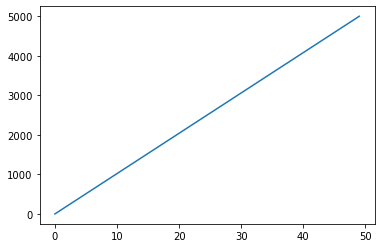

In [19]:
a= np.linspace(0,5000)
plt.plot(a)

20516.29516620725

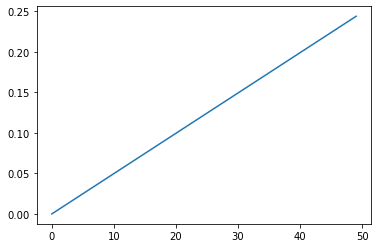

In [20]:
a= np.linspace(0,5000)
np.linalg.norm(a, 2)
plt.plot(a/np.linalg.norm(a, 2))

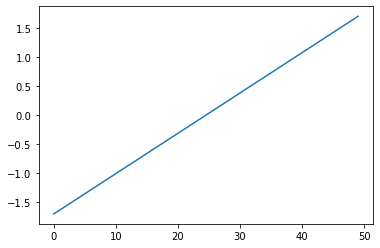

In [24]:
plt.plot((a - a.mean())/ a.std())

## The sliding window is the basis for how we can turn any time series dataset into a supervised learning problems.

### Frequentism and Bayesianism: What's the Big Deal? | SciPy 2014 | Jake VanderPlas
- https://www.youtube.com/watch?v=KhAUfqhLakw&t=522s 에 대하여 저자의 comments

In [115]:
p = 5/8
(1-p)**3

0.052734375

In [116]:
print(f'odds {(1-p)**3/(1-(1-p)**3)}')
print(f'odds of {1/((1-p)**3/(1-(1-p)**3))} to against 1')

odds 0.05567010309278351
odds of 17.962962962962962 to against 1


### Multivariate Time Series Forecasting using RNN(LSTM)
- https://medium.com/mlearning-ai/multivariate-time-series-forecasting-using-rnn-lstm-8d840f3f9aa7

(array([ 10.,  32.,  96., 201., 230., 207., 140.,  64.,  14.,   6.]),
 array([-2.92272228, -2.31046997, -1.69821766, -1.08596535, -0.47371304,
         0.13853927,  0.75079158,  1.36304389,  1.97529621,  2.58754852,
         3.19980083]),
 <BarContainer object of 10 artists>)

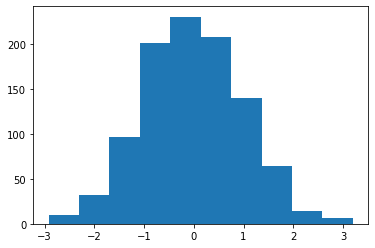

In [90]:
plt.hist(np.random.randn(1000, 4)[:,0])

<AxesSubplot:ylabel='Count'>

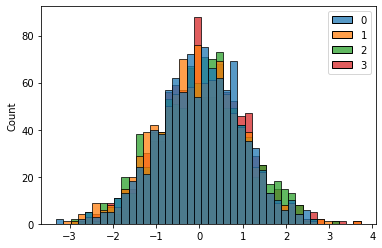

In [37]:
sns.histplot(np.random.randn(1000, 4))

In [82]:
df = pd.DataFrame(np.random.randn(10, 4), columns= 'a b c d'.split())
df

a         b         c         d
0  1.455757 -0.348669  0.129409  0.288203
1  0.168825 -0.847802  0.473080 -0.829436
2  0.049567 -0.077225 -0.590221  0.191661
3  0.085044 -1.852485  0.515831 -1.761530
4  0.851449 -1.038603  1.407407  1.097753
5 -1.800249 -0.773180 -1.238579 -1.182774
6 -0.159177  1.281855 -0.189182 -0.548567
7  0.815697  0.757842  0.433401  0.821477
8 -0.259284  0.289044  0.136891 -2.707146
9  1.365141  0.474588  1.445030 -0.832546

In [83]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# multivariate time series forecast

In [84]:
X_train =[]
for i in range(5,10):
    X_train.append(df[i-5: i])

In [85]:
type(X_train)
X_train
len(X_train)

list

[          a         b         c         d
 0  1.455757 -0.348669  0.129409  0.288203
 1  0.168825 -0.847802  0.473080 -0.829436
 2  0.049567 -0.077225 -0.590221  0.191661
 3  0.085044 -1.852485  0.515831 -1.761530
 4  0.851449 -1.038603  1.407407  1.097753,
           a         b         c         d
 1  0.168825 -0.847802  0.473080 -0.829436
 2  0.049567 -0.077225 -0.590221  0.191661
 3  0.085044 -1.852485  0.515831 -1.761530
 4  0.851449 -1.038603  1.407407  1.097753
 5 -1.800249 -0.773180 -1.238579 -1.182774,
           a         b         c         d
 2  0.049567 -0.077225 -0.590221  0.191661
 3  0.085044 -1.852485  0.515831 -1.761530
 4  0.851449 -1.038603  1.407407  1.097753
 5 -1.800249 -0.773180 -1.238579 -1.182774
 6 -0.159177  1.281855 -0.189182 -0.548567,
           a         b         c         d
 3  0.085044 -1.852485  0.515831 -1.761530
 4  0.851449 -1.038603  1.407407  1.097753
 5 -1.800249 -0.773180 -1.238579 -1.182774
 6 -0.159177  1.281855 -0.189182 -0.548567
 7  0.81

5

In [86]:
X_train[0]
X_train[1]

a         b         c         d
0  1.455757 -0.348669  0.129409  0.288203
1  0.168825 -0.847802  0.473080 -0.829436
2  0.049567 -0.077225 -0.590221  0.191661
3  0.085044 -1.852485  0.515831 -1.761530
4  0.851449 -1.038603  1.407407  1.097753

a         b         c         d
1  0.168825 -0.847802  0.473080 -0.829436
2  0.049567 -0.077225 -0.590221  0.191661
3  0.085044 -1.852485  0.515831 -1.761530
4  0.851449 -1.038603  1.407407  1.097753
5 -1.800249 -0.773180 -1.238579 -1.182774

In [87]:
np.array(X_train)
np.array(X_train).shape

array([[[ 1.45575662, -0.34866913,  0.12940912,  0.28820298],
        [ 0.16882501, -0.84780204,  0.47308005, -0.82943574],
        [ 0.04956748, -0.07722533, -0.59022108,  0.19166077],
        [ 0.08504387, -1.85248512,  0.51583146, -1.76153033],
        [ 0.85144868, -1.03860263,  1.40740662,  1.09775329]],

       [[ 0.16882501, -0.84780204,  0.47308005, -0.82943574],
        [ 0.04956748, -0.07722533, -0.59022108,  0.19166077],
        [ 0.08504387, -1.85248512,  0.51583146, -1.76153033],
        [ 0.85144868, -1.03860263,  1.40740662,  1.09775329],
        [-1.80024869, -0.77318012, -1.23857883, -1.18277373]],

       [[ 0.04956748, -0.07722533, -0.59022108,  0.19166077],
        [ 0.08504387, -1.85248512,  0.51583146, -1.76153033],
        [ 0.85144868, -1.03860263,  1.40740662,  1.09775329],
        [-1.80024869, -0.77318012, -1.23857883, -1.18277373],
        [-0.15917747,  1.28185458, -0.1891821 , -0.54856683]],

       [[ 0.08504387, -1.85248512,  0.51583146, -1.76153033],
  

(5, 5, 4)

In [88]:
10-5

5

- https://github.com/SkalskiP/ILearnDeepLearning.py 

- https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795 

<img src='https://miro.medium.com/max/1400/1*fiYPinouczFoVeB6KYqs9Q.gif'>


# Understanding 1D and 3D Convolution Neural Network | Keras
<img src='https://miro.medium.com/max/770/1*rtTzjxWmhnNGKkebU_grYQ.jpeg'>
- https://medium.com/towards-data-science/understanding-1d-and-3d-convolution-neural-network-keras-9d8f76e29610